In [23]:
import requests as req
from bs4 import BeautifulSoup as bs

In [24]:
# iframe 태그 찾기
url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false"

header = {
    'usuer-agent' : 'Mozilla/5.0'
}

res = req.get(url, headers = header)

html = bs(res.text, 'html.parser')

## 10개의 리뷰를 수집한 후 출력하시오.

In [42]:
# 관람객 내용을 가진 요소들을 수집하여 삭제
for span in html.select('span.ico_viewer'):
    span.extract()

reviews = html.select("div.score_reple > p > span")
reviews

[<span id="_filtered_ment_0">
 														
 															
 															
 																'그래도 우리 잘 해냈지?'라고 말하는 듯한 마지막 눈빛교환이 잊혀지질 않는다 
 															
 														
 														
 													</span>,
 <span id="_filtered_ment_1">
 														
 															
 															
 																와..그냥 감탄밖엔 안 나온다. 영상미며 음악이며..조폭, 건달, 검사, 신파 좋아하고 실험을 꺼리는 한국의 기성 영화인들 반성해라. 이제 겨우 두 편 만든 신인감독이 이 정도다 
 															
 														
 														
 													</span>,
 <span id="_filtered_ment_2">
 														
 															
 															
 																처음 들을때는 몰랐다 이 음악이 슬퍼질거란걸 
 															
 														
 														
 													</span>,
 <span id="_filtered_ment_3">
 														
 															
 															
 																꿈과 사랑, 우리는 항상 성공인지 실패인지 평가만 해왔다. 하지만 라라랜드는 말해준다. "봐! 꿈과 사랑, 그 흔들리는 파도가 얼마나 아름다운지" 
 															
 														
 														
 													</span>,
 <span id="_filtered_ment_4">
 														
 															
 					

In [43]:
len(reviews)

10

In [44]:
for i in range(len(reviews)) :
    print(reviews[i].text.strip())

'그래도 우리 잘 해냈지?'라고 말하는 듯한 마지막 눈빛교환이 잊혀지질 않는다
와..그냥 감탄밖엔 안 나온다. 영상미며 음악이며..조폭, 건달, 검사, 신파 좋아하고 실험을 꺼리는 한국의 기성 영화인들 반성해라. 이제 겨우 두 편 만든 신인감독이 이 정도다
처음 들을때는 몰랐다 이 음악이 슬퍼질거란걸
꿈과 사랑, 우리는 항상 성공인지 실패인지 평가만 해왔다. 하지만 라라랜드는 말해준다. "봐! 꿈과 사랑, 그 흔들리는 파도가 얼마나 아름다운지"
마지막 회상신에서 처음과 달리 키스신으로 스토리시작될때 진짜 소리지를뻔...
내일 죽으면 오늘 보러 갈만한 영화
연인들을 위한 영화가 아니다. 여성관객들을 위한 영화도 아니다. 이 영화는 꿈꾸는 모든 이들을 위한 영화. 인생을 논하는 영화.
마지막 10분 동안 휘몰아치는 감정의 소용돌이에 결국 눈물이 흐르게 만드는 마법같은 영화. 노트북 때에도 그렇고 라이언 고슬링은 이런 역할에 도가 튼 것 같다.
운행종료한 놀이공원에 노래가 계속 나오는 것같다.
재즈가 이토록 설레고 이렇게 슬프다니.라라랜드는 슬픔과 환희의 설레임이다.


## 페이지 이동

## 1~10 page의 리뷰 데이터 수집

In [55]:
for page_no in range(1,11) :
    # url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page="+str(page_no)
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}".format(page_no)
    
    print('-'*30, '페이지 번호:{}'.format(page_no), '-'*30)

    #1. 리뷰 웹 페이지 요청
    #2. 리뷰 데이터를 가진 요소들 접근 -> 내용 출력
    
    res = req.get(url, headers = header)
    html = bs(res.text, 'html.parser')
    
    for span in html.select('span.ico_viewer'):
        span.extract()
    
    reviews = html.select("div.score_reple > p > span")
    for i in range(len(reviews)) :
        print(reviews[i].text.strip())


------------------------------ 페이지 번호:1 ------------------------------
'그래도 우리 잘 해냈지?'라고 말하는 듯한 마지막 눈빛교환이 잊혀지질 않는다
와..그냥 감탄밖엔 안 나온다. 영상미며 음악이며..조폭, 건달, 검사, 신파 좋아하고 실험을 꺼리는 한국의 기성 영화인들 반성해라. 이제 겨우 두 편 만든 신인감독이 이 정도다
처음 들을때는 몰랐다 이 음악이 슬퍼질거란걸
꿈과 사랑, 우리는 항상 성공인지 실패인지 평가만 해왔다. 하지만 라라랜드는 말해준다. "봐! 꿈과 사랑, 그 흔들리는 파도가 얼마나 아름다운지"
마지막 회상신에서 처음과 달리 키스신으로 스토리시작될때 진짜 소리지를뻔...
내일 죽으면 오늘 보러 갈만한 영화
연인들을 위한 영화가 아니다. 여성관객들을 위한 영화도 아니다. 이 영화는 꿈꾸는 모든 이들을 위한 영화. 인생을 논하는 영화.
마지막 10분 동안 휘몰아치는 감정의 소용돌이에 결국 눈물이 흐르게 만드는 마법같은 영화. 노트북 때에도 그렇고 라이언 고슬링은 이런 역할에 도가 튼 것 같다.
운행종료한 놀이공원에 노래가 계속 나오는 것같다.
재즈가 이토록 설레고 이렇게 슬프다니.라라랜드는 슬픔과 환희의 설레임이다.
------------------------------ 페이지 번호:2 ------------------------------
이 영화의 백미는 마지막 부분에 남녀 주인공들의 IF 장면들... 이렇게 되지 못한 결말을 맞지만 그래도 서로의 꿈을 이루고 인정하는 듯한 둘만의 미소,,,, 뭔가 가슴 찡했다...
슬프기 짝이 없는 상상.
위플래시가 음악에 대한 광기라면 이 영화는 열정이다. 같은날 개봉되는 삼류 국산영화는 범접조차 할수 없다
아이러니컬하게도, 꿈이라는 건 이루고 난 뒤보다 이루기 전까지가 실은 가장 행복했다는 걸, 이루고 난 뒤에야 깨닫는다는 인생의 진실을 가슴 아프게 그리고 아름답게 보여주는 영화
다시 돌아간다면 지금과 달랐을까?
왤케눈물이나오는지..ㅠㅠ
서로의 꿈

# 리뷰 데이터 수집 관련 함수 정의

In [25]:
# 웹 페이지를 요청/응답받는 함수
def getRequest(url) :
    header = {
    'usuer-agent' : 'Mozilla/5.0'
    }

    res = req.get(url, headers = header)
    
    return res

# 응답받은 데이터를 파이썬 객체로 변환
def transform(resData) :
    html = bs(resData.text, 'html.parser')
    return html

# 리뷰데이터를 수집하는 함수
def getReview(html):
    for span in html.select('span.ico_viewer'):
        span.extract()
    
    result = html.select("div.score_reple > p > span")
    return result

In [61]:
for page_no in range(1,11) :
    # url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page="+str(page_no)
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}".format(page_no)
    
    print('-'*30, '페이지 번호:{}'.format(page_no), '-'*30)
    
    res = getRequest(url)
    html = transform(res)
    for review in getReview(html) :
        print(review.text.strip())

------------------------------ 페이지 번호:1 ------------------------------
'그래도 우리 잘 해냈지?'라고 말하는 듯한 마지막 눈빛교환이 잊혀지질 않는다
와..그냥 감탄밖엔 안 나온다. 영상미며 음악이며..조폭, 건달, 검사, 신파 좋아하고 실험을 꺼리는 한국의 기성 영화인들 반성해라. 이제 겨우 두 편 만든 신인감독이 이 정도다
처음 들을때는 몰랐다 이 음악이 슬퍼질거란걸
꿈과 사랑, 우리는 항상 성공인지 실패인지 평가만 해왔다. 하지만 라라랜드는 말해준다. "봐! 꿈과 사랑, 그 흔들리는 파도가 얼마나 아름다운지"
마지막 회상신에서 처음과 달리 키스신으로 스토리시작될때 진짜 소리지를뻔...
내일 죽으면 오늘 보러 갈만한 영화
연인들을 위한 영화가 아니다. 여성관객들을 위한 영화도 아니다. 이 영화는 꿈꾸는 모든 이들을 위한 영화. 인생을 논하는 영화.
마지막 10분 동안 휘몰아치는 감정의 소용돌이에 결국 눈물이 흐르게 만드는 마법같은 영화. 노트북 때에도 그렇고 라이언 고슬링은 이런 역할에 도가 튼 것 같다.
운행종료한 놀이공원에 노래가 계속 나오는 것같다.
재즈가 이토록 설레고 이렇게 슬프다니.라라랜드는 슬픔과 환희의 설레임이다.
------------------------------ 페이지 번호:2 ------------------------------
이 영화의 백미는 마지막 부분에 남녀 주인공들의 IF 장면들... 이렇게 되지 못한 결말을 맞지만 그래도 서로의 꿈을 이루고 인정하는 듯한 둘만의 미소,,,, 뭔가 가슴 찡했다...
슬프기 짝이 없는 상상.
위플래시가 음악에 대한 광기라면 이 영화는 열정이다. 같은날 개봉되는 삼류 국산영화는 범접조차 할수 없다
아이러니컬하게도, 꿈이라는 건 이루고 난 뒤보다 이루기 전까지가 실은 가장 행복했다는 걸, 이루고 난 뒤에야 깨닫는다는 인생의 진실을 가슴 아프게 그리고 아름답게 보여주는 영화
다시 돌아간다면 지금과 달랐을까?
왤케눈물이나오는지..ㅠㅠ
서로의 꿈

# 모든 리뷰 건수 수집

In [12]:
totalReview = int(html.select_one('strong.total > em').text.replace(',',''))

totalPage = totalReview//10

if totalReview%10 > 0: # 리뷰가 10으로 나누어 떨어지지 않는 경우
    totalPage += 1

print('총 페이지 수 >>', totalPage)

총 페이지 수 >> 2358


## 모든 페이지의 리뷰 데이터 수집

In [17]:
# 진행률 시각화 모듈
from tqdm import tqdm

In [18]:
for i in tqdm(range(1000)) :
    print(i)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 18230.79it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:
# 텍스트 파일 저장
with open('영화리뷰데이터.txt','w') as f :
    f.write('영화리뷰저장')

In [22]:
with open('영화리뷰데이터.txt','w') as f :
    for page_no in tqdm(range(1,totalPage+1)) :
        url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}".format(page_no)

        print('-'*30, '페이지 번호:{}'.format(page_no), '-'*30)

        res = getRequest(url)
        html = transform(res)
        for review in getReview(html) :
            f.write(review.text.strip())

  0%|                                                                                 | 1/2358 [00:00<03:57,  9.91it/s]

------------------------------ 페이지 번호:1 ------------------------------
------------------------------ 페이지 번호:2 ------------------------------


  0%|                                                                                 | 2/2358 [00:00<03:59,  9.85it/s]

------------------------------ 페이지 번호:3 ------------------------------
------------------------------ 페이지 번호:4 ------------------------------


  0%|▏                                                                                | 5/2358 [00:00<03:57,  9.92it/s]

------------------------------ 페이지 번호:5 ------------------------------
------------------------------ 페이지 번호:6 ------------------------------
------------------------------ 페이지 번호:7 ------------------------------


  0%|▎                                                                                | 8/2358 [00:00<04:08,  9.47it/s]

------------------------------ 페이지 번호:8 ------------------------------
------------------------------ 페이지 번호:9 ------------------------------


  0%|▎                                                                               | 10/2358 [00:01<04:03,  9.64it/s]

------------------------------ 페이지 번호:10 ------------------------------
------------------------------ 페이지 번호:11 ------------------------------


  1%|▍                                                                               | 12/2358 [00:01<03:56,  9.93it/s]

------------------------------ 페이지 번호:12 ------------------------------
------------------------------ 페이지 번호:13 ------------------------------


  1%|▌                                                                               | 15/2358 [00:01<03:55,  9.95it/s]

------------------------------ 페이지 번호:14 ------------------------------
------------------------------ 페이지 번호:15 ------------------------------


  1%|▌                                                                               | 16/2358 [00:01<04:05,  9.54it/s]

------------------------------ 페이지 번호:16 ------------------------------
------------------------------ 페이지 번호:17 ------------------------------


  1%|▌                                                                               | 18/2358 [00:01<03:58,  9.82it/s]

------------------------------ 페이지 번호:18 ------------------------------
------------------------------ 페이지 번호:19 ------------------------------


  1%|▋                                                                               | 20/2358 [00:02<03:59,  9.77it/s]

------------------------------ 페이지 번호:20 ------------------------------
------------------------------ 페이지 번호:21 ------------------------------
------------------------------ 페이지 번호:22 ------------------------------


  1%|▊                                                                               | 23/2358 [00:02<04:02,  9.62it/s]

------------------------------ 페이지 번호:23 ------------------------------
------------------------------ 페이지 번호:24 ------------------------------


  1%|▉                                                                               | 26/2358 [00:02<03:59,  9.72it/s]

------------------------------ 페이지 번호:25 ------------------------------
------------------------------ 페이지 번호:26 ------------------------------


  1%|▉                                                                               | 28/2358 [00:02<03:57,  9.83it/s]

------------------------------ 페이지 번호:27 ------------------------------
------------------------------ 페이지 번호:28 ------------------------------
------------------------------ 페이지 번호:29 ------------------------------


  1%|█                                                                               | 30/2358 [00:03<05:09,  7.51it/s]

------------------------------ 페이지 번호:30 ------------------------------
------------------------------ 페이지 번호:31 ------------------------------


  1%|█                                                                               | 32/2358 [00:03<04:31,  8.58it/s]

------------------------------ 페이지 번호:32 ------------------------------
------------------------------ 페이지 번호:33 ------------------------------
------------------------------ 페이지 번호:34 ------------------------------


  1%|█▏                                                                              | 35/2358 [00:03<04:18,  8.99it/s]

------------------------------ 페이지 번호:35 ------------------------------
------------------------------ 페이지 번호:36 ------------------------------
------------------------------ 페이지 번호:37 ------------------------------


  2%|█▎                                                                              | 38/2358 [00:03<04:08,  9.35it/s]

------------------------------ 페이지 번호:38 ------------------------------
------------------------------ 페이지 번호:39 ------------------------------
------------------------------ 페이지 번호:40 ------------------------------


  2%|█▎                                                                              | 40/2358 [00:04<04:00,  9.66it/s]

------------------------------ 페이지 번호:41 ------------------------------
------------------------------ 페이지 번호:42 ------------------------------


  2%|█▍                                                                              | 43/2358 [00:04<03:57,  9.74it/s]

------------------------------ 페이지 번호:43 ------------------------------
------------------------------ 페이지 번호:44 ------------------------------


  2%|█▌                                                                              | 45/2358 [00:04<04:09,  9.28it/s]

------------------------------ 페이지 번호:45 ------------------------------
------------------------------ 페이지 번호:46 ------------------------------


  2%|█▋                                                                              | 48/2358 [00:05<04:02,  9.51it/s]

------------------------------ 페이지 번호:47 ------------------------------
------------------------------ 페이지 번호:48 ------------------------------


  2%|█▋                                                                              | 49/2358 [00:05<04:08,  9.30it/s]

------------------------------ 페이지 번호:49 ------------------------------
------------------------------ 페이지 번호:50 ------------------------------


  2%|█▊                                                                              | 52/2358 [00:05<04:15,  9.03it/s]

------------------------------ 페이지 번호:51 ------------------------------
------------------------------ 페이지 번호:52 ------------------------------


  2%|█▊                                                                              | 54/2358 [00:05<04:08,  9.26it/s]

------------------------------ 페이지 번호:53 ------------------------------
------------------------------ 페이지 번호:54 ------------------------------


  2%|█▉                                                                              | 56/2358 [00:05<03:59,  9.60it/s]

------------------------------ 페이지 번호:55 ------------------------------
------------------------------ 페이지 번호:56 ------------------------------


  2%|█▉                                                                              | 58/2358 [00:06<03:50,  9.97it/s]

------------------------------ 페이지 번호:57 ------------------------------
------------------------------ 페이지 번호:58 ------------------------------
------------------------------ 페이지 번호:59 ------------------------------


  3%|██                                                                              | 60/2358 [00:06<03:52,  9.87it/s]

------------------------------ 페이지 번호:60 ------------------------------
------------------------------ 페이지 번호:61 ------------------------------


  3%|██                                                                              | 61/2358 [00:06<03:55,  9.75it/s]

------------------------------ 페이지 번호:62 ------------------------------


  3%|██                                                                              | 62/2358 [00:06<05:03,  7.55it/s]

------------------------------ 페이지 번호:63 ------------------------------
------------------------------ 페이지 번호:64 ------------------------------


  3%|██▏                                                                             | 65/2358 [00:06<04:25,  8.64it/s]

------------------------------ 페이지 번호:65 ------------------------------
------------------------------ 페이지 번호:66 ------------------------------
------------------------------ 페이지 번호:67 ------------------------------


  3%|██▎                                                                             | 69/2358 [00:07<04:01,  9.48it/s]

------------------------------ 페이지 번호:68 ------------------------------
------------------------------ 페이지 번호:69 ------------------------------


  3%|██▎                                                                             | 70/2358 [00:07<04:02,  9.44it/s]

------------------------------ 페이지 번호:70 ------------------------------
------------------------------ 페이지 번호:71 ------------------------------


  3%|██▍                                                                             | 72/2358 [00:07<03:57,  9.63it/s]

------------------------------ 페이지 번호:72 ------------------------------
------------------------------ 페이지 번호:73 ------------------------------


  3%|██▌                                                                             | 75/2358 [00:07<03:55,  9.70it/s]

------------------------------ 페이지 번호:74 ------------------------------
------------------------------ 페이지 번호:75 ------------------------------


  3%|██▌                                                                             | 76/2358 [00:07<03:54,  9.74it/s]

------------------------------ 페이지 번호:76 ------------------------------
------------------------------ 페이지 번호:77 ------------------------------


  3%|██▋                                                                             | 79/2358 [00:08<03:54,  9.70it/s]

------------------------------ 페이지 번호:78 ------------------------------
------------------------------ 페이지 번호:79 ------------------------------


  3%|██▋                                                                             | 81/2358 [00:08<03:56,  9.63it/s]

------------------------------ 페이지 번호:80 ------------------------------
------------------------------ 페이지 번호:81 ------------------------------


  3%|██▊                                                                             | 82/2358 [00:08<03:54,  9.71it/s]

------------------------------ 페이지 번호:82 ------------------------------
------------------------------ 페이지 번호:83 ------------------------------
------------------------------ 페이지 번호:84 ------------------------------


  4%|██▉                                                                             | 85/2358 [00:08<03:52,  9.78it/s]

------------------------------ 페이지 번호:85 ------------------------------
------------------------------ 페이지 번호:86 ------------------------------


  4%|██▉                                                                             | 87/2358 [00:09<03:59,  9.48it/s]

------------------------------ 페이지 번호:87 ------------------------------
------------------------------ 페이지 번호:88 ------------------------------


  4%|███                                                                             | 89/2358 [00:09<03:58,  9.50it/s]

------------------------------ 페이지 번호:89 ------------------------------
------------------------------ 페이지 번호:90 ------------------------------
------------------------------ 페이지 번호:91 ------------------------------


  4%|███                                                                             | 92/2358 [00:09<04:00,  9.40it/s]

------------------------------ 페이지 번호:92 ------------------------------
------------------------------ 페이지 번호:93 ------------------------------


  4%|███▏                                                                            | 93/2358 [00:09<03:59,  9.44it/s]

------------------------------ 페이지 번호:94 ------------------------------
------------------------------ 페이지 번호:95 ------------------------------


  4%|███▎                                                                            | 96/2358 [00:10<04:16,  8.82it/s]

------------------------------ 페이지 번호:96 ------------------------------
------------------------------ 페이지 번호:97 ------------------------------


  4%|███▎                                                                            | 98/2358 [00:10<04:11,  8.99it/s]

------------------------------ 페이지 번호:98 ------------------------------
------------------------------ 페이지 번호:99 ------------------------------
------------------------------ 페이지 번호:100 ------------------------------


  4%|███▎                                                                           | 100/2358 [00:10<04:01,  9.36it/s]

------------------------------ 페이지 번호:101 ------------------------------


  4%|███▍                                                                           | 103/2358 [00:10<03:55,  9.58it/s]

------------------------------ 페이지 번호:102 ------------------------------
------------------------------ 페이지 번호:103 ------------------------------


  4%|███▍                                                                           | 104/2358 [00:10<03:57,  9.50it/s]

------------------------------ 페이지 번호:104 ------------------------------
------------------------------ 페이지 번호:105 ------------------------------
------------------------------ 페이지 번호:106 ------------------------------


  5%|███▌                                                                           | 107/2358 [00:11<03:55,  9.54it/s]

------------------------------ 페이지 번호:107 ------------------------------
------------------------------ 페이지 번호:108 ------------------------------


  5%|███▋                                                                           | 109/2358 [00:11<03:58,  9.44it/s]

------------------------------ 페이지 번호:109 ------------------------------
------------------------------ 페이지 번호:110 ------------------------------


  5%|███▋                                                                           | 111/2358 [00:11<03:58,  9.41it/s]

------------------------------ 페이지 번호:111 ------------------------------
------------------------------ 페이지 번호:112 ------------------------------


  5%|███▊                                                                           | 113/2358 [00:11<04:06,  9.10it/s]

------------------------------ 페이지 번호:113 ------------------------------
------------------------------ 페이지 번호:114 ------------------------------


  5%|███▊                                                                           | 115/2358 [00:12<04:08,  9.02it/s]

------------------------------ 페이지 번호:115 ------------------------------
------------------------------ 페이지 번호:116 ------------------------------


  5%|███▉                                                                           | 117/2358 [00:12<03:59,  9.36it/s]

------------------------------ 페이지 번호:117 ------------------------------
------------------------------ 페이지 번호:118 ------------------------------


  5%|███▉                                                                           | 119/2358 [00:12<03:55,  9.52it/s]

------------------------------ 페이지 번호:119 ------------------------------
------------------------------ 페이지 번호:120 ------------------------------


  5%|████                                                                           | 121/2358 [00:12<04:03,  9.18it/s]

------------------------------ 페이지 번호:121 ------------------------------
------------------------------ 페이지 번호:122 ------------------------------


  5%|████                                                                           | 123/2358 [00:12<04:14,  8.77it/s]

------------------------------ 페이지 번호:123 ------------------------------
------------------------------ 페이지 번호:124 ------------------------------


  5%|████▏                                                                          | 124/2358 [00:13<04:17,  8.66it/s]

------------------------------ 페이지 번호:125 ------------------------------
------------------------------ 페이지 번호:126 ------------------------------


  5%|████▎                                                                          | 127/2358 [00:13<04:07,  9.02it/s]

------------------------------ 페이지 번호:127 ------------------------------
------------------------------ 페이지 번호:128 ------------------------------


  5%|████▎                                                                          | 129/2358 [00:13<04:38,  8.01it/s]

------------------------------ 페이지 번호:129 ------------------------------
------------------------------ 페이지 번호:130 ------------------------------


  6%|████▍                                                                          | 131/2358 [00:13<04:19,  8.59it/s]

------------------------------ 페이지 번호:131 ------------------------------
------------------------------ 페이지 번호:132 ------------------------------
------------------------------ 페이지 번호:133 ------------------------------


  6%|████▍                                                                          | 134/2358 [00:14<04:00,  9.24it/s]

------------------------------ 페이지 번호:134 ------------------------------
------------------------------ 페이지 번호:135 ------------------------------


  6%|████▌                                                                          | 137/2358 [00:14<03:53,  9.52it/s]

------------------------------ 페이지 번호:136 ------------------------------
------------------------------ 페이지 번호:137 ------------------------------


  6%|████▌                                                                          | 138/2358 [00:14<03:51,  9.59it/s]

------------------------------ 페이지 번호:138 ------------------------------
------------------------------ 페이지 번호:139 ------------------------------


  6%|████▋                                                                          | 140/2358 [00:14<03:44,  9.90it/s]

------------------------------ 페이지 번호:140 ------------------------------
------------------------------ 페이지 번호:141 ------------------------------
------------------------------ 페이지 번호:142 ------------------------------


  6%|████▊                                                                          | 142/2358 [00:14<03:37, 10.17it/s]

------------------------------ 페이지 번호:143 ------------------------------
------------------------------ 페이지 번호:144 ------------------------------


  6%|████▉                                                                          | 146/2358 [00:15<03:35, 10.26it/s]

------------------------------ 페이지 번호:145 ------------------------------
------------------------------ 페이지 번호:146 ------------------------------


  6%|████▉                                                                          | 148/2358 [00:15<03:37, 10.18it/s]

------------------------------ 페이지 번호:147 ------------------------------
------------------------------ 페이지 번호:148 ------------------------------
------------------------------ 페이지 번호:149 ------------------------------
------------------------------ 페이지 번호:150 ------------------------------


  6%|█████                                                                          | 150/2358 [00:15<03:40, 10.00it/s]

------------------------------ 페이지 번호:151 ------------------------------
------------------------------ 페이지 번호:152 ------------------------------


  6%|█████                                                                          | 152/2358 [00:15<03:40, 10.01it/s]

------------------------------ 페이지 번호:153 ------------------------------
------------------------------ 페이지 번호:154 ------------------------------


  7%|█████▏                                                                         | 154/2358 [00:16<03:53,  9.44it/s]

------------------------------ 페이지 번호:155 ------------------------------
------------------------------ 페이지 번호:156 ------------------------------


  7%|█████▎                                                                         | 158/2358 [00:16<03:48,  9.62it/s]

------------------------------ 페이지 번호:157 ------------------------------
------------------------------ 페이지 번호:158 ------------------------------


  7%|█████▎                                                                         | 160/2358 [00:16<03:44,  9.81it/s]

------------------------------ 페이지 번호:159 ------------------------------
------------------------------ 페이지 번호:160 ------------------------------
------------------------------ 페이지 번호:161 ------------------------------


  7%|█████▍                                                                         | 163/2358 [00:17<04:34,  8.01it/s]

------------------------------ 페이지 번호:162 ------------------------------
------------------------------ 페이지 번호:163 ------------------------------


  7%|█████▍                                                                         | 164/2358 [00:17<04:19,  8.46it/s]

------------------------------ 페이지 번호:164 ------------------------------
------------------------------ 페이지 번호:165 ------------------------------


  7%|█████▌                                                                         | 167/2358 [00:17<03:57,  9.24it/s]

------------------------------ 페이지 번호:166 ------------------------------
------------------------------ 페이지 번호:167 ------------------------------


  7%|█████▋                                                                         | 168/2358 [00:17<03:54,  9.35it/s]

------------------------------ 페이지 번호:168 ------------------------------
------------------------------ 페이지 번호:169 ------------------------------
------------------------------ 페이지 번호:170 ------------------------------


  7%|█████▊                                                                         | 172/2358 [00:18<03:44,  9.73it/s]

------------------------------ 페이지 번호:171 ------------------------------
------------------------------ 페이지 번호:172 ------------------------------


  7%|█████▊                                                                         | 173/2358 [00:18<03:45,  9.69it/s]

------------------------------ 페이지 번호:173 ------------------------------
------------------------------ 페이지 번호:174 ------------------------------
------------------------------ 페이지 번호:175 ------------------------------


  8%|█████▉                                                                         | 177/2358 [00:18<03:44,  9.70it/s]

------------------------------ 페이지 번호:176 ------------------------------
------------------------------ 페이지 번호:177 ------------------------------


  8%|█████▉                                                                         | 178/2358 [00:18<03:46,  9.62it/s]

------------------------------ 페이지 번호:178 ------------------------------
------------------------------ 페이지 번호:179 ------------------------------


  8%|█████▉                                                                         | 179/2358 [00:18<03:53,  9.35it/s]

------------------------------ 페이지 번호:180 ------------------------------
------------------------------ 페이지 번호:181 ------------------------------


  8%|██████                                                                         | 182/2358 [00:19<03:52,  9.37it/s]

------------------------------ 페이지 번호:182 ------------------------------
------------------------------ 페이지 번호:183 ------------------------------


  8%|██████▏                                                                        | 185/2358 [00:19<03:48,  9.49it/s]

------------------------------ 페이지 번호:184 ------------------------------
------------------------------ 페이지 번호:185 ------------------------------


  8%|██████▎                                                                        | 187/2358 [00:19<03:45,  9.61it/s]

------------------------------ 페이지 번호:186 ------------------------------
------------------------------ 페이지 번호:187 ------------------------------


  8%|██████▎                                                                        | 188/2358 [00:19<03:47,  9.53it/s]

------------------------------ 페이지 번호:188 ------------------------------
------------------------------ 페이지 번호:189 ------------------------------


  8%|██████▍                                                                        | 191/2358 [00:20<03:45,  9.62it/s]

------------------------------ 페이지 번호:190 ------------------------------
------------------------------ 페이지 번호:191 ------------------------------


  8%|██████▍                                                                        | 192/2358 [00:20<03:47,  9.52it/s]

------------------------------ 페이지 번호:192 ------------------------------
------------------------------ 페이지 번호:193 ------------------------------
------------------------------ 페이지 번호:194 ------------------------------


  8%|██████▌                                                                        | 195/2358 [00:20<04:10,  8.63it/s]

------------------------------ 페이지 번호:195 ------------------------------
------------------------------ 페이지 번호:196 ------------------------------


  8%|██████▌                                                                        | 197/2358 [00:20<04:04,  8.84it/s]

------------------------------ 페이지 번호:197 ------------------------------
------------------------------ 페이지 번호:198 ------------------------------


  8%|██████▋                                                                        | 199/2358 [00:21<03:56,  9.15it/s]

------------------------------ 페이지 번호:199 ------------------------------
------------------------------ 페이지 번호:200 ------------------------------


  9%|██████▋                                                                        | 201/2358 [00:21<03:46,  9.52it/s]

------------------------------ 페이지 번호:201 ------------------------------
------------------------------ 페이지 번호:202 ------------------------------
------------------------------ 

  9%|██████▊                                                                        | 204/2358 [00:21<03:44,  9.59it/s]

페이지 번호:203 ------------------------------
------------------------------ 페이지 번호:204 ------------------------------


  9%|██████▉                                                                        | 206/2358 [00:21<03:42,  9.66it/s]

------------------------------ 페이지 번호:205 ------------------------------
------------------------------ 페이지 번호:206 ------------------------------


  9%|██████▉                                                                        | 207/2358 [00:21<03:42,  9.67it/s]

------------------------------ 페이지 번호:207 ------------------------------
------------------------------ 페이지 번호:208 ------------------------------


  9%|███████                                                                        | 209/2358 [00:22<03:40,  9.75it/s]

------------------------------ 페이지 번호:209 ------------------------------
------------------------------ 페이지 번호:210 ------------------------------


  9%|███████                                                                        | 212/2358 [00:22<03:37,  9.88it/s]

------------------------------ 페이지 번호:211 ------------------------------
------------------------------ 페이지 번호:212 ------------------------------


  9%|███████▏                                                                       | 213/2358 [00:22<03:40,  9.72it/s]

------------------------------ 페이지 번호:213 ------------------------------
------------------------------ 페이지 번호:214 ------------------------------


  9%|███████▏                                                                       | 215/2358 [00:22<03:44,  9.53it/s]

------------------------------ 페이지 번호:215 ------------------------------
------------------------------ 페이지 번호:216 ------------------------------


  9%|███████▎                                                                       | 217/2358 [00:22<03:47,  9.40it/s]

------------------------------ 페이지 번호:217 ------------------------------
------------------------------ 페이지 번호:218 ------------------------------


  9%|███████▎                                                                       | 218/2358 [00:22<03:43,  9.56it/s]

------------------------------ 페이지 번호:219 ------------------------------
------------------------------ 페이지 번호:220 ------------------------------


  9%|███████▍                                                                       | 222/2358 [00:23<03:34,  9.94it/s]

------------------------------ 페이지 번호:221 ------------------------------
------------------------------ 페이지 번호:222 ------------------------------


  9%|███████▍                                                                       | 223/2358 [00:23<03:35,  9.90it/s]

------------------------------ 페이지 번호:223 ------------------------------
------------------------------ 페이지 번호:224 ------------------------------


 10%|███████▌                                                                       | 225/2358 [00:23<03:45,  9.44it/s]

------------------------------ 페이지 번호:225 ------------------------------
------------------------------ 페이지 번호:226 ------------------------------


 10%|███████▌                                                                       | 226/2358 [00:23<03:43,  9.55it/s]

------------------------------ 페이지 번호:227 ------------------------------


 10%|███████▋                                                                       | 229/2358 [00:24<04:26,  7.99it/s]

------------------------------ 페이지 번호:228 ------------------------------
------------------------------ 페이지 번호:229 ------------------------------


 10%|███████▋                                                                       | 230/2358 [00:24<04:12,  8.41it/s]

------------------------------ 페이지 번호:230 ------------------------------
------------------------------ 페이지 번호:231 ------------------------------


 10%|███████▊                                                                       | 232/2358 [00:24<04:01,  8.82it/s]

------------------------------ 페이지 번호:232 ------------------------------
------------------------------ 페이지 번호:233 ------------------------------


 10%|███████▊                                                                       | 234/2358 [00:24<03:56,  8.97it/s]

------------------------------ 페이지 번호:234 ------------------------------
------------------------------ 페이지 번호:235 ------------------------------


 10%|███████▉                                                                       | 236/2358 [00:24<03:54,  9.07it/s]

------------------------------ 페이지 번호:236 ------------------------------
------------------------------ 페이지 번호:237 ------------------------------


 10%|███████▉                                                                       | 238/2358 [00:25<03:52,  9.13it/s]

------------------------------ 페이지 번호:238 ------------------------------
------------------------------ 페이지 번호:239 ------------------------------


 10%|████████                                                                       | 240/2358 [00:25<03:45,  9.37it/s]

------------------------------ 페이지 번호:240 ------------------------------
------------------------------ 페이지 번호:241 ------------------------------


 10%|████████▏                                                                      | 243/2358 [00:25<03:43,  9.47it/s]

------------------------------ 페이지 번호:242 ------------------------------
------------------------------ 페이지 번호:243 ------------------------------


 10%|████████▏                                                                      | 245/2358 [00:25<03:41,  9.55it/s]

------------------------------ 페이지 번호:244 ------------------------------
------------------------------ 페이지 번호:245 ------------------------------


 10%|████████▏                                                                      | 246/2358 [00:25<03:40,  9.56it/s]

------------------------------ 페이지 번호:246 ------------------------------
------------------------------ 페이지 번호:247 ------------------------------


 11%|████████▎                                                                      | 248/2358 [00:26<03:51,  9.11it/s]

------------------------------ 페이지 번호:248 ------------------------------
------------------------------ 페이지 번호:249 ------------------------------


 11%|████████▍                                                                      | 250/2358 [00:26<03:41,  9.50it/s]

------------------------------ 페이지 번호:250 ------------------------------
------------------------------ 페이지 번호:251 ------------------------------


 11%|████████▍                                                                      | 252/2358 [00:26<03:37,  9.66it/s]

------------------------------ 페이지 번호:252 ------------------------------
------------------------------ 페이지 번호:253 ------------------------------
------------------------------ 페이지 번호:254 ------------------------------


 11%|████████▌                                                                      | 255/2358 [00:26<03:37,  9.67it/s]

------------------------------ 페이지 번호:255 ------------------------------
------------------------------ 페이지 번호:256 ------------------------------


 11%|████████▌                                                                      | 256/2358 [00:27<03:35,  9.75it/s]

------------------------------ 페이지 번호:257 ------------------------------
------------------------------ 페이지 번호:258 ------------------------------


 11%|████████▋                                                                      | 259/2358 [00:27<04:42,  7.44it/s]

------------------------------ 페이지 번호:259 ------------------------------


 11%|████████▋                                                                      | 260/2358 [00:27<04:27,  7.86it/s]

------------------------------ 페이지 번호:260 ------------------------------
------------------------------ 페이지 번호:261 ------------------------------


 11%|████████▊                                                                      | 263/2358 [00:27<04:00,  8.72it/s]

------------------------------ 페이지 번호:262 ------------------------------
------------------------------ 페이지 번호:263 ------------------------------


 11%|████████▊                                                                      | 264/2358 [00:27<03:53,  8.98it/s]

------------------------------ 페이지 번호:264 ------------------------------
------------------------------ 페이지 번호:265 ------------------------------


 11%|████████▉                                                                      | 266/2358 [00:28<04:03,  8.58it/s]

------------------------------ 페이지 번호:266 ------------------------------
------------------------------ 페이지 번호:267 ------------------------------


 11%|████████▉                                                                      | 267/2358 [00:28<04:03,  8.58it/s]

------------------------------ 페이지 번호:268 ------------------------------
------------------------------ 페이지 번호:269 ------------------------------


 11%|█████████                                                                      | 270/2358 [00:28<04:03,  8.56it/s]

------------------------------ 페이지 번호:270 ------------------------------
------------------------------ 페이지 번호:271 ------------------------------


 12%|█████████                                                                      | 272/2358 [00:28<03:53,  8.93it/s]

------------------------------ 페이지 번호:272 ------------------------------
------------------------------ 페이지 번호:273 ------------------------------
------------------------------ 페이지 번호:274 

 12%|█████████▏                                                                     | 274/2358 [00:29<03:48,  9.12it/s]

------------------------------
------------------------------ 페이지 번호:275 ------------------------------


 12%|█████████▏                                                                     | 276/2358 [00:29<03:45,  9.22it/s]

------------------------------ 페이지 번호:276 ------------------------------
------------------------------ 페이지 번호:277 ------------------------------


 12%|█████████▎                                                                     | 278/2358 [00:29<03:49,  9.07it/s]

------------------------------ 페이지 번호:278 ------------------------------
------------------------------ 페이지 번호:279 ------------------------------


 12%|█████████▍                                                                     | 280/2358 [00:29<03:45,  9.23it/s]

------------------------------ 페이지 번호:280 ------------------------------
------------------------------ 페이지 번호:281 ------------------------------


 12%|█████████▍                                                                     | 283/2358 [00:30<03:38,  9.50it/s]

------------------------------ 페이지 번호:282 ------------------------------
------------------------------ 페이지 번호:283 ------------------------------


 12%|█████████▌                                                                     | 284/2358 [00:30<03:40,  9.41it/s]

------------------------------ 페이지 번호:284 ------------------------------
------------------------------ 페이지 번호:285 ------------------------------


 12%|█████████▌                                                                     | 286/2358 [00:30<03:42,  9.32it/s]

------------------------------ 페이지 번호:286 ------------------------------
------------------------------ 페이지 번호:287 ------------------------------


 12%|█████████▋                                                                     | 288/2358 [00:30<03:42,  9.30it/s]

------------------------------ 페이지 번호:288 ------------------------------
------------------------------ 페이지 번호:289 ------------------------------


 12%|█████████▋                                                                     | 290/2358 [00:30<03:42,  9.29it/s]

------------------------------ 페이지 번호:290 ------------------------------
------------------------------ 페이지 번호:291 ------------------------------


 12%|█████████▋                                                                     | 291/2358 [00:30<03:42,  9.30it/s]

------------------------------ 페이지 번호:292 ------------------------------


 12%|█████████▊                                                                     | 293/2358 [00:31<04:18,  7.97it/s]

------------------------------ 페이지 번호:293 ------------------------------
------------------------------ 페이지 번호:294 ------------------------------


 13%|█████████▉                                                                     | 295/2358 [00:31<03:59,  8.60it/s]

------------------------------ 페이지 번호:295 ------------------------------
------------------------------ 페이지 번호:296 ------------------------------


 13%|█████████▉                                                                     | 298/2358 [00:31<03:54,  8.79it/s]

------------------------------ 페이지 번호:297 ------------------------------
------------------------------ 페이지 번호:298 ------------------------------


 13%|██████████                                                                     | 299/2358 [00:31<03:57,  8.66it/s]

------------------------------ 페이지 번호:299 ------------------------------
------------------------------ 페이지 번호:300 ------------------------------


 13%|██████████                                                                     | 301/2358 [00:32<03:45,  9.14it/s]

------------------------------ 페이지 번호:301 ------------------------------
------------------------------ 페이지 번호:302 ------------------------------


 13%|██████████▏                                                                    | 303/2358 [00:32<03:39,  9.38it/s]

------------------------------ 페이지 번호:303 ------------------------------
------------------------------ 페이지 번호:304 ------------------------------
------------------------------ 페이지 번호:305 ------------------------------

 13%|██████████▎                                                                    | 306/2358 [00:32<03:33,  9.61it/s]


------------------------------ 페이지 번호:306 ------------------------------


 13%|██████████▎                                                                    | 307/2358 [00:32<03:35,  9.50it/s]

------------------------------ 페이지 번호:307 ------------------------------
------------------------------ 페이지 번호:308 ------------------------------


 13%|██████████▎                                                                    | 309/2358 [00:32<03:40,  9.31it/s]

------------------------------ 페이지 번호:309 ------------------------------
------------------------------ 페이지 번호:310 ------------------------------


 13%|██████████▍                                                                    | 311/2358 [00:33<03:41,  9.22it/s]

------------------------------ 페이지 번호:311 ------------------------------
------------------------------ 페이지 번호:312 ------------------------------


 13%|██████████▍                                                                    | 313/2358 [00:33<03:38,  9.36it/s]

------------------------------ 페이지 번호:313 ------------------------------
------------------------------ 페이지 번호:314 ------------------------------


 13%|██████████▌                                                                    | 315/2358 [00:33<03:38,  9.33it/s]

------------------------------ 페이지 번호:315 ------------------------------
------------------------------ 페이지 번호:316 ------------------------------


 13%|██████████▌                                                                    | 317/2358 [00:33<03:42,  9.19it/s]

------------------------------ 페이지 번호:317 ------------------------------
------------------------------ 페이지 번호:318 ------------------------------


 14%|██████████▋                                                                    | 319/2358 [00:34<03:36,  9.41it/s]

------------------------------ 페이지 번호:319 ------------------------------
------------------------------ 페이지 번호:320 ------------------------------


 14%|██████████▊                                                                    | 321/2358 [00:34<03:45,  9.05it/s]

------------------------------ 페이지 번호:321 ------------------------------
------------------------------ 페이지 번호:322 ------------------------------


 14%|██████████▊                                                                    | 323/2358 [00:34<03:38,  9.33it/s]

------------------------------ 페이지 번호:323 ------------------------------
------------------------------ 페이지 번호:324 ------------------------------


 14%|██████████▉                                                                    | 325/2358 [00:34<04:36,  7.36it/s]

------------------------------ 페이지 번호:325 ------------------------------


 14%|██████████▉                                                                    | 327/2358 [00:34<04:04,  8.31it/s]

------------------------------ 페이지 번호:326 ------------------------------
------------------------------ 페이지 번호:327 ------------------------------


 14%|██████████▉                                                                    | 328/2358 [00:35<03:58,  8.51it/s]

------------------------------ 페이지 번호:328 ------------------------------
------------------------------ 페이지 번호:329 ------------------------------


 14%|███████████                                                                    | 330/2358 [00:35<03:55,  8.61it/s]

------------------------------ 페이지 번호:330 ------------------------------
------------------------------ 페이지 번호:331 ------------------------------


 14%|███████████                                                                    | 332/2358 [00:35<03:46,  8.95it/s]

------------------------------ 페이지 번호:332 ------------------------------
------------------------------ 페이지 번호:333 ------------------------------


 14%|███████████▏                                                                   | 334/2358 [00:35<03:38,  9.25it/s]

------------------------------ 페이지 번호:334 ------------------------------
------------------------------ 페이지 번호:335 ------------------------------


 14%|███████████▎                                                                   | 336/2358 [00:35<03:43,  9.05it/s]

------------------------------ 페이지 번호:336 ------------------------------
------------------------------ 페이지 번호:337 ------------------------------


 14%|███████████▎                                                                   | 338/2358 [00:36<03:38,  9.24it/s]

------------------------------ 페이지 번호:338 ------------------------------
------------------------------ 페이지 번호:339 ------------------------------


 14%|███████████▍                                                                   | 340/2358 [00:36<03:36,  9.32it/s]

------------------------------ 페이지 번호:340 ------------------------------
------------------------------ 페이지 번호:341 ------------------------------


 15%|███████████▍                                                                   | 342/2358 [00:36<03:45,  8.93it/s]

------------------------------ 페이지 번호:342 ------------------------------
------------------------------ 페이지 번호:343 ------------------------------


 15%|███████████▌                                                                   | 344/2358 [00:36<03:41,  9.11it/s]

------------------------------ 페이지 번호:344 ------------------------------
------------------------------ 페이지 번호:345 ------------------------------


 15%|███████████▌                                                                   | 346/2358 [00:37<03:39,  9.18it/s]

------------------------------ 페이지 번호:346 ------------------------------
------------------------------ 페이지 번호:347 ------------------------------


 15%|███████████▋                                                                   | 348/2358 [00:37<03:37,  9.24it/s]

------------------------------ 페이지 번호:348 ------------------------------
------------------------------ 페이지 번호:349 ------------------------------


 15%|███████████▋                                                                   | 350/2358 [00:37<03:49,  8.75it/s]

------------------------------ 페이지 번호:350 ------------------------------
------------------------------ 페이지 번호:351 ------------------------------


 15%|███████████▊                                                                   | 352/2358 [00:37<03:42,  9.00it/s]

------------------------------ 페이지 번호:352 ------------------------------
------------------------------ 페이지 번호:353 ------------------------------


 15%|███████████▊                                                                   | 354/2358 [00:37<03:42,  9.01it/s]

------------------------------ 페이지 번호:354 ------------------------------
------------------------------ 페이지 번호:355 ------------------------------


 15%|███████████▉                                                                   | 356/2358 [00:38<03:39,  9.11it/s]

------------------------------ 페이지 번호:356 ------------------------------
------------------------------ 페이지 번호:357 ------------------------------


 15%|███████████▉                                                                   | 358/2358 [00:38<04:10,  8.00it/s]

------------------------------ 페이지 번호:358 ------------------------------
------------------------------ 페이지 번호:359 ------------------------------


 15%|████████████                                                                   | 360/2358 [00:38<03:57,  8.43it/s]

------------------------------ 페이지 번호:360 ------------------------------
------------------------------ 페이지 번호:361 ------------------------------


 15%|████████████▏                                                                  | 362/2358 [00:38<03:47,  8.79it/s]

------------------------------ 페이지 번호:362 ------------------------------
------------------------------ 페이지 번호:363 ------------------------------


 15%|████████████▏                                                                  | 364/2358 [00:39<03:45,  8.86it/s]

------------------------------ 페이지 번호:364 ------------------------------
------------------------------ 페이지 번호:365 ------------------------------


 16%|████████████▎                                                                  | 366/2358 [00:39<03:42,  8.95it/s]

------------------------------ 페이지 번호:366 ------------------------------
------------------------------ 페이지 번호:367 ------------------------------


 16%|████████████▎                                                                  | 368/2358 [00:39<03:37,  9.14it/s]

------------------------------ 페이지 번호:368 ------------------------------
------------------------------ 페이지 번호:369 ------------------------------


 16%|████████████▍                                                                  | 370/2358 [00:39<03:36,  9.18it/s]

------------------------------ 페이지 번호:370 ------------------------------
------------------------------ 페이지 번호:371 ------------------------------


 16%|████████████▍                                                                  | 372/2358 [00:40<03:48,  8.70it/s]

------------------------------ 페이지 번호:372 ------------------------------
------------------------------ 페이지 번호:373 ------------------------------


 16%|████████████▌                                                                  | 374/2358 [00:40<03:39,  9.05it/s]

------------------------------ 페이지 번호:374 ------------------------------
------------------------------ 페이지 번호:375 ------------------------------


 16%|████████████▌                                                                  | 376/2358 [00:40<03:43,  8.88it/s]

------------------------------ 페이지 번호:376 ------------------------------
------------------------------ 페이지 번호:377 ------------------------------


 16%|████████████▋                                                                  | 378/2358 [00:40<03:43,  8.85it/s]

------------------------------ 페이지 번호:378 ------------------------------
------------------------------ 페이지 번호:379 ------------------------------


 16%|████████████▋                                                                  | 380/2358 [00:40<03:42,  8.88it/s]

------------------------------ 페이지 번호:380 ------------------------------
------------------------------ 페이지 번호:381 ------------------------------


 16%|████████████▊                                                                  | 382/2358 [00:41<03:45,  8.76it/s]

------------------------------ 페이지 번호:382 ------------------------------
------------------------------ 페이지 번호:383 ------------------------------


 16%|████████████▊                                                                  | 384/2358 [00:41<03:45,  8.74it/s]

------------------------------ 페이지 번호:384 ------------------------------
------------------------------ 페이지 번호:385 ------------------------------


 16%|████████████▉                                                                  | 386/2358 [00:41<03:39,  8.99it/s]

------------------------------ 페이지 번호:386 ------------------------------
------------------------------ 페이지 번호:387 ------------------------------


 16%|████████████▉                                                                  | 388/2358 [00:41<03:41,  8.90it/s]

------------------------------ 페이지 번호:388 ------------------------------
------------------------------ 페이지 번호:389 ------------------------------


 17%|█████████████                                                                  | 390/2358 [00:42<04:29,  7.29it/s]

------------------------------ 페이지 번호:390 ------------------------------


 17%|█████████████                                                                  | 391/2358 [00:42<04:10,  7.85it/s]

------------------------------ 페이지 번호:391 ------------------------------
------------------------------ 페이지 번호:392 ------------------------------


 17%|█████████████▏                                                                 | 393/2358 [00:42<04:03,  8.08it/s]

------------------------------ 페이지 번호:393 ------------------------------
------------------------------ 페이지 번호:394 ------------------------------


 17%|█████████████▏                                                                 | 395/2358 [00:42<04:06,  7.96it/s]

------------------------------ 페이지 번호:395 ------------------------------
------------------------------ 페이지 번호:396 ------------------------------


 17%|█████████████▎                                                                 | 397/2358 [00:42<03:55,  8.34it/s]

------------------------------ 페이지 번호:397 ------------------------------
------------------------------ 페이지 번호:398 ------------------------------


 17%|█████████████▎                                                                 | 399/2358 [00:43<03:42,  8.79it/s]

------------------------------ 페이지 번호:399 ------------------------------
------------------------------ 페이지 번호:400 ------------------------------


 17%|█████████████▍                                                                 | 401/2358 [00:43<03:35,  9.07it/s]

------------------------------ 페이지 번호:401 ------------------------------
------------------------------ 페이지 번호:402 ------------------------------


 17%|█████████████▌                                                                 | 403/2358 [00:43<03:36,  9.02it/s]

------------------------------ 페이지 번호:403 ------------------------------
------------------------------ 페이지 번호:404 ------------------------------


 17%|█████████████▌                                                                 | 405/2358 [00:43<03:38,  8.94it/s]

------------------------------ 페이지 번호:405 ------------------------------
------------------------------ 페이지 번호:406 ------------------------------


 17%|█████████████▋                                                                 | 407/2358 [00:44<03:38,  8.93it/s]

------------------------------ 페이지 번호:407 ------------------------------
------------------------------ 페이지 번호:408 ------------------------------


 17%|█████████████▋                                                                 | 409/2358 [00:44<03:51,  8.43it/s]

------------------------------ 페이지 번호:409 ------------------------------
------------------------------ 페이지 번호:410 ------------------------------


 17%|█████████████▊                                                                 | 411/2358 [00:44<03:44,  8.66it/s]

------------------------------ 페이지 번호:411 ------------------------------
------------------------------ 페이지 번호:412 ------------------------------


 18%|█████████████▊                                                                 | 413/2358 [00:44<03:41,  8.79it/s]

------------------------------ 페이지 번호:413 ------------------------------
------------------------------ 페이지 번호:414 ------------------------------


 18%|█████████████▉                                                                 | 415/2358 [00:44<03:40,  8.82it/s]

------------------------------ 페이지 번호:415 ------------------------------
------------------------------ 페이지 번호:416 ------------------------------


 18%|█████████████▉                                                                 | 417/2358 [00:45<03:37,  8.93it/s]

------------------------------ 페이지 번호:417 ------------------------------
------------------------------ 페이지 번호:418 ------------------------------


 18%|██████████████                                                                 | 419/2358 [00:45<03:32,  9.13it/s]

------------------------------ 페이지 번호:419 ------------------------------
------------------------------ 페이지 번호:420 ------------------------------


 18%|██████████████                                                                 | 421/2358 [00:45<03:38,  8.88it/s]

------------------------------ 페이지 번호:421 ------------------------------
------------------------------ 페이지 번호:422 ------------------------------


 18%|██████████████▏                                                                | 423/2358 [00:45<04:21,  7.40it/s]

------------------------------ 페이지 번호:423 ------------------------------
------------------------------ 페이지 번호:424 ------------------------------


 18%|██████████████▏                                                                | 425/2358 [00:46<03:58,  8.10it/s]

------------------------------ 페이지 번호:425 ------------------------------
------------------------------ 페이지 번호:426 ------------------------------


 18%|██████████████▎                                                                | 427/2358 [00:46<03:46,  8.54it/s]

------------------------------ 페이지 번호:427 ------------------------------
------------------------------ 페이지 번호:428 ------------------------------


 18%|██████████████▎                                                                | 429/2358 [00:46<03:37,  8.88it/s]

------------------------------ 페이지 번호:429 ------------------------------
------------------------------ 페이지 번호:430 ------------------------------


 18%|██████████████▍                                                                | 431/2358 [00:46<03:42,  8.68it/s]

------------------------------ 페이지 번호:431 ------------------------------
------------------------------ 페이지 번호:432 ------------------------------


 18%|██████████████▌                                                                | 433/2358 [00:47<03:50,  8.37it/s]

------------------------------ 페이지 번호:433 ------------------------------
------------------------------ 페이지 번호:434 ------------------------------


 18%|██████████████▌                                                                | 435/2358 [00:47<03:36,  8.87it/s]

------------------------------ 페이지 번호:435 ------------------------------
------------------------------ 페이지 번호:436 ------------------------------


 19%|██████████████▋                                                                | 437/2358 [00:47<03:36,  8.87it/s]

------------------------------ 페이지 번호:437 ------------------------------
------------------------------ 페이지 번호:438 ------------------------------


 19%|██████████████▋                                                                | 439/2358 [00:47<03:35,  8.89it/s]

------------------------------ 페이지 번호:439 ------------------------------
------------------------------ 페이지 번호:440 ------------------------------


 19%|██████████████▊                                                                | 441/2358 [00:48<03:38,  8.78it/s]

------------------------------ 페이지 번호:441 ------------------------------
------------------------------ 페이지 번호:442 ------------------------------


 19%|██████████████▊                                                                | 443/2358 [00:48<03:33,  8.99it/s]

------------------------------ 페이지 번호:443 ------------------------------
------------------------------ 페이지 번호:444 ------------------------------


 19%|██████████████▉                                                                | 445/2358 [00:48<03:34,  8.91it/s]

------------------------------ 페이지 번호:445 ------------------------------
------------------------------ 페이지 번호:446 ------------------------------


 19%|██████████████▉                                                                | 447/2358 [00:48<03:32,  9.01it/s]

------------------------------ 페이지 번호:447 ------------------------------
------------------------------ 페이지 번호:448 ------------------------------


 19%|███████████████                                                                | 449/2358 [00:48<03:34,  8.91it/s]

------------------------------ 페이지 번호:449 ------------------------------
------------------------------ 페이지 번호:450 ------------------------------


 19%|███████████████                                                                | 451/2358 [00:49<03:35,  8.85it/s]

------------------------------ 페이지 번호:451 ------------------------------
------------------------------ 페이지 번호:452 ------------------------------


 19%|███████████████▏                                                               | 453/2358 [00:49<03:29,  9.09it/s]

------------------------------ 페이지 번호:453 ------------------------------
------------------------------ 페이지 번호:454 ------------------------------


 19%|███████████████▏                                                               | 455/2358 [00:49<04:08,  7.65it/s]

------------------------------ 페이지 번호:455 ------------------------------
------------------------------ 페이지 번호:456 ------------------------------


 19%|███████████████▎                                                               | 458/2358 [00:50<03:46,  8.38it/s]

------------------------------ 페이지 번호:457 ------------------------------
------------------------------ 페이지 번호:458 ------------------------------


 19%|███████████████▍                                                               | 459/2358 [00:50<03:42,  8.54it/s]

------------------------------ 페이지 번호:459 ------------------------------
------------------------------ 페이지 번호:460 ------------------------------


 20%|███████████████▍                                                               | 461/2358 [00:50<03:35,  8.80it/s]

------------------------------ 페이지 번호:461 ------------------------------
------------------------------ 페이지 번호:462 ------------------------------


 20%|███████████████▌                                                               | 463/2358 [00:50<03:39,  8.63it/s]

------------------------------ 페이지 번호:463 ------------------------------
------------------------------ 페이지 번호:464 ------------------------------


 20%|███████████████▌                                                               | 465/2358 [00:50<03:32,  8.93it/s]

------------------------------ 페이지 번호:465 ------------------------------
------------------------------ 페이지 번호:466 ------------------------------


 20%|███████████████▋                                                               | 467/2358 [00:51<03:28,  9.07it/s]

------------------------------ 페이지 번호:467 ------------------------------
------------------------------ 페이지 번호:468 ------------------------------


 20%|███████████████▋                                                               | 469/2358 [00:51<03:25,  9.19it/s]

------------------------------ 페이지 번호:469 ------------------------------
------------------------------ 페이지 번호:470 ------------------------------


 20%|███████████████▊                                                               | 471/2358 [00:51<03:31,  8.92it/s]

------------------------------ 페이지 번호:471 ------------------------------
------------------------------ 페이지 번호:472 ------------------------------


 20%|███████████████▊                                                               | 473/2358 [00:51<03:31,  8.92it/s]

------------------------------ 페이지 번호:473 ------------------------------
------------------------------ 페이지 번호:474 ------------------------------


 20%|███████████████▉                                                               | 475/2358 [00:51<03:33,  8.80it/s]

------------------------------ 페이지 번호:475 ------------------------------
------------------------------ 페이지 번호:476 ------------------------------


 20%|███████████████▉                                                               | 477/2358 [00:52<03:31,  8.89it/s]

------------------------------ 페이지 번호:477 ------------------------------
------------------------------ 페이지 번호:478 ------------------------------


 20%|████████████████                                                               | 479/2358 [00:52<03:37,  8.64it/s]

------------------------------ 페이지 번호:479 ------------------------------
------------------------------ 페이지 번호:480 ------------------------------


 20%|████████████████                                                               | 481/2358 [00:52<03:30,  8.93it/s]

------------------------------ 페이지 번호:481 ------------------------------
------------------------------ 페이지 번호:482 ------------------------------


 20%|████████████████▏                                                              | 483/2358 [00:52<03:30,  8.92it/s]

------------------------------ 페이지 번호:483 ------------------------------
------------------------------ 페이지 번호:484 ------------------------------


 21%|████████████████▏                                                              | 485/2358 [00:53<03:40,  8.49it/s]

------------------------------ 페이지 번호:485 ------------------------------
------------------------------ 페이지 번호:486 ------------------------------


 21%|████████████████▎                                                              | 487/2358 [00:53<04:23,  7.09it/s]

------------------------------ 페이지 번호:487 ------------------------------


 21%|████████████████▎                                                              | 488/2358 [00:53<04:01,  7.75it/s]

------------------------------ 페이지 번호:488 ------------------------------
------------------------------ 페이지 번호:489 ------------------------------


 21%|████████████████▍                                                              | 490/2358 [00:53<03:53,  8.00it/s]

------------------------------ 페이지 번호:490 ------------------------------
------------------------------ 페이지 번호:491 ------------------------------


 21%|████████████████▍                                                              | 492/2358 [00:53<03:42,  8.40it/s]

------------------------------ 페이지 번호:492 ------------------------------
------------------------------ 페이지 번호:493 ------------------------------


 21%|████████████████▌                                                              | 494/2358 [00:54<03:34,  8.67it/s]

------------------------------ 페이지 번호:494 ------------------------------
------------------------------ 페이지 번호:495 ------------------------------


 21%|████████████████▌                                                              | 496/2358 [00:54<03:31,  8.80it/s]

------------------------------ 페이지 번호:496 ------------------------------
------------------------------ 페이지 번호:497 ------------------------------


 21%|████████████████▋                                                              | 498/2358 [00:54<03:27,  8.96it/s]

------------------------------ 페이지 번호:498 ------------------------------
------------------------------ 페이지 번호:499 ------------------------------


 21%|████████████████▊                                                              | 500/2358 [00:54<03:38,  8.52it/s]

------------------------------ 페이지 번호:500 ------------------------------
------------------------------ 페이지 번호:501 ------------------------------


 21%|████████████████▊                                                              | 502/2358 [00:55<03:32,  8.73it/s]

------------------------------ 페이지 번호:502 ------------------------------
------------------------------ 페이지 번호:503 ------------------------------


 21%|████████████████▉                                                              | 504/2358 [00:55<03:29,  8.87it/s]

------------------------------ 페이지 번호:504 ------------------------------
------------------------------ 페이지 번호:505 ------------------------------


 21%|████████████████▉                                                              | 506/2358 [00:55<03:31,  8.76it/s]

------------------------------ 페이지 번호:506 ------------------------------
------------------------------ 페이지 번호:507 ------------------------------


 22%|█████████████████                                                              | 508/2358 [00:55<03:28,  8.89it/s]

------------------------------ 페이지 번호:508 ------------------------------
------------------------------ 페이지 번호:509 ------------------------------


 22%|█████████████████                                                              | 510/2358 [00:56<03:38,  8.46it/s]

------------------------------ 페이지 번호:510 ------------------------------
------------------------------ 페이지 번호:511 ------------------------------


 22%|█████████████████▏                                                             | 512/2358 [00:56<03:35,  8.55it/s]

------------------------------ 페이지 번호:512 ------------------------------
------------------------------ 페이지 번호:513 ------------------------------


 22%|█████████████████▏                                                             | 514/2358 [00:56<03:27,  8.91it/s]

------------------------------ 페이지 번호:514 ------------------------------
------------------------------ 페이지 번호:515 ------------------------------


 22%|█████████████████▎                                                             | 516/2358 [00:56<03:32,  8.69it/s]

------------------------------ 페이지 번호:516 ------------------------------
------------------------------ 페이지 번호:517 ------------------------------


 22%|█████████████████▎                                                             | 518/2358 [00:56<03:33,  8.63it/s]

------------------------------ 페이지 번호:518 ------------------------------
------------------------------ 페이지 번호:519 ------------------------------


 22%|█████████████████▍                                                             | 520/2358 [00:57<04:24,  6.96it/s]

------------------------------ 페이지 번호:520 ------------------------------


 22%|█████████████████▍                                                             | 521/2358 [00:57<04:06,  7.45it/s]

------------------------------ 페이지 번호:521 ------------------------------
------------------------------ 페이지 번호:522 ------------------------------


 22%|█████████████████▌                                                             | 523/2358 [00:57<03:48,  8.03it/s]

------------------------------ 페이지 번호:523 ------------------------------
------------------------------ 페이지 번호:524 ------------------------------


 22%|█████████████████▌                                                             | 525/2358 [00:57<03:39,  8.35it/s]

------------------------------ 페이지 번호:525 ------------------------------
------------------------------ 페이지 번호:526 ------------------------------


 22%|█████████████████▋                                                             | 527/2358 [00:58<03:36,  8.46it/s]

------------------------------ 페이지 번호:527 ------------------------------
------------------------------ 페이지 번호:528 ------------------------------


 22%|█████████████████▋                                                             | 529/2358 [00:58<03:44,  8.16it/s]

------------------------------ 페이지 번호:529 ------------------------------
------------------------------ 페이지 번호:530 ------------------------------


 23%|█████████████████▊                                                             | 531/2358 [00:58<03:40,  8.27it/s]

------------------------------ 페이지 번호:531 ------------------------------
------------------------------ 페이지 번호:532 ------------------------------


 23%|█████████████████▊                                                             | 533/2358 [00:58<03:43,  8.18it/s]

------------------------------ 페이지 번호:533 ------------------------------
------------------------------ 페이지 번호:534 ------------------------------


 23%|█████████████████▉                                                             | 535/2358 [00:59<03:33,  8.53it/s]

------------------------------ 페이지 번호:535 ------------------------------
------------------------------ 페이지 번호:536 ------------------------------


 23%|█████████████████▉                                                             | 537/2358 [00:59<03:32,  8.57it/s]

------------------------------ 페이지 번호:537 ------------------------------
------------------------------ 페이지 번호:538 ------------------------------


 23%|██████████████████                                                             | 539/2358 [00:59<03:38,  8.34it/s]

------------------------------ 페이지 번호:539 ------------------------------
------------------------------ 페이지 번호:540 ------------------------------


 23%|██████████████████▏                                                            | 541/2358 [00:59<03:30,  8.62it/s]

------------------------------ 페이지 번호:541 ------------------------------
------------------------------ 페이지 번호:542 ------------------------------


 23%|██████████████████▏                                                            | 543/2358 [01:00<03:40,  8.22it/s]

------------------------------ 페이지 번호:543 ------------------------------
------------------------------ 페이지 번호:544 ------------------------------


 23%|██████████████████▎                                                            | 545/2358 [01:00<03:37,  8.32it/s]

------------------------------ 페이지 번호:545 ------------------------------
------------------------------ 페이지 번호:546 ------------------------------


 23%|██████████████████▎                                                            | 547/2358 [01:00<03:31,  8.57it/s]

------------------------------ 페이지 번호:547 ------------------------------
------------------------------ 페이지 번호:548 ------------------------------


 23%|██████████████████▍                                                            | 549/2358 [01:00<03:42,  8.13it/s]

------------------------------ 페이지 번호:549 ------------------------------
------------------------------ 페이지 번호:550 ------------------------------


 23%|██████████████████▍                                                            | 551/2358 [01:00<03:40,  8.19it/s]

------------------------------ 페이지 번호:551 ------------------------------
------------------------------ 페이지 번호:552 ------------------------------


 23%|██████████████████▌                                                            | 553/2358 [01:01<04:23,  6.84it/s]

------------------------------ 페이지 번호:553 ------------------------------


 23%|██████████████████▌                                                            | 554/2358 [01:01<04:05,  7.36it/s]

------------------------------ 페이지 번호:554 ------------------------------
------------------------------ 페이지 번호:555 ------------------------------


 24%|██████████████████▋                                                            | 556/2358 [01:01<03:53,  7.71it/s]

------------------------------ 페이지 번호:556 ------------------------------
------------------------------ 페이지 번호:557 ------------------------------


 24%|██████████████████▋                                                            | 558/2358 [01:01<03:38,  8.25it/s]

------------------------------ 페이지 번호:558 ------------------------------
------------------------------ 페이지 번호:559 ------------------------------


 24%|██████████████████▊                                                            | 560/2358 [01:02<03:41,  8.12it/s]

------------------------------ 페이지 번호:560 ------------------------------
------------------------------ 페이지 번호:561 ------------------------------


 24%|██████████████████▊                                                            | 562/2358 [01:02<03:34,  8.37it/s]

------------------------------ 페이지 번호:562 ------------------------------
------------------------------ 페이지 번호:563 ------------------------------


 24%|██████████████████▉                                                            | 564/2358 [01:02<03:38,  8.22it/s]

------------------------------ 페이지 번호:564 ------------------------------
------------------------------ 페이지 번호:565 ------------------------------


 24%|██████████████████▉                                                            | 566/2358 [01:02<03:29,  8.55it/s]

------------------------------ 페이지 번호:566 ------------------------------
------------------------------ 페이지 번호:567 ------------------------------


 24%|███████████████████                                                            | 568/2358 [01:03<03:39,  8.16it/s]

------------------------------ 페이지 번호:568 ------------------------------
------------------------------ 페이지 번호:569 ------------------------------


 24%|███████████████████                                                            | 570/2358 [01:03<03:36,  8.25it/s]

------------------------------ 페이지 번호:570 ------------------------------
------------------------------ 페이지 번호:571 ------------------------------


 24%|███████████████████▏                                                           | 572/2358 [01:03<03:39,  8.13it/s]

------------------------------ 페이지 번호:572 ------------------------------
------------------------------ 페이지 번호:573 ------------------------------


 24%|███████████████████▏                                                           | 574/2358 [01:03<03:32,  8.38it/s]

------------------------------ 페이지 번호:574 ------------------------------
------------------------------ 페이지 번호:575 ------------------------------


 24%|███████████████████▎                                                           | 576/2358 [01:04<03:30,  8.48it/s]

------------------------------ 페이지 번호:576 ------------------------------
------------------------------ 페이지 번호:577 ------------------------------


 25%|███████████████████▎                                                           | 578/2358 [01:04<03:27,  8.59it/s]

------------------------------ 페이지 번호:578 ------------------------------
------------------------------ 페이지 번호:579 ------------------------------


 25%|███████████████████▍                                                           | 580/2358 [01:04<03:26,  8.61it/s]

------------------------------ 페이지 번호:580 ------------------------------
------------------------------ 페이지 번호:581 ------------------------------


 25%|███████████████████▍                                                           | 582/2358 [01:04<03:29,  8.46it/s]

------------------------------ 페이지 번호:582 ------------------------------
------------------------------ 페이지 번호:583 ------------------------------


 25%|███████████████████▌                                                           | 584/2358 [01:05<03:30,  8.41it/s]

------------------------------ 페이지 번호:584 ------------------------------
------------------------------ 페이지 번호:585 ------------------------------


 25%|███████████████████▌                                                           | 585/2358 [01:05<03:29,  8.47it/s]

------------------------------ 페이지 번호:586 ------------------------------


 25%|███████████████████▋                                                           | 587/2358 [01:05<04:02,  7.30it/s]

------------------------------ 페이지 번호:587 ------------------------------
------------------------------ 페이지 번호:588 ------------------------------


 25%|███████████████████▋                                                           | 589/2358 [01:05<03:38,  8.08it/s]

------------------------------ 페이지 번호:589 ------------------------------
------------------------------ 페이지 번호:590 ------------------------------


 25%|███████████████████▊                                                           | 591/2358 [01:05<03:32,  8.32it/s]

------------------------------ 페이지 번호:591 ------------------------------
------------------------------ 페이지 번호:592 ------------------------------


 25%|███████████████████▊                                                           | 593/2358 [01:06<03:30,  8.38it/s]

------------------------------ 페이지 번호:593 ------------------------------
------------------------------ 페이지 번호:594 ------------------------------


 25%|███████████████████▉                                                           | 595/2358 [01:06<03:28,  8.45it/s]

------------------------------ 페이지 번호:595 ------------------------------
------------------------------ 페이지 번호:596 ------------------------------


 25%|████████████████████                                                           | 597/2358 [01:06<03:25,  8.56it/s]

------------------------------ 페이지 번호:597 ------------------------------
------------------------------ 페이지 번호:598 ------------------------------


 25%|████████████████████                                                           | 599/2358 [01:06<03:25,  8.56it/s]

------------------------------ 페이지 번호:599 ------------------------------
------------------------------ 페이지 번호:600 ------------------------------


 25%|████████████████████▏                                                          | 601/2358 [01:07<03:24,  8.60it/s]

------------------------------ 페이지 번호:601 ------------------------------
------------------------------ 페이지 번호:602 ------------------------------


 26%|████████████████████▏                                                          | 603/2358 [01:07<03:23,  8.63it/s]

------------------------------ 페이지 번호:603 ------------------------------
------------------------------ 페이지 번호:604 ------------------------------


 26%|████████████████████▎                                                          | 605/2358 [01:07<03:23,  8.63it/s]

------------------------------ 페이지 번호:605 ------------------------------
------------------------------ 페이지 번호:606 ------------------------------


 26%|████████████████████▎                                                          | 607/2358 [01:07<03:18,  8.80it/s]

------------------------------ 페이지 번호:607 ------------------------------
------------------------------ 페이지 번호:608 ------------------------------


 26%|████████████████████▍                                                          | 609/2358 [01:08<03:21,  8.67it/s]

------------------------------ 페이지 번호:609 ------------------------------
------------------------------ 페이지 번호:610 ------------------------------


 26%|████████████████████▍                                                          | 611/2358 [01:08<03:28,  8.37it/s]

------------------------------ 페이지 번호:611 ------------------------------
------------------------------ 페이지 번호:612 ------------------------------


 26%|████████████████████▌                                                          | 613/2358 [01:08<03:32,  8.22it/s]

------------------------------ 페이지 번호:613 ------------------------------
------------------------------ 페이지 번호:614 ------------------------------


 26%|████████████████████▌                                                          | 615/2358 [01:08<03:23,  8.55it/s]

------------------------------ 페이지 번호:615 ------------------------------
------------------------------ 페이지 번호:616 ------------------------------


 26%|████████████████████▋                                                          | 617/2358 [01:08<03:27,  8.40it/s]

------------------------------ 페이지 번호:617 ------------------------------
------------------------------ 페이지 번호:618 ------------------------------


 26%|████████████████████▋                                                          | 619/2358 [01:09<03:54,  7.42it/s]

------------------------------ 페이지 번호:619 ------------------------------
------------------------------ 페이지 번호:620 ------------------------------


 26%|████████████████████▊                                                          | 621/2358 [01:09<03:42,  7.82it/s]

------------------------------ 페이지 번호:621 ------------------------------
------------------------------ 페이지 번호:622 ------------------------------


 26%|████████████████████▊                                                          | 623/2358 [01:09<03:30,  8.24it/s]

------------------------------ 페이지 번호:623 ------------------------------
------------------------------ 페이지 번호:624 ------------------------------


 27%|████████████████████▉                                                          | 625/2358 [01:10<03:37,  7.95it/s]

------------------------------ 페이지 번호:625 ------------------------------
------------------------------ 페이지 번호:626 ------------------------------


 27%|█████████████████████                                                          | 627/2358 [01:10<03:35,  8.04it/s]

------------------------------ 페이지 번호:627 ------------------------------
------------------------------ 페이지 번호:628 ------------------------------


 27%|█████████████████████                                                          | 629/2358 [01:10<03:38,  7.90it/s]

------------------------------ 페이지 번호:629 ------------------------------
------------------------------ 페이지 번호:630 ------------------------------


 27%|█████████████████████▏                                                         | 631/2358 [01:10<03:37,  7.93it/s]

------------------------------ 페이지 번호:631 ------------------------------
------------------------------ 페이지 번호:632 ------------------------------


 27%|█████████████████████▏                                                         | 633/2358 [01:11<03:42,  7.77it/s]

------------------------------ 페이지 번호:633 ------------------------------
------------------------------ 페이지 번호:634 ------------------------------


 27%|█████████████████████▎                                                         | 635/2358 [01:11<03:30,  8.18it/s]

------------------------------ 페이지 번호:635 ------------------------------
------------------------------ 페이지 번호:636 ------------------------------


 27%|█████████████████████▎                                                         | 637/2358 [01:11<03:31,  8.15it/s]

------------------------------ 페이지 번호:637 ------------------------------
------------------------------ 페이지 번호:638 ------------------------------


 27%|█████████████████████▍                                                         | 639/2358 [01:11<03:27,  8.27it/s]

------------------------------ 페이지 번호:639 ------------------------------
------------------------------ 페이지 번호:640 ------------------------------


 27%|█████████████████████▍                                                         | 641/2358 [01:12<03:23,  8.44it/s]

------------------------------ 페이지 번호:641 ------------------------------
------------------------------ 페이지 번호:642 ------------------------------


 27%|█████████████████████▌                                                         | 643/2358 [01:12<03:24,  8.38it/s]

------------------------------ 페이지 번호:643 ------------------------------
------------------------------ 페이지 번호:644 ------------------------------


 27%|█████████████████████▌                                                         | 645/2358 [01:12<03:24,  8.36it/s]

------------------------------ 페이지 번호:645 ------------------------------
------------------------------ 페이지 번호:646 ------------------------------


 27%|█████████████████████▋                                                         | 647/2358 [01:12<03:23,  8.42it/s]

------------------------------ 페이지 번호:647 ------------------------------
------------------------------ 페이지 번호:648 ------------------------------


 28%|█████████████████████▋                                                         | 649/2358 [01:12<03:24,  8.37it/s]

------------------------------ 페이지 번호:649 ------------------------------
------------------------------ 페이지 번호:650 ------------------------------


 28%|█████████████████████▊                                                         | 651/2358 [01:13<04:09,  6.83it/s]

------------------------------ 페이지 번호:651 ------------------------------


 28%|█████████████████████▊                                                         | 652/2358 [01:13<03:52,  7.33it/s]

------------------------------ 페이지 번호:652 ------------------------------
------------------------------ 페이지 번호:653 ------------------------------


 28%|█████████████████████▉                                                         | 654/2358 [01:13<03:36,  7.86it/s]

------------------------------ 페이지 번호:654 ------------------------------
------------------------------ 페이지 번호:655 ------------------------------


 28%|█████████████████████▉                                                         | 656/2358 [01:13<03:27,  8.19it/s]

------------------------------ 페이지 번호:656 ------------------------------
------------------------------ 페이지 번호:657 ------------------------------


 28%|██████████████████████                                                         | 658/2358 [01:14<03:26,  8.25it/s]

------------------------------ 페이지 번호:658 ------------------------------
------------------------------ 페이지 번호:659 ------------------------------


 28%|██████████████████████                                                         | 660/2358 [01:14<03:24,  8.28it/s]

------------------------------ 페이지 번호:660 ------------------------------
------------------------------ 페이지 번호:661 ------------------------------


 28%|██████████████████████▏                                                        | 662/2358 [01:14<03:19,  8.49it/s]

------------------------------ 페이지 번호:662 ------------------------------
------------------------------ 페이지 번호:663 ------------------------------


 28%|██████████████████████▏                                                        | 664/2358 [01:14<03:29,  8.08it/s]

------------------------------ 페이지 번호:664 ------------------------------
------------------------------ 페이지 번호:665 ------------------------------


 28%|██████████████████████▎                                                        | 666/2358 [01:15<03:22,  8.34it/s]

------------------------------ 페이지 번호:666 ------------------------------
------------------------------ 페이지 번호:667 ------------------------------


 28%|██████████████████████▍                                                        | 668/2358 [01:15<03:22,  8.35it/s]

------------------------------ 페이지 번호:668 ------------------------------
------------------------------ 페이지 번호:669 ------------------------------


 28%|██████████████████████▍                                                        | 670/2358 [01:15<03:22,  8.35it/s]

------------------------------ 페이지 번호:670 ------------------------------
------------------------------ 페이지 번호:671 ------------------------------


 28%|██████████████████████▌                                                        | 672/2358 [01:15<03:26,  8.18it/s]

------------------------------ 페이지 번호:672 ------------------------------
------------------------------ 페이지 번호:673 ------------------------------


 29%|██████████████████████▌                                                        | 674/2358 [01:16<03:31,  7.96it/s]

------------------------------ 페이지 번호:674 ------------------------------
------------------------------ 페이지 번호:675 ------------------------------


 29%|██████████████████████▋                                                        | 676/2358 [01:16<03:31,  7.96it/s]

------------------------------ 페이지 번호:676 ------------------------------
------------------------------ 페이지 번호:677 ------------------------------


 29%|██████████████████████▋                                                        | 678/2358 [01:16<03:26,  8.12it/s]

------------------------------ 페이지 번호:678 ------------------------------
------------------------------ 페이지 번호:679 ------------------------------


 29%|██████████████████████▊                                                        | 680/2358 [01:16<03:24,  8.22it/s]

------------------------------ 페이지 번호:680 ------------------------------
------------------------------ 페이지 번호:681 ------------------------------


 29%|██████████████████████▊                                                        | 682/2358 [01:17<03:22,  8.27it/s]

------------------------------ 페이지 번호:682 ------------------------------
------------------------------ 페이지 번호:683 ------------------------------


 29%|██████████████████████▉                                                        | 684/2358 [01:17<03:55,  7.12it/s]

------------------------------ 페이지 번호:684 ------------------------------
------------------------------ 페이지 번호:685 ------------------------------


 29%|██████████████████████▉                                                        | 686/2358 [01:17<03:46,  7.39it/s]

------------------------------ 페이지 번호:686 ------------------------------
------------------------------ 페이지 번호:687 ------------------------------


 29%|███████████████████████                                                        | 688/2358 [01:17<03:33,  7.84it/s]

------------------------------ 페이지 번호:688 ------------------------------
------------------------------ 페이지 번호:689 ------------------------------


 29%|███████████████████████                                                        | 690/2358 [01:18<03:26,  8.06it/s]

------------------------------ 페이지 번호:690 ------------------------------
------------------------------ 페이지 번호:691 ------------------------------


 29%|███████████████████████▏                                                       | 692/2358 [01:18<03:23,  8.19it/s]

------------------------------ 페이지 번호:692 ------------------------------
------------------------------ 페이지 번호:693 ------------------------------


 29%|███████████████████████▎                                                       | 694/2358 [01:18<03:29,  7.93it/s]

------------------------------ 페이지 번호:694 ------------------------------
------------------------------ 페이지 번호:695 ------------------------------


 30%|███████████████████████▎                                                       | 696/2358 [01:18<03:30,  7.91it/s]

------------------------------ 페이지 번호:696 ------------------------------
------------------------------ 페이지 번호:697 ------------------------------


 30%|███████████████████████▍                                                       | 698/2358 [01:19<03:27,  8.01it/s]

------------------------------ 페이지 번호:698 ------------------------------
------------------------------ 페이지 번호:699 ------------------------------


 30%|███████████████████████▍                                                       | 700/2358 [01:19<03:19,  8.31it/s]

------------------------------ 페이지 번호:700 ------------------------------
------------------------------ 페이지 번호:701 ------------------------------


 30%|███████████████████████▌                                                       | 702/2358 [01:19<03:21,  8.22it/s]

------------------------------ 페이지 번호:702 ------------------------------
------------------------------ 페이지 번호:703 ------------------------------


 30%|███████████████████████▌                                                       | 704/2358 [01:19<03:15,  8.48it/s]

------------------------------ 페이지 번호:704 ------------------------------
------------------------------ 페이지 번호:705 ------------------------------


 30%|███████████████████████▋                                                       | 706/2358 [01:20<03:13,  8.52it/s]

------------------------------ 페이지 번호:706 ------------------------------
------------------------------ 페이지 번호:707 ------------------------------


 30%|███████████████████████▋                                                       | 708/2358 [01:20<03:14,  8.48it/s]

------------------------------ 페이지 번호:708 ------------------------------
------------------------------ 페이지 번호:709 ------------------------------


 30%|███████████████████████▊                                                       | 710/2358 [01:20<03:11,  8.59it/s]

------------------------------ 페이지 번호:710 ------------------------------
------------------------------ 페이지 번호:711 ------------------------------


 30%|███████████████████████▊                                                       | 712/2358 [01:20<03:17,  8.35it/s]

------------------------------ 페이지 번호:712 ------------------------------
------------------------------ 페이지 번호:713 ------------------------------


 30%|███████████████████████▉                                                       | 714/2358 [01:21<03:17,  8.33it/s]

------------------------------ 페이지 번호:714 ------------------------------
------------------------------ 페이지 번호:715 ------------------------------


 30%|███████████████████████▉                                                       | 716/2358 [01:21<03:55,  6.97it/s]

------------------------------ 페이지 번호:716 ------------------------------
------------------------------ 페이지 번호:717 ------------------------------


 30%|████████████████████████                                                       | 718/2358 [01:21<03:39,  7.49it/s]

------------------------------ 페이지 번호:718 ------------------------------
------------------------------ 페이지 번호:719 ------------------------------


 31%|████████████████████████                                                       | 720/2358 [01:21<03:38,  7.49it/s]

------------------------------ 페이지 번호:720 ------------------------------
------------------------------ 페이지 번호:721 ------------------------------


 31%|████████████████████████▏                                                      | 722/2358 [01:22<03:27,  7.89it/s]

------------------------------ 페이지 번호:722 ------------------------------
------------------------------ 페이지 번호:723 ------------------------------


 31%|████████████████████████▎                                                      | 724/2358 [01:22<03:33,  7.64it/s]

------------------------------ 페이지 번호:724 ------------------------------
------------------------------ 페이지 번호:725 ------------------------------


 31%|████████████████████████▎                                                      | 726/2358 [01:22<03:27,  7.85it/s]

------------------------------ 페이지 번호:726 ------------------------------
------------------------------ 페이지 번호:727 ------------------------------


 31%|████████████████████████▍                                                      | 728/2358 [01:22<03:18,  8.20it/s]

------------------------------ 페이지 번호:728 ------------------------------
------------------------------ 페이지 번호:729 ------------------------------


 31%|████████████████████████▍                                                      | 730/2358 [01:23<03:24,  7.98it/s]

------------------------------ 페이지 번호:730 ------------------------------
------------------------------ 페이지 번호:731 ------------------------------


 31%|████████████████████████▌                                                      | 732/2358 [01:23<03:21,  8.07it/s]

------------------------------ 페이지 번호:732 ------------------------------
------------------------------ 페이지 번호:733 ------------------------------


 31%|████████████████████████▌                                                      | 734/2358 [01:23<03:28,  7.78it/s]

------------------------------ 페이지 번호:734 ------------------------------
------------------------------ 페이지 번호:735 ------------------------------


 31%|████████████████████████▋                                                      | 736/2358 [01:23<03:22,  8.01it/s]

------------------------------ 페이지 번호:736 ------------------------------
------------------------------ 페이지 번호:737 ------------------------------


 31%|████████████████████████▋                                                      | 738/2358 [01:24<03:25,  7.89it/s]

------------------------------ 페이지 번호:738 ------------------------------
------------------------------ 페이지 번호:739 ------------------------------


 31%|████████████████████████▊                                                      | 740/2358 [01:24<03:19,  8.10it/s]

------------------------------ 페이지 번호:740 ------------------------------
------------------------------ 페이지 번호:741 ------------------------------


 31%|████████████████████████▊                                                      | 742/2358 [01:24<03:16,  8.22it/s]

------------------------------ 페이지 번호:742 ------------------------------
------------------------------ 페이지 번호:743 ------------------------------


 32%|████████████████████████▉                                                      | 744/2358 [01:24<03:21,  8.00it/s]

------------------------------ 페이지 번호:744 ------------------------------
------------------------------ 페이지 번호:745 ------------------------------


 32%|████████████████████████▉                                                      | 746/2358 [01:25<03:18,  8.13it/s]

------------------------------ 페이지 번호:746 ------------------------------
------------------------------ 페이지 번호:747 ------------------------------


 32%|█████████████████████████                                                      | 747/2358 [01:25<03:19,  8.08it/s]

------------------------------ 페이지 번호:748 ------------------------------


 32%|█████████████████████████                                                      | 749/2358 [01:25<03:52,  6.92it/s]

------------------------------ 페이지 번호:749 ------------------------------
------------------------------ 페이지 번호:750 ------------------------------


 32%|█████████████████████████▏                                                     | 751/2358 [01:25<03:46,  7.09it/s]

------------------------------ 페이지 번호:751 ------------------------------
------------------------------ 페이지 번호:752 ------------------------------


 32%|█████████████████████████▏                                                     | 753/2358 [01:26<03:33,  7.53it/s]

------------------------------ 페이지 번호:753 ------------------------------
------------------------------ 페이지 번호:754 ------------------------------


 32%|█████████████████████████▎                                                     | 755/2358 [01:26<03:26,  7.76it/s]

------------------------------ 페이지 번호:755 ------------------------------
------------------------------ 페이지 번호:756 ------------------------------


 32%|█████████████████████████▎                                                     | 757/2358 [01:26<03:22,  7.91it/s]

------------------------------ 페이지 번호:757 ------------------------------
------------------------------ 페이지 번호:758 ------------------------------


 32%|█████████████████████████▍                                                     | 759/2358 [01:26<03:17,  8.10it/s]

------------------------------ 페이지 번호:759 ------------------------------
------------------------------ 페이지 번호:760 ------------------------------


 32%|█████████████████████████▍                                                     | 761/2358 [01:27<03:15,  8.18it/s]

------------------------------ 페이지 번호:761 ------------------------------
------------------------------ 페이지 번호:762 ------------------------------


 32%|█████████████████████████▌                                                     | 763/2358 [01:27<03:26,  7.71it/s]

------------------------------ 페이지 번호:763 ------------------------------
------------------------------ 페이지 번호:764 ------------------------------


 32%|█████████████████████████▋                                                     | 765/2358 [01:27<03:19,  7.97it/s]

------------------------------ 페이지 번호:765 ------------------------------
------------------------------ 페이지 번호:766 ------------------------------


 33%|█████████████████████████▋                                                     | 767/2358 [01:27<03:30,  7.56it/s]

------------------------------ 페이지 번호:767 ------------------------------
------------------------------ 페이지 번호:768 ------------------------------


 33%|█████████████████████████▊                                                     | 769/2358 [01:28<03:23,  7.82it/s]

------------------------------ 페이지 번호:769 ------------------------------
------------------------------ 페이지 번호:770 ------------------------------


 33%|█████████████████████████▊                                                     | 771/2358 [01:28<03:28,  7.62it/s]

------------------------------ 페이지 번호:771 ------------------------------
------------------------------ 페이지 번호:772 ------------------------------


 33%|█████████████████████████▉                                                     | 773/2358 [01:28<03:19,  7.95it/s]

------------------------------ 페이지 번호:773 ------------------------------
------------------------------ 페이지 번호:774 ------------------------------


 33%|█████████████████████████▉                                                     | 775/2358 [01:28<03:17,  8.03it/s]

------------------------------ 페이지 번호:775 ------------------------------
------------------------------ 페이지 번호:776 ------------------------------


 33%|██████████████████████████                                                     | 777/2358 [01:29<03:21,  7.84it/s]

------------------------------ 페이지 번호:777 ------------------------------
------------------------------ 페이지 번호:778 ------------------------------


 33%|██████████████████████████                                                     | 779/2358 [01:29<03:23,  7.75it/s]

------------------------------ 페이지 번호:779 ------------------------------
------------------------------ 페이지 번호:780 ------------------------------


 33%|██████████████████████████▏                                                    | 781/2358 [01:29<04:06,  6.39it/s]

------------------------------ 페이지 번호:781 ------------------------------
------------------------------ 페이지 번호:782 ------------------------------


 33%|██████████████████████████▏                                                    | 783/2358 [01:30<03:58,  6.61it/s]

------------------------------ 페이지 번호:783 ------------------------------
------------------------------ 페이지 번호:784 ------------------------------


 33%|██████████████████████████▎                                                    | 785/2358 [01:30<03:36,  7.26it/s]

------------------------------ 페이지 번호:785 ------------------------------
------------------------------ 페이지 번호:786 ------------------------------


 33%|██████████████████████████▎                                                    | 787/2358 [01:30<03:24,  7.69it/s]

------------------------------ 페이지 번호:787 ------------------------------
------------------------------ 페이지 번호:788 ------------------------------


 33%|██████████████████████████▍                                                    | 789/2358 [01:30<03:18,  7.91it/s]

------------------------------ 페이지 번호:789 ------------------------------
------------------------------ 페이지 번호:790 ------------------------------


 34%|██████████████████████████▌                                                    | 791/2358 [01:31<03:19,  7.84it/s]

------------------------------ 페이지 번호:791 ------------------------------
------------------------------ 페이지 번호:792 ------------------------------


 34%|██████████████████████████▌                                                    | 793/2358 [01:31<03:17,  7.94it/s]

------------------------------ 페이지 번호:793 ------------------------------
------------------------------ 페이지 번호:794 ------------------------------


 34%|██████████████████████████▋                                                    | 795/2358 [01:31<03:15,  8.00it/s]

------------------------------ 페이지 번호:795 ------------------------------
------------------------------ 페이지 번호:796 ------------------------------


 34%|██████████████████████████▋                                                    | 797/2358 [01:31<03:16,  7.93it/s]

------------------------------ 페이지 번호:797 ------------------------------
------------------------------ 페이지 번호:798 ------------------------------


 34%|██████████████████████████▊                                                    | 799/2358 [01:32<03:14,  8.01it/s]

------------------------------ 페이지 번호:799 ------------------------------
------------------------------ 페이지 번호:800 ------------------------------


 34%|██████████████████████████▊                                                    | 801/2358 [01:32<03:15,  7.96it/s]

------------------------------ 페이지 번호:801 ------------------------------
------------------------------ 페이지 번호:802 ------------------------------


 34%|██████████████████████████▉                                                    | 803/2358 [01:32<03:10,  8.16it/s]

------------------------------ 페이지 번호:803 ------------------------------
------------------------------ 페이지 번호:804 ------------------------------


 34%|██████████████████████████▉                                                    | 805/2358 [01:32<03:13,  8.01it/s]

------------------------------ 페이지 번호:805 ------------------------------
------------------------------ 페이지 번호:806 ------------------------------


 34%|███████████████████████████                                                    | 807/2358 [01:33<03:14,  7.98it/s]

------------------------------ 페이지 번호:807 ------------------------------
------------------------------ 페이지 번호:808 ------------------------------


 34%|███████████████████████████                                                    | 809/2358 [01:33<03:12,  8.03it/s]

------------------------------ 페이지 번호:809 ------------------------------
------------------------------ 페이지 번호:810 ------------------------------


 34%|███████████████████████████▏                                                   | 811/2358 [01:33<03:09,  8.16it/s]

------------------------------ 페이지 번호:811 ------------------------------
------------------------------ 페이지 번호:812 ------------------------------


 34%|███████████████████████████▏                                                   | 813/2358 [01:34<03:48,  6.76it/s]

------------------------------ 페이지 번호:813 ------------------------------
------------------------------ 페이지 번호:814 ------------------------------


 35%|███████████████████████████▎                                                   | 815/2358 [01:34<03:29,  7.36it/s]

------------------------------ 페이지 번호:815 ------------------------------
------------------------------ 페이지 번호:816 ------------------------------


 35%|███████████████████████████▎                                                   | 817/2358 [01:34<03:22,  7.60it/s]

------------------------------ 페이지 번호:817 ------------------------------
------------------------------ 페이지 번호:818 ------------------------------


 35%|███████████████████████████▍                                                   | 819/2358 [01:34<03:29,  7.35it/s]

------------------------------ 페이지 번호:819 ------------------------------
------------------------------ 페이지 번호:820 ------------------------------


 35%|███████████████████████████▌                                                   | 821/2358 [01:35<03:24,  7.51it/s]

------------------------------ 페이지 번호:821 ------------------------------
------------------------------ 페이지 번호:822 ------------------------------


 35%|███████████████████████████▌                                                   | 823/2358 [01:35<03:19,  7.71it/s]

------------------------------ 페이지 번호:823 ------------------------------
------------------------------ 페이지 번호:824 ------------------------------


 35%|███████████████████████████▋                                                   | 825/2358 [01:35<03:12,  7.95it/s]

------------------------------ 페이지 번호:825 ------------------------------
------------------------------ 페이지 번호:826 ------------------------------


 35%|███████████████████████████▋                                                   | 827/2358 [01:35<03:11,  7.98it/s]

------------------------------ 페이지 번호:827 ------------------------------
------------------------------ 페이지 번호:828 ------------------------------


 35%|███████████████████████████▊                                                   | 829/2358 [01:36<03:13,  7.90it/s]

------------------------------ 페이지 번호:829 ------------------------------
------------------------------ 페이지 번호:830 ------------------------------


 35%|███████████████████████████▊                                                   | 831/2358 [01:36<03:24,  7.45it/s]

------------------------------ 페이지 번호:831 ------------------------------
------------------------------ 페이지 번호:832 ------------------------------


 35%|███████████████████████████▉                                                   | 833/2358 [01:36<03:39,  6.95it/s]

------------------------------ 페이지 번호:833 ------------------------------
------------------------------ 페이지 번호:834 ------------------------------


 35%|███████████████████████████▉                                                   | 835/2358 [01:36<03:18,  7.66it/s]

------------------------------ 페이지 번호:835 ------------------------------
------------------------------ 페이지 번호:836 ------------------------------


 35%|████████████████████████████                                                   | 837/2358 [01:37<03:15,  7.78it/s]

------------------------------ 페이지 번호:837 ------------------------------
------------------------------ 페이지 번호:838 ------------------------------


 36%|████████████████████████████                                                   | 839/2358 [01:37<03:15,  7.77it/s]

------------------------------ 페이지 번호:839 ------------------------------
------------------------------ 페이지 번호:840 ------------------------------


 36%|████████████████████████████▏                                                  | 841/2358 [01:37<03:08,  8.03it/s]

------------------------------ 페이지 번호:841 ------------------------------
------------------------------ 페이지 번호:842 ------------------------------


 36%|████████████████████████████▏                                                  | 843/2358 [01:37<03:07,  8.06it/s]

------------------------------ 페이지 번호:843 ------------------------------
------------------------------ 페이지 번호:844 ------------------------------


 36%|████████████████████████████▎                                                  | 844/2358 [01:38<03:10,  7.94it/s]

------------------------------ 페이지 번호:845 ------------------------------


 36%|████████████████████████████▎                                                  | 846/2358 [01:38<03:49,  6.58it/s]

------------------------------ 페이지 번호:846 ------------------------------
------------------------------ 페이지 번호:847 ------------------------------


 36%|████████████████████████████▍                                                  | 848/2358 [01:38<03:35,  7.00it/s]

------------------------------ 페이지 번호:848 ------------------------------
------------------------------ 페이지 번호:849 ------------------------------


 36%|████████████████████████████▍                                                  | 850/2358 [01:38<03:26,  7.31it/s]

------------------------------ 페이지 번호:850 ------------------------------
------------------------------ 페이지 번호:851 ------------------------------


 36%|████████████████████████████▌                                                  | 852/2358 [01:39<03:16,  7.66it/s]

------------------------------ 페이지 번호:852 ------------------------------
------------------------------ 페이지 번호:853 ------------------------------


 36%|████████████████████████████▌                                                  | 854/2358 [01:39<03:23,  7.39it/s]

------------------------------ 페이지 번호:854 ------------------------------
------------------------------ 페이지 번호:855 ------------------------------


 36%|████████████████████████████▋                                                  | 856/2358 [01:39<03:16,  7.64it/s]

------------------------------ 페이지 번호:856 ------------------------------
------------------------------ 페이지 번호:857 ------------------------------


 36%|████████████████████████████▋                                                  | 858/2358 [01:39<03:14,  7.73it/s]

------------------------------ 페이지 번호:858 ------------------------------
------------------------------ 페이지 번호:859 ------------------------------


 36%|████████████████████████████▊                                                  | 860/2358 [01:40<03:12,  7.78it/s]

------------------------------ 페이지 번호:860 ------------------------------
------------------------------ 페이지 번호:861 ------------------------------


 37%|████████████████████████████▉                                                  | 862/2358 [01:40<03:12,  7.78it/s]

------------------------------ 페이지 번호:862 ------------------------------
------------------------------ 페이지 번호:863 ------------------------------


 37%|████████████████████████████▉                                                  | 864/2358 [01:40<03:08,  7.93it/s]

------------------------------ 페이지 번호:864 ------------------------------
------------------------------ 페이지 번호:865 ------------------------------


 37%|█████████████████████████████                                                  | 866/2358 [01:40<03:06,  7.99it/s]

------------------------------ 페이지 번호:866 ------------------------------
------------------------------ 페이지 번호:867 ------------------------------


 37%|█████████████████████████████                                                  | 868/2358 [01:41<03:08,  7.89it/s]

------------------------------ 페이지 번호:868 ------------------------------
------------------------------ 페이지 번호:869 ------------------------------


 37%|█████████████████████████████▏                                                 | 870/2358 [01:41<03:08,  7.90it/s]

------------------------------ 페이지 번호:870 ------------------------------
------------------------------ 페이지 번호:871 ------------------------------


 37%|█████████████████████████████▏                                                 | 872/2358 [01:41<03:13,  7.66it/s]

------------------------------ 페이지 번호:872 ------------------------------
------------------------------ 페이지 번호:873 ------------------------------


 37%|█████████████████████████████▎                                                 | 874/2358 [01:42<03:11,  7.74it/s]

------------------------------ 페이지 번호:874 ------------------------------
------------------------------ 페이지 번호:875 ------------------------------


 37%|█████████████████████████████▎                                                 | 876/2358 [01:42<03:11,  7.74it/s]

------------------------------ 페이지 번호:876 ------------------------------
------------------------------ 페이지 번호:877 ------------------------------


 37%|█████████████████████████████▍                                                 | 878/2358 [01:42<03:39,  6.74it/s]

------------------------------ 페이지 번호:878 ------------------------------
------------------------------ 페이지 번호:879 ------------------------------


 37%|█████████████████████████████▍                                                 | 880/2358 [01:42<03:27,  7.11it/s]

------------------------------ 페이지 번호:880 ------------------------------
------------------------------ 페이지 번호:881 ------------------------------


 37%|█████████████████████████████▌                                                 | 882/2358 [01:43<03:22,  7.29it/s]

------------------------------ 페이지 번호:882 ------------------------------
------------------------------ 페이지 번호:883 ------------------------------


 37%|█████████████████████████████▌                                                 | 884/2358 [01:43<03:13,  7.63it/s]

------------------------------ 페이지 번호:884 ------------------------------
------------------------------ 페이지 번호:885 ------------------------------


 38%|█████████████████████████████▋                                                 | 886/2358 [01:43<03:17,  7.45it/s]

------------------------------ 페이지 번호:886 ------------------------------
------------------------------ 페이지 번호:887 ------------------------------


 38%|█████████████████████████████▊                                                 | 888/2358 [01:43<03:07,  7.83it/s]

------------------------------ 페이지 번호:888 ------------------------------
------------------------------ 페이지 번호:889 ------------------------------


 38%|█████████████████████████████▊                                                 | 890/2358 [01:44<03:15,  7.51it/s]

------------------------------ 페이지 번호:890 ------------------------------
------------------------------ 페이지 번호:891 ------------------------------


 38%|█████████████████████████████▉                                                 | 892/2358 [01:44<03:20,  7.30it/s]

------------------------------ 페이지 번호:892 ------------------------------
------------------------------ 페이지 번호:893 ------------------------------


 38%|█████████████████████████████▉                                                 | 894/2358 [01:44<03:15,  7.51it/s]

------------------------------ 페이지 번호:894 ------------------------------
------------------------------ 페이지 번호:895 ------------------------------


 38%|██████████████████████████████                                                 | 896/2358 [01:45<03:19,  7.34it/s]

------------------------------ 페이지 번호:896 ------------------------------
------------------------------ 페이지 번호:897 ------------------------------


 38%|██████████████████████████████                                                 | 898/2358 [01:45<03:13,  7.53it/s]

------------------------------ 페이지 번호:898 ------------------------------
------------------------------ 페이지 번호:899 ------------------------------


 38%|██████████████████████████████▏                                                | 900/2358 [01:45<03:11,  7.62it/s]

------------------------------ 페이지 번호:900 ------------------------------
------------------------------ 페이지 번호:901 ------------------------------


 38%|██████████████████████████████▏                                                | 902/2358 [01:45<03:14,  7.48it/s]

------------------------------ 페이지 번호:902 ------------------------------
------------------------------ 페이지 번호:903 ------------------------------


 38%|██████████████████████████████▎                                                | 904/2358 [01:46<03:07,  7.74it/s]

------------------------------ 페이지 번호:904 ------------------------------
------------------------------ 페이지 번호:905 ------------------------------


 38%|██████████████████████████████▎                                                | 906/2358 [01:46<03:06,  7.77it/s]

------------------------------ 페이지 번호:906 ------------------------------
------------------------------ 페이지 번호:907 ------------------------------


 39%|██████████████████████████████▍                                                | 908/2358 [01:46<03:09,  7.67it/s]

------------------------------ 페이지 번호:908 ------------------------------
------------------------------ 페이지 번호:909 ------------------------------


 39%|██████████████████████████████▍                                                | 910/2358 [01:46<03:40,  6.58it/s]

------------------------------ 페이지 번호:910 ------------------------------
------------------------------ 페이지 번호:911 ------------------------------


 39%|██████████████████████████████▌                                                | 912/2358 [01:47<03:26,  6.99it/s]

------------------------------ 페이지 번호:912 ------------------------------
------------------------------ 페이지 번호:913 ------------------------------


 39%|██████████████████████████████▌                                                | 914/2358 [01:47<03:13,  7.48it/s]

------------------------------ 페이지 번호:914 ------------------------------
------------------------------ 페이지 번호:915 ------------------------------


 39%|██████████████████████████████▋                                                | 916/2358 [01:47<03:18,  7.26it/s]

------------------------------ 페이지 번호:916 ------------------------------
------------------------------ 페이지 번호:917 ------------------------------


 39%|██████████████████████████████▊                                                | 918/2358 [01:47<03:16,  7.33it/s]

------------------------------ 페이지 번호:918 ------------------------------
------------------------------ 페이지 번호:919 ------------------------------


 39%|██████████████████████████████▊                                                | 920/2358 [01:48<03:20,  7.17it/s]

------------------------------ 페이지 번호:920 ------------------------------
------------------------------ 페이지 번호:921 ------------------------------


 39%|██████████████████████████████▉                                                | 922/2358 [01:48<03:17,  7.27it/s]

------------------------------ 페이지 번호:922 ------------------------------
------------------------------ 페이지 번호:923 ------------------------------


 39%|██████████████████████████████▉                                                | 924/2358 [01:48<03:17,  7.27it/s]

------------------------------ 페이지 번호:924 ------------------------------
------------------------------ 페이지 번호:925 ------------------------------


 39%|███████████████████████████████                                                | 926/2358 [01:49<03:10,  7.50it/s]

------------------------------ 페이지 번호:926 ------------------------------
------------------------------ 페이지 번호:927 ------------------------------


 39%|███████████████████████████████                                                | 928/2358 [01:49<03:07,  7.63it/s]

------------------------------ 페이지 번호:928 ------------------------------
------------------------------ 페이지 번호:929 ------------------------------


 39%|███████████████████████████████▏                                               | 930/2358 [01:49<03:02,  7.82it/s]

------------------------------ 페이지 번호:930 ------------------------------
------------------------------ 페이지 번호:931 ------------------------------


 40%|███████████████████████████████▏                                               | 932/2358 [01:49<03:04,  7.72it/s]

------------------------------ 페이지 번호:932 ------------------------------
------------------------------ 페이지 번호:933 ------------------------------


 40%|███████████████████████████████▎                                               | 934/2358 [01:50<03:07,  7.60it/s]

------------------------------ 페이지 번호:934 ------------------------------
------------------------------ 페이지 번호:935 ------------------------------


 40%|███████████████████████████████▎                                               | 936/2358 [01:50<03:02,  7.78it/s]

------------------------------ 페이지 번호:936 ------------------------------
------------------------------ 페이지 번호:937 ------------------------------


 40%|███████████████████████████████▍                                               | 938/2358 [01:50<03:04,  7.71it/s]

------------------------------ 페이지 번호:938 ------------------------------
------------------------------ 페이지 번호:939 ------------------------------


 40%|███████████████████████████████▍                                               | 940/2358 [01:50<03:00,  7.87it/s]

------------------------------ 페이지 번호:940 ------------------------------
------------------------------ 페이지 번호:941 ------------------------------


 40%|███████████████████████████████▌                                               | 941/2358 [01:51<03:06,  7.60it/s]

------------------------------ 페이지 번호:942 ------------------------------


 40%|███████████████████████████████▌                                               | 943/2358 [01:51<03:29,  6.75it/s]

------------------------------ 페이지 번호:943 ------------------------------
------------------------------ 페이지 번호:944 ------------------------------


 40%|███████████████████████████████▋                                               | 945/2358 [01:51<03:20,  7.06it/s]

------------------------------ 페이지 번호:945 ------------------------------
------------------------------ 페이지 번호:946 ------------------------------


 40%|███████████████████████████████▋                                               | 947/2358 [01:51<03:13,  7.30it/s]

------------------------------ 페이지 번호:947 ------------------------------
------------------------------ 페이지 번호:948 ------------------------------


 40%|███████████████████████████████▊                                               | 949/2358 [01:52<03:13,  7.27it/s]

------------------------------ 페이지 번호:949 ------------------------------
------------------------------ 페이지 번호:950 ------------------------------


 40%|███████████████████████████████▊                                               | 951/2358 [01:52<03:08,  7.48it/s]

------------------------------ 페이지 번호:951 ------------------------------
------------------------------ 페이지 번호:952 ------------------------------


 40%|███████████████████████████████▉                                               | 953/2358 [01:52<03:02,  7.68it/s]

------------------------------ 페이지 번호:953 ------------------------------
------------------------------ 페이지 번호:954 ------------------------------


 41%|███████████████████████████████▉                                               | 955/2358 [01:52<03:04,  7.62it/s]

------------------------------ 페이지 번호:955 ------------------------------
------------------------------ 페이지 번호:956 ------------------------------


 41%|████████████████████████████████                                               | 957/2358 [01:53<03:07,  7.46it/s]

------------------------------ 페이지 번호:957 ------------------------------
------------------------------ 페이지 번호:958 ------------------------------


 41%|████████████████████████████████▏                                              | 959/2358 [01:53<03:06,  7.50it/s]

------------------------------ 페이지 번호:959 ------------------------------
------------------------------ 페이지 번호:960 ------------------------------


 41%|████████████████████████████████▏                                              | 961/2358 [01:53<03:03,  7.61it/s]

------------------------------ 페이지 번호:961 ------------------------------
------------------------------ 페이지 번호:962 ------------------------------


 41%|████████████████████████████████▎                                              | 963/2358 [01:54<03:06,  7.46it/s]

------------------------------ 페이지 번호:963 ------------------------------
------------------------------ 페이지 번호:964 ------------------------------


 41%|████████████████████████████████▎                                              | 965/2358 [01:54<03:03,  7.60it/s]

------------------------------ 페이지 번호:965 ------------------------------
------------------------------ 페이지 번호:966 ------------------------------


 41%|████████████████████████████████▍                                              | 967/2358 [01:54<03:07,  7.41it/s]

------------------------------ 페이지 번호:967 ------------------------------
------------------------------ 페이지 번호:968 ------------------------------


 41%|████████████████████████████████▍                                              | 969/2358 [01:54<03:06,  7.45it/s]

------------------------------ 페이지 번호:969 ------------------------------
------------------------------ 페이지 번호:970 ------------------------------


 41%|████████████████████████████████▌                                              | 971/2358 [01:55<03:02,  7.60it/s]

------------------------------ 페이지 번호:971 ------------------------------
------------------------------ 페이지 번호:972 ------------------------------


 41%|████████████████████████████████▌                                              | 973/2358 [01:55<02:59,  7.70it/s]

------------------------------ 페이지 번호:973 ------------------------------
------------------------------ 페이지 번호:974 ------------------------------


 41%|████████████████████████████████▋                                              | 975/2358 [01:55<03:34,  6.43it/s]

------------------------------ 페이지 번호:975 ------------------------------
------------------------------ 페이지 번호:976 ------------------------------


 41%|████████████████████████████████▋                                              | 977/2358 [01:56<03:25,  6.71it/s]

------------------------------ 페이지 번호:977 ------------------------------
------------------------------ 페이지 번호:978 ------------------------------


 42%|████████████████████████████████▊                                              | 979/2358 [01:56<03:15,  7.05it/s]

------------------------------ 페이지 번호:979 ------------------------------
------------------------------ 페이지 번호:980 ------------------------------


 42%|████████████████████████████████▊                                              | 981/2358 [01:56<03:08,  7.30it/s]

------------------------------ 페이지 번호:981 ------------------------------
------------------------------ 페이지 번호:982 ------------------------------


 42%|████████████████████████████████▉                                              | 983/2358 [01:56<03:12,  7.16it/s]

------------------------------ 페이지 번호:983 ------------------------------
------------------------------ 페이지 번호:984 ------------------------------


 42%|█████████████████████████████████                                              | 985/2358 [01:57<03:20,  6.83it/s]

------------------------------ 페이지 번호:985 ------------------------------
------------------------------ 페이지 번호:986 ------------------------------


 42%|█████████████████████████████████                                              | 987/2358 [01:57<03:06,  7.33it/s]

------------------------------ 페이지 번호:987 ------------------------------
------------------------------ 페이지 번호:988 ------------------------------


 42%|█████████████████████████████████▏                                             | 989/2358 [01:57<03:01,  7.55it/s]

------------------------------ 페이지 번호:989 ------------------------------
------------------------------ 페이지 번호:990 ------------------------------


 42%|█████████████████████████████████▏                                             | 991/2358 [01:57<03:00,  7.55it/s]

------------------------------ 페이지 번호:991 ------------------------------
------------------------------ 페이지 번호:992 ------------------------------


 42%|█████████████████████████████████▎                                             | 993/2358 [01:58<03:03,  7.43it/s]

------------------------------ 페이지 번호:993 ------------------------------
------------------------------ 페이지 번호:994 ------------------------------


 42%|█████████████████████████████████▎                                             | 995/2358 [01:58<03:02,  7.49it/s]

------------------------------ 페이지 번호:995 ------------------------------
------------------------------ 페이지 번호:996 ------------------------------


 42%|█████████████████████████████████▍                                             | 997/2358 [01:58<03:03,  7.40it/s]

------------------------------ 페이지 번호:997 ------------------------------
------------------------------ 페이지 번호:998 ------------------------------


 42%|█████████████████████████████████▍                                             | 999/2358 [01:58<02:59,  7.56it/s]

------------------------------ 페이지 번호:999 ------------------------------
------------------------------ 페이지 번호:1000 ------------------------------


 42%|█████████████████████████████████                                             | 1001/2358 [01:59<02:59,  7.54it/s]

------------------------------ 페이지 번호:1001 ------------------------------
------------------------------ 페이지 번호:1002 ------------------------------


 43%|█████████████████████████████████▏                                            | 1003/2358 [01:59<02:57,  7.62it/s]

------------------------------ 페이지 번호:1003 ------------------------------
------------------------------ 페이지 번호:1004 ------------------------------


 43%|█████████████████████████████████▏                                            | 1005/2358 [01:59<03:01,  7.46it/s]

------------------------------ 페이지 번호:1005 ------------------------------
------------------------------ 페이지 번호:1006 ------------------------------


 43%|█████████████████████████████████▎                                            | 1007/2358 [02:00<03:33,  6.34it/s]

------------------------------ 페이지 번호:1007 ------------------------------
------------------------------ 페이지 번호:1008 ------------------------------


 43%|█████████████████████████████████▍                                            | 1009/2358 [02:00<03:15,  6.90it/s]

------------------------------ 페이지 번호:1009 ------------------------------
------------------------------ 페이지 번호:1010 ------------------------------


 43%|█████████████████████████████████▍                                            | 1011/2358 [02:00<03:04,  7.31it/s]

------------------------------ 페이지 번호:1011 ------------------------------
------------------------------ 페이지 번호:1012 ------------------------------


 43%|█████████████████████████████████▌                                            | 1013/2358 [02:00<03:01,  7.40it/s]

------------------------------ 페이지 번호:1013 ------------------------------
------------------------------ 페이지 번호:1014 ------------------------------


 43%|█████████████████████████████████▌                                            | 1015/2358 [02:01<03:05,  7.25it/s]

------------------------------ 페이지 번호:1015 ------------------------------
------------------------------ 페이지 번호:1016 ------------------------------


 43%|█████████████████████████████████▋                                            | 1017/2358 [02:01<03:03,  7.30it/s]

------------------------------ 페이지 번호:1017 ------------------------------
------------------------------ 페이지 번호:1018 ------------------------------


 43%|█████████████████████████████████▋                                            | 1019/2358 [02:01<03:00,  7.42it/s]

------------------------------ 페이지 번호:1019 ------------------------------
------------------------------ 페이지 번호:1020 ------------------------------


 43%|█████████████████████████████████▊                                            | 1021/2358 [02:02<03:01,  7.35it/s]

------------------------------ 페이지 번호:1021 ------------------------------
------------------------------ 페이지 번호:1022 ------------------------------


 43%|█████████████████████████████████▊                                            | 1023/2358 [02:02<02:59,  7.45it/s]

------------------------------ 페이지 번호:1023 ------------------------------
------------------------------ 페이지 번호:1024 ------------------------------


 43%|█████████████████████████████████▉                                            | 1025/2358 [02:02<03:01,  7.35it/s]

------------------------------ 페이지 번호:1025 ------------------------------
------------------------------ 페이지 번호:1026 ------------------------------


 44%|█████████████████████████████████▉                                            | 1027/2358 [02:02<03:01,  7.35it/s]

------------------------------ 페이지 번호:1027 ------------------------------
------------------------------ 페이지 번호:1028 ------------------------------


 44%|██████████████████████████████████                                            | 1029/2358 [02:03<02:56,  7.55it/s]

------------------------------ 페이지 번호:1029 ------------------------------
------------------------------ 페이지 번호:1030 ------------------------------


 44%|██████████████████████████████████                                            | 1031/2358 [02:03<03:01,  7.32it/s]

------------------------------ 페이지 번호:1031 ------------------------------
------------------------------ 페이지 번호:1032 ------------------------------


 44%|██████████████████████████████████▏                                           | 1033/2358 [02:03<02:56,  7.53it/s]

------------------------------ 페이지 번호:1033 ------------------------------
------------------------------ 페이지 번호:1034 ------------------------------


 44%|██████████████████████████████████▏                                           | 1035/2358 [02:03<02:59,  7.39it/s]

------------------------------ 페이지 번호:1035 ------------------------------
------------------------------ 페이지 번호:1036 ------------------------------


 44%|██████████████████████████████████▎                                           | 1037/2358 [02:04<02:57,  7.44it/s]

------------------------------ 페이지 번호:1037 ------------------------------
------------------------------ 페이지 번호:1038 ------------------------------


 44%|██████████████████████████████████▎                                           | 1039/2358 [02:04<03:33,  6.18it/s]

------------------------------ 페이지 번호:1039 ------------------------------
------------------------------ 페이지 번호:1040 ------------------------------


 44%|██████████████████████████████████▍                                           | 1041/2358 [02:04<03:12,  6.86it/s]

------------------------------ 페이지 번호:1041 ------------------------------
------------------------------ 페이지 번호:1042 ------------------------------


 44%|██████████████████████████████████▌                                           | 1043/2358 [02:05<03:03,  7.18it/s]

------------------------------ 페이지 번호:1043 ------------------------------
------------------------------ 페이지 번호:1044 ------------------------------


 44%|██████████████████████████████████▌                                           | 1045/2358 [02:05<02:58,  7.36it/s]

------------------------------ 페이지 번호:1045 ------------------------------
------------------------------ 페이지 번호:1046 ------------------------------


 44%|██████████████████████████████████▋                                           | 1047/2358 [02:05<03:01,  7.21it/s]

------------------------------ 페이지 번호:1047 ------------------------------
------------------------------ 페이지 번호:1048 ------------------------------


 44%|██████████████████████████████████▋                                           | 1049/2358 [02:05<02:54,  7.48it/s]

------------------------------ 페이지 번호:1049 ------------------------------
------------------------------ 페이지 번호:1050 ------------------------------


 45%|██████████████████████████████████▊                                           | 1051/2358 [02:06<02:53,  7.52it/s]

------------------------------ 페이지 번호:1051 ------------------------------
------------------------------ 페이지 번호:1052 ------------------------------


 45%|██████████████████████████████████▊                                           | 1053/2358 [02:06<02:53,  7.50it/s]

------------------------------ 페이지 번호:1053 ------------------------------
------------------------------ 페이지 번호:1054 ------------------------------


 45%|██████████████████████████████████▉                                           | 1055/2358 [02:06<02:55,  7.41it/s]

------------------------------ 페이지 번호:1055 ------------------------------
------------------------------ 페이지 번호:1056 ------------------------------


 45%|██████████████████████████████████▉                                           | 1057/2358 [02:07<03:02,  7.14it/s]

------------------------------ 페이지 번호:1057 ------------------------------
------------------------------ 페이지 번호:1058 ------------------------------


 45%|███████████████████████████████████                                           | 1059/2358 [02:07<03:11,  6.80it/s]

------------------------------ 페이지 번호:1059 ------------------------------
------------------------------ 페이지 번호:1060 ------------------------------


 45%|███████████████████████████████████                                           | 1061/2358 [02:07<03:04,  7.01it/s]

------------------------------ 페이지 번호:1061 ------------------------------
------------------------------ 페이지 번호:1062 ------------------------------


 45%|███████████████████████████████████▏                                          | 1063/2358 [02:07<03:03,  7.07it/s]

------------------------------ 페이지 번호:1063 ------------------------------
------------------------------ 페이지 번호:1064 ------------------------------


 45%|███████████████████████████████████▏                                          | 1065/2358 [02:08<02:54,  7.41it/s]

------------------------------ 페이지 번호:1065 ------------------------------
------------------------------ 페이지 번호:1066 ------------------------------


 45%|███████████████████████████████████▎                                          | 1067/2358 [02:08<02:55,  7.38it/s]

------------------------------ 페이지 번호:1067 ------------------------------
------------------------------ 페이지 번호:1068 ------------------------------


 45%|███████████████████████████████████▎                                          | 1069/2358 [02:08<02:52,  7.45it/s]

------------------------------ 페이지 번호:1069 ------------------------------
------------------------------ 페이지 번호:1070 ------------------------------


 45%|███████████████████████████████████▍                                          | 1070/2358 [02:08<02:52,  7.46it/s]

------------------------------ 페이지 번호:1071 ------------------------------


 45%|███████████████████████████████████▍                                          | 1072/2358 [02:09<03:13,  6.66it/s]

------------------------------ 페이지 번호:1072 ------------------------------
------------------------------ 페이지 번호:1073 ------------------------------


 46%|███████████████████████████████████▌                                          | 1074/2358 [02:09<03:13,  6.65it/s]

------------------------------ 페이지 번호:1074 ------------------------------
------------------------------ 페이지 번호:1075 ------------------------------


 46%|███████████████████████████████████▌                                          | 1076/2358 [02:09<03:08,  6.79it/s]

------------------------------ 페이지 번호:1076 ------------------------------
------------------------------ 페이지 번호:1077 ------------------------------


 46%|███████████████████████████████████▋                                          | 1078/2358 [02:10<03:01,  7.06it/s]

------------------------------ 페이지 번호:1078 ------------------------------
------------------------------ 페이지 번호:1079 ------------------------------


 46%|███████████████████████████████████▋                                          | 1080/2358 [02:10<02:52,  7.43it/s]

------------------------------ 페이지 번호:1080 ------------------------------
------------------------------ 페이지 번호:1081 ------------------------------


 46%|███████████████████████████████████▊                                          | 1082/2358 [02:10<02:56,  7.22it/s]

------------------------------ 페이지 번호:1082 ------------------------------
------------------------------ 페이지 번호:1083 ------------------------------


 46%|███████████████████████████████████▊                                          | 1084/2358 [02:10<02:52,  7.37it/s]

------------------------------ 페이지 번호:1084 ------------------------------
------------------------------ 페이지 번호:1085 ------------------------------


 46%|███████████████████████████████████▉                                          | 1086/2358 [02:11<02:51,  7.43it/s]

------------------------------ 페이지 번호:1086 ------------------------------
------------------------------ 페이지 번호:1087 ------------------------------


 46%|███████████████████████████████████▉                                          | 1088/2358 [02:11<02:49,  7.47it/s]

------------------------------ 페이지 번호:1088 ------------------------------
------------------------------ 페이지 번호:1089 ------------------------------


 46%|████████████████████████████████████                                          | 1090/2358 [02:11<02:55,  7.23it/s]

------------------------------ 페이지 번호:1090 ------------------------------
------------------------------ 페이지 번호:1091 ------------------------------


 46%|████████████████████████████████████                                          | 1092/2358 [02:11<02:54,  7.25it/s]

------------------------------ 페이지 번호:1092 ------------------------------
------------------------------ 페이지 번호:1093 ------------------------------


 46%|████████████████████████████████████▏                                         | 1094/2358 [02:12<03:01,  6.98it/s]

------------------------------ 페이지 번호:1094 ------------------------------
------------------------------ 페이지 번호:1095 ------------------------------


 46%|████████████████████████████████████▎                                         | 1096/2358 [02:12<03:00,  6.98it/s]

------------------------------ 페이지 번호:1096 ------------------------------
------------------------------ 페이지 번호:1097 ------------------------------


 47%|████████████████████████████████████▎                                         | 1098/2358 [02:12<02:56,  7.15it/s]

------------------------------ 페이지 번호:1098 ------------------------------
------------------------------ 페이지 번호:1099 ------------------------------


 47%|████████████████████████████████████▍                                         | 1100/2358 [02:13<03:00,  6.96it/s]

------------------------------ 페이지 번호:1100 ------------------------------
------------------------------ 페이지 번호:1101 ------------------------------


 47%|████████████████████████████████████▍                                         | 1102/2358 [02:13<03:00,  6.97it/s]

------------------------------ 페이지 번호:1102 ------------------------------
------------------------------ 페이지 번호:1103 ------------------------------


 47%|████████████████████████████████████▌                                         | 1104/2358 [02:13<03:24,  6.13it/s]

------------------------------ 페이지 번호:1104 ------------------------------
------------------------------ 페이지 번호:1105 ------------------------------


 47%|████████████████████████████████████▌                                         | 1106/2358 [02:13<03:03,  6.83it/s]

------------------------------ 페이지 번호:1106 ------------------------------
------------------------------ 페이지 번호:1107 ------------------------------


 47%|████████████████████████████████████▋                                         | 1108/2358 [02:14<02:51,  7.31it/s]

------------------------------ 페이지 번호:1108 ------------------------------
------------------------------ 페이지 번호:1109 ------------------------------


 47%|████████████████████████████████████▋                                         | 1110/2358 [02:14<02:45,  7.55it/s]

------------------------------ 페이지 번호:1110 ------------------------------
------------------------------ 페이지 번호:1111 ------------------------------


 47%|████████████████████████████████████▊                                         | 1112/2358 [02:14<02:49,  7.35it/s]

------------------------------ 페이지 번호:1112 ------------------------------
------------------------------ 페이지 번호:1113 ------------------------------


 47%|████████████████████████████████████▊                                         | 1114/2358 [02:15<02:55,  7.09it/s]

------------------------------ 페이지 번호:1114 ------------------------------
------------------------------ 페이지 번호:1115 ------------------------------


 47%|████████████████████████████████████▉                                         | 1116/2358 [02:15<02:53,  7.18it/s]

------------------------------ 페이지 번호:1116 ------------------------------
------------------------------ 페이지 번호:1117 ------------------------------


 47%|████████████████████████████████████▉                                         | 1118/2358 [02:15<02:51,  7.23it/s]

------------------------------ 페이지 번호:1118 ------------------------------
------------------------------ 페이지 번호:1119 ------------------------------


 47%|█████████████████████████████████████                                         | 1120/2358 [02:15<02:54,  7.10it/s]

------------------------------ 페이지 번호:1120 ------------------------------
------------------------------ 페이지 번호:1121 ------------------------------


 48%|█████████████████████████████████████                                         | 1122/2358 [02:16<02:57,  6.95it/s]

------------------------------ 페이지 번호:1122 ------------------------------
------------------------------ 페이지 번호:1123 ------------------------------


 48%|█████████████████████████████████████▏                                        | 1124/2358 [02:16<02:50,  7.22it/s]

------------------------------ 페이지 번호:1124 ------------------------------
------------------------------ 페이지 번호:1125 ------------------------------


 48%|█████████████████████████████████████▏                                        | 1126/2358 [02:16<02:46,  7.41it/s]

------------------------------ 페이지 번호:1126 ------------------------------
------------------------------ 페이지 번호:1127 ------------------------------


 48%|█████████████████████████████████████▎                                        | 1128/2358 [02:17<02:47,  7.36it/s]

------------------------------ 페이지 번호:1128 ------------------------------
------------------------------ 페이지 번호:1129 ------------------------------


 48%|█████████████████████████████████████▍                                        | 1130/2358 [02:17<02:46,  7.36it/s]

------------------------------ 페이지 번호:1130 ------------------------------
------------------------------ 페이지 번호:1131 ------------------------------


 48%|█████████████████████████████████████▍                                        | 1132/2358 [02:17<02:48,  7.27it/s]

------------------------------ 페이지 번호:1132 ------------------------------
------------------------------ 페이지 번호:1133 ------------------------------


 48%|█████████████████████████████████████▌                                        | 1134/2358 [02:17<02:52,  7.11it/s]

------------------------------ 페이지 번호:1134 ------------------------------
------------------------------ 페이지 번호:1135 ------------------------------


 48%|█████████████████████████████████████▌                                        | 1135/2358 [02:17<02:51,  7.14it/s]

------------------------------ 페이지 번호:1136 ------------------------------


 48%|█████████████████████████████████████▌                                        | 1137/2358 [02:18<03:17,  6.19it/s]

------------------------------ 페이지 번호:1137 ------------------------------
------------------------------ 페이지 번호:1138 ------------------------------


 48%|█████████████████████████████████████▋                                        | 1139/2358 [02:18<02:59,  6.80it/s]

------------------------------ 페이지 번호:1139 ------------------------------
------------------------------ 페이지 번호:1140 ------------------------------


 48%|█████████████████████████████████████▋                                        | 1141/2358 [02:18<02:52,  7.05it/s]

------------------------------ 페이지 번호:1141 ------------------------------
------------------------------ 페이지 번호:1142 ------------------------------


 48%|█████████████████████████████████████▊                                        | 1143/2358 [02:19<02:44,  7.39it/s]

------------------------------ 페이지 번호:1143 ------------------------------
------------------------------ 페이지 번호:1144 ------------------------------


 49%|█████████████████████████████████████▉                                        | 1145/2358 [02:19<02:42,  7.45it/s]

------------------------------ 페이지 번호:1145 ------------------------------
------------------------------ 페이지 번호:1146 ------------------------------


 49%|█████████████████████████████████████▉                                        | 1147/2358 [02:19<02:48,  7.20it/s]

------------------------------ 페이지 번호:1147 ------------------------------
------------------------------ 페이지 번호:1148 ------------------------------


 49%|██████████████████████████████████████                                        | 1149/2358 [02:19<02:44,  7.33it/s]

------------------------------ 페이지 번호:1149 ------------------------------
------------------------------ 페이지 번호:1150 ------------------------------


 49%|██████████████████████████████████████                                        | 1151/2358 [02:20<02:46,  7.27it/s]

------------------------------ 페이지 번호:1151 ------------------------------
------------------------------ 페이지 번호:1152 ------------------------------


 49%|██████████████████████████████████████▏                                       | 1153/2358 [02:20<02:45,  7.29it/s]

------------------------------ 페이지 번호:1153 ------------------------------
------------------------------ 페이지 번호:1154 ------------------------------


 49%|██████████████████████████████████████▏                                       | 1155/2358 [02:20<02:44,  7.33it/s]

------------------------------ 페이지 번호:1155 ------------------------------
------------------------------ 페이지 번호:1156 ------------------------------


 49%|██████████████████████████████████████▎                                       | 1157/2358 [02:21<02:49,  7.08it/s]

------------------------------ 페이지 번호:1157 ------------------------------
------------------------------ 페이지 번호:1158 ------------------------------


 49%|██████████████████████████████████████▎                                       | 1159/2358 [02:21<02:47,  7.17it/s]

------------------------------ 페이지 번호:1159 ------------------------------
------------------------------ 페이지 번호:1160 ------------------------------


 49%|██████████████████████████████████████▍                                       | 1161/2358 [02:21<02:41,  7.40it/s]

------------------------------ 페이지 번호:1161 ------------------------------
------------------------------ 페이지 번호:1162 ------------------------------


 49%|██████████████████████████████████████▍                                       | 1163/2358 [02:21<02:42,  7.36it/s]

------------------------------ 페이지 번호:1163 ------------------------------
------------------------------ 페이지 번호:1164 ------------------------------


 49%|██████████████████████████████████████▌                                       | 1165/2358 [02:22<02:42,  7.35it/s]

------------------------------ 페이지 번호:1165 ------------------------------
------------------------------ 페이지 번호:1166 ------------------------------


 49%|██████████████████████████████████████▌                                       | 1167/2358 [02:22<02:42,  7.31it/s]

------------------------------ 페이지 번호:1167 ------------------------------
------------------------------ 페이지 번호:1168 ------------------------------


 50%|██████████████████████████████████████▋                                       | 1169/2358 [02:22<03:07,  6.35it/s]

------------------------------ 페이지 번호:1169 ------------------------------
------------------------------ 페이지 번호:1170 ------------------------------


 50%|██████████████████████████████████████▋                                       | 1171/2358 [02:23<02:57,  6.68it/s]

------------------------------ 페이지 번호:1171 ------------------------------
------------------------------ 페이지 번호:1172 ------------------------------


 50%|██████████████████████████████████████▊                                       | 1173/2358 [02:23<02:58,  6.64it/s]

------------------------------ 페이지 번호:1173 ------------------------------
------------------------------ 페이지 번호:1174 ------------------------------


 50%|██████████████████████████████████████▊                                       | 1175/2358 [02:23<02:51,  6.89it/s]

------------------------------ 페이지 번호:1175 ------------------------------
------------------------------ 페이지 번호:1176 ------------------------------


 50%|██████████████████████████████████████▉                                       | 1177/2358 [02:23<02:43,  7.22it/s]

------------------------------ 페이지 번호:1177 ------------------------------
------------------------------ 페이지 번호:1178 ------------------------------


 50%|███████████████████████████████████████                                       | 1179/2358 [02:24<02:42,  7.24it/s]

------------------------------ 페이지 번호:1179 ------------------------------
------------------------------ 페이지 번호:1180 ------------------------------


 50%|███████████████████████████████████████                                       | 1181/2358 [02:24<02:44,  7.14it/s]

------------------------------ 페이지 번호:1181 ------------------------------
------------------------------ 페이지 번호:1182 ------------------------------


 50%|███████████████████████████████████████▏                                      | 1183/2358 [02:24<02:41,  7.29it/s]

------------------------------ 페이지 번호:1183 ------------------------------
------------------------------ 페이지 번호:1184 ------------------------------


 50%|███████████████████████████████████████▏                                      | 1185/2358 [02:25<02:38,  7.42it/s]

------------------------------ 페이지 번호:1185 ------------------------------
------------------------------ 페이지 번호:1186 ------------------------------


 50%|███████████████████████████████████████▎                                      | 1187/2358 [02:25<02:38,  7.37it/s]

------------------------------ 페이지 번호:1187 ------------------------------
------------------------------ 페이지 번호:1188 ------------------------------


 50%|███████████████████████████████████████▎                                      | 1189/2358 [02:25<02:49,  6.89it/s]

------------------------------ 페이지 번호:1189 ------------------------------
------------------------------ 페이지 번호:1190 ------------------------------


 51%|███████████████████████████████████████▍                                      | 1191/2358 [02:25<02:47,  6.97it/s]

------------------------------ 페이지 번호:1191 ------------------------------
------------------------------ 페이지 번호:1192 ------------------------------


 51%|███████████████████████████████████████▍                                      | 1193/2358 [02:26<02:56,  6.61it/s]

------------------------------ 페이지 번호:1193 ------------------------------


 51%|███████████████████████████████████████▌                                      | 1195/2358 [02:26<03:07,  6.19it/s]

------------------------------ 페이지 번호:1194 ------------------------------
------------------------------ 페이지 번호:1195 ------------------------------


 51%|███████████████████████████████████████▌                                      | 1196/2358 [02:26<03:02,  6.36it/s]

------------------------------ 페이지 번호:1196 ------------------------------
------------------------------ 페이지 번호:1197 ------------------------------


 51%|███████████████████████████████████████▋                                      | 1198/2358 [02:26<02:51,  6.78it/s]

------------------------------ 페이지 번호:1198 ------------------------------
------------------------------ 페이지 번호:1199 ------------------------------


 51%|███████████████████████████████████████▋                                      | 1200/2358 [02:27<02:52,  6.72it/s]

------------------------------ 페이지 번호:1200 ------------------------------
------------------------------ 페이지 번호:1201 ------------------------------


 51%|███████████████████████████████████████▊                                      | 1202/2358 [02:27<03:15,  5.90it/s]

------------------------------ 페이지 번호:1202 ------------------------------
------------------------------ 페이지 번호:1203 ------------------------------


 51%|███████████████████████████████████████▊                                      | 1204/2358 [02:27<02:58,  6.48it/s]

------------------------------ 페이지 번호:1204 ------------------------------
------------------------------ 페이지 번호:1205 ------------------------------


 51%|███████████████████████████████████████▉                                      | 1206/2358 [02:28<02:49,  6.78it/s]

------------------------------ 페이지 번호:1206 ------------------------------
------------------------------ 페이지 번호:1207 ------------------------------


 51%|███████████████████████████████████████▉                                      | 1208/2358 [02:28<02:50,  6.75it/s]

------------------------------ 페이지 번호:1208 ------------------------------
------------------------------ 페이지 번호:1209 ------------------------------


 51%|████████████████████████████████████████                                      | 1210/2358 [02:28<02:49,  6.78it/s]

------------------------------ 페이지 번호:1210 ------------------------------
------------------------------ 페이지 번호:1211 ------------------------------


 51%|████████████████████████████████████████                                      | 1212/2358 [02:29<02:43,  7.02it/s]

------------------------------ 페이지 번호:1212 ------------------------------
------------------------------ 페이지 번호:1213 ------------------------------


 51%|████████████████████████████████████████▏                                     | 1214/2358 [02:29<02:51,  6.69it/s]

------------------------------ 페이지 번호:1214 ------------------------------
------------------------------ 페이지 번호:1215 ------------------------------


 52%|████████████████████████████████████████▏                                     | 1216/2358 [02:29<02:44,  6.95it/s]

------------------------------ 페이지 번호:1216 ------------------------------
------------------------------ 페이지 번호:1217 ------------------------------


 52%|████████████████████████████████████████▎                                     | 1218/2358 [02:29<02:51,  6.66it/s]

------------------------------ 페이지 번호:1218 ------------------------------
------------------------------ 페이지 번호:1219 ------------------------------


 52%|████████████████████████████████████████▎                                     | 1220/2358 [02:30<02:57,  6.40it/s]

------------------------------ 페이지 번호:1220 ------------------------------
------------------------------ 페이지 번호:1221 ------------------------------


 52%|████████████████████████████████████████▍                                     | 1222/2358 [02:30<02:52,  6.60it/s]

------------------------------ 페이지 번호:1222 ------------------------------
------------------------------ 페이지 번호:1223 ------------------------------


 52%|████████████████████████████████████████▍                                     | 1224/2358 [02:30<02:44,  6.90it/s]

------------------------------ 페이지 번호:1224 ------------------------------
------------------------------ 페이지 번호:1225 ------------------------------


 52%|████████████████████████████████████████▌                                     | 1226/2358 [02:31<02:42,  6.98it/s]

------------------------------ 페이지 번호:1226 ------------------------------
------------------------------ 페이지 번호:1227 ------------------------------


 52%|████████████████████████████████████████▌                                     | 1228/2358 [02:31<02:45,  6.81it/s]

------------------------------ 페이지 번호:1228 ------------------------------
------------------------------ 페이지 번호:1229 ------------------------------


 52%|████████████████████████████████████████▋                                     | 1230/2358 [02:31<02:44,  6.87it/s]

------------------------------ 페이지 번호:1230 ------------------------------
------------------------------ 페이지 번호:1231 ------------------------------


 52%|████████████████████████████████████████▊                                     | 1232/2358 [02:32<02:41,  6.98it/s]

------------------------------ 페이지 번호:1232 ------------------------------
------------------------------ 페이지 번호:1233 ------------------------------


 52%|████████████████████████████████████████▊                                     | 1233/2358 [02:32<02:41,  6.98it/s]

------------------------------ 페이지 번호:1234 ------------------------------


 52%|████████████████████████████████████████▊                                     | 1235/2358 [02:32<03:03,  6.11it/s]

------------------------------ 페이지 번호:1235 ------------------------------
------------------------------ 페이지 번호:1236 ------------------------------


 52%|████████████████████████████████████████▉                                     | 1237/2358 [02:32<03:01,  6.16it/s]

------------------------------ 페이지 번호:1237 ------------------------------
------------------------------ 페이지 번호:1238 ------------------------------


 53%|████████████████████████████████████████▉                                     | 1239/2358 [02:33<02:55,  6.37it/s]

------------------------------ 페이지 번호:1239 ------------------------------
------------------------------ 페이지 번호:1240 ------------------------------


 53%|█████████████████████████████████████████                                     | 1241/2358 [02:33<02:46,  6.71it/s]

------------------------------ 페이지 번호:1241 ------------------------------
------------------------------ 페이지 번호:1242 ------------------------------


 53%|█████████████████████████████████████████                                     | 1243/2358 [02:33<02:52,  6.45it/s]

------------------------------ 페이지 번호:1243 ------------------------------
------------------------------ 페이지 번호:1244 ------------------------------


 53%|█████████████████████████████████████████▏                                    | 1245/2358 [02:34<02:42,  6.84it/s]

------------------------------ 페이지 번호:1245 ------------------------------
------------------------------ 페이지 번호:1246 ------------------------------


 53%|█████████████████████████████████████████▏                                    | 1247/2358 [02:34<02:45,  6.73it/s]

------------------------------ 페이지 번호:1247 ------------------------------
------------------------------ 페이지 번호:1248 ------------------------------


 53%|█████████████████████████████████████████▎                                    | 1249/2358 [02:34<02:42,  6.82it/s]

------------------------------ 페이지 번호:1249 ------------------------------
------------------------------ 페이지 번호:1250 ------------------------------


 53%|█████████████████████████████████████████▍                                    | 1251/2358 [02:34<02:38,  7.00it/s]

------------------------------ 페이지 번호:1251 ------------------------------
------------------------------ 페이지 번호:1252 ------------------------------


 53%|█████████████████████████████████████████▍                                    | 1253/2358 [02:35<02:34,  7.16it/s]

------------------------------ 페이지 번호:1253 ------------------------------
------------------------------ 페이지 번호:1254 ------------------------------


 53%|█████████████████████████████████████████▌                                    | 1255/2358 [02:35<02:36,  7.04it/s]

------------------------------ 페이지 번호:1255 ------------------------------
------------------------------ 페이지 번호:1256 ------------------------------


 53%|█████████████████████████████████████████▌                                    | 1257/2358 [02:35<02:37,  7.00it/s]

------------------------------ 페이지 번호:1257 ------------------------------
------------------------------ 페이지 번호:1258 ------------------------------


 53%|█████████████████████████████████████████▋                                    | 1259/2358 [02:36<02:39,  6.91it/s]

------------------------------ 페이지 번호:1259 ------------------------------
------------------------------ 페이지 번호:1260 ------------------------------


 53%|█████████████████████████████████████████▋                                    | 1261/2358 [02:36<02:40,  6.83it/s]

------------------------------ 페이지 번호:1261 ------------------------------
------------------------------ 페이지 번호:1262 ------------------------------


 54%|█████████████████████████████████████████▊                                    | 1263/2358 [02:36<02:34,  7.10it/s]

------------------------------ 페이지 번호:1263 ------------------------------
------------------------------ 페이지 번호:1264 ------------------------------


 54%|█████████████████████████████████████████▊                                    | 1265/2358 [02:36<02:36,  6.97it/s]

------------------------------ 페이지 번호:1265 ------------------------------
------------------------------ 페이지 번호:1266 ------------------------------


 54%|█████████████████████████████████████████▉                                    | 1266/2358 [02:37<02:36,  6.97it/s]

------------------------------ 페이지 번호:1267 ------------------------------


 54%|█████████████████████████████████████████▉                                    | 1268/2358 [02:37<03:02,  5.97it/s]

------------------------------ 페이지 번호:1268 ------------------------------
------------------------------ 페이지 번호:1269 ------------------------------


 54%|██████████████████████████████████████████                                    | 1270/2358 [02:37<02:44,  6.63it/s]

------------------------------ 페이지 번호:1270 ------------------------------
------------------------------ 페이지 번호:1271 ------------------------------


 54%|██████████████████████████████████████████                                    | 1272/2358 [02:38<02:41,  6.73it/s]

------------------------------ 페이지 번호:1272 ------------------------------
------------------------------ 페이지 번호:1273 ------------------------------


 54%|██████████████████████████████████████████▏                                   | 1274/2358 [02:38<02:37,  6.89it/s]

------------------------------ 페이지 번호:1274 ------------------------------
------------------------------ 페이지 번호:1275 ------------------------------


 54%|██████████████████████████████████████████▏                                   | 1276/2358 [02:38<02:32,  7.11it/s]

------------------------------ 페이지 번호:1276 ------------------------------
------------------------------ 페이지 번호:1277 ------------------------------


 54%|██████████████████████████████████████████▎                                   | 1278/2358 [02:38<02:34,  7.01it/s]

------------------------------ 페이지 번호:1278 ------------------------------
------------------------------ 페이지 번호:1279 ------------------------------


 54%|██████████████████████████████████████████▎                                   | 1280/2358 [02:39<02:34,  6.96it/s]

------------------------------ 페이지 번호:1280 ------------------------------
------------------------------ 페이지 번호:1281 ------------------------------


 54%|██████████████████████████████████████████▍                                   | 1282/2358 [02:39<02:32,  7.06it/s]

------------------------------ 페이지 번호:1282 ------------------------------
------------------------------ 페이지 번호:1283 ------------------------------


 54%|██████████████████████████████████████████▍                                   | 1284/2358 [02:39<02:41,  6.66it/s]

------------------------------ 페이지 번호:1284 ------------------------------
------------------------------ 페이지 번호:1285 ------------------------------


 55%|██████████████████████████████████████████▌                                   | 1286/2358 [02:40<02:36,  6.85it/s]

------------------------------ 페이지 번호:1286 ------------------------------
------------------------------ 페이지 번호:1287 ------------------------------


 55%|██████████████████████████████████████████▌                                   | 1288/2358 [02:40<02:33,  6.95it/s]

------------------------------ 페이지 번호:1288 ------------------------------
------------------------------ 페이지 번호:1289 ------------------------------


 55%|██████████████████████████████████████████▋                                   | 1290/2358 [02:40<02:37,  6.79it/s]

------------------------------ 페이지 번호:1290 ------------------------------
------------------------------ 페이지 번호:1291 ------------------------------


 55%|██████████████████████████████████████████▋                                   | 1292/2358 [02:40<02:36,  6.83it/s]

------------------------------ 페이지 번호:1292 ------------------------------
------------------------------ 페이지 번호:1293 ------------------------------


 55%|██████████████████████████████████████████▊                                   | 1294/2358 [02:41<02:35,  6.82it/s]

------------------------------ 페이지 번호:1294 ------------------------------
------------------------------ 페이지 번호:1295 ------------------------------


 55%|██████████████████████████████████████████▊                                   | 1296/2358 [02:41<02:30,  7.05it/s]

------------------------------ 페이지 번호:1296 ------------------------------
------------------------------ 페이지 번호:1297 ------------------------------


 55%|██████████████████████████████████████████▉                                   | 1298/2358 [02:41<02:25,  7.26it/s]

------------------------------ 페이지 번호:1298 ------------------------------
------------------------------ 페이지 번호:1299 ------------------------------


 55%|███████████████████████████████████████████                                   | 1300/2358 [02:42<02:55,  6.04it/s]

------------------------------ 페이지 번호:1300 ------------------------------
------------------------------ 페이지 번호:1301 ------------------------------


 55%|███████████████████████████████████████████                                   | 1302/2358 [02:42<02:43,  6.47it/s]

------------------------------ 페이지 번호:1302 ------------------------------
------------------------------ 페이지 번호:1303 ------------------------------


 55%|███████████████████████████████████████████▏                                  | 1304/2358 [02:42<02:45,  6.36it/s]

------------------------------ 페이지 번호:1304 ------------------------------
------------------------------ 페이지 번호:1305 ------------------------------


 55%|███████████████████████████████████████████▏                                  | 1306/2358 [02:43<02:41,  6.50it/s]

------------------------------ 페이지 번호:1306 ------------------------------
------------------------------ 페이지 번호:1307 ------------------------------


 55%|███████████████████████████████████████████▎                                  | 1308/2358 [02:43<02:42,  6.48it/s]

------------------------------ 페이지 번호:1308 ------------------------------
------------------------------ 페이지 번호:1309 ------------------------------


 56%|███████████████████████████████████████████▎                                  | 1310/2358 [02:43<02:35,  6.76it/s]

------------------------------ 페이지 번호:1310 ------------------------------
------------------------------ 페이지 번호:1311 ------------------------------


 56%|███████████████████████████████████████████▍                                  | 1312/2358 [02:43<02:29,  7.01it/s]

------------------------------ 페이지 번호:1312 ------------------------------
------------------------------ 페이지 번호:1313 ------------------------------


 56%|███████████████████████████████████████████▍                                  | 1314/2358 [02:44<02:37,  6.62it/s]

------------------------------ 페이지 번호:1314 ------------------------------
------------------------------ 페이지 번호:1315 ------------------------------


 56%|███████████████████████████████████████████▌                                  | 1316/2358 [02:44<02:37,  6.62it/s]

------------------------------ 페이지 번호:1316 ------------------------------
------------------------------ 페이지 번호:1317 ------------------------------


 56%|███████████████████████████████████████████▌                                  | 1318/2358 [02:44<02:42,  6.41it/s]

------------------------------ 페이지 번호:1318 ------------------------------
------------------------------ 페이지 번호:1319 ------------------------------


 56%|███████████████████████████████████████████▋                                  | 1320/2358 [02:45<02:37,  6.59it/s]

------------------------------ 페이지 번호:1320 ------------------------------
------------------------------ 페이지 번호:1321 ------------------------------


 56%|███████████████████████████████████████████▋                                  | 1322/2358 [02:45<02:42,  6.37it/s]

------------------------------ 페이지 번호:1322 ------------------------------
------------------------------ 페이지 번호:1323 ------------------------------


 56%|███████████████████████████████████████████▊                                  | 1324/2358 [02:45<02:43,  6.32it/s]

------------------------------ 페이지 번호:1324 ------------------------------
------------------------------ 페이지 번호:1325 ------------------------------


 56%|███████████████████████████████████████████▊                                  | 1326/2358 [02:46<02:34,  6.66it/s]

------------------------------ 페이지 번호:1326 ------------------------------
------------------------------ 페이지 번호:1327 ------------------------------


 56%|███████████████████████████████████████████▉                                  | 1328/2358 [02:46<02:30,  6.87it/s]

------------------------------ 페이지 번호:1328 ------------------------------
------------------------------ 페이지 번호:1329 ------------------------------


 56%|███████████████████████████████████████████▉                                  | 1330/2358 [02:46<02:29,  6.88it/s]

------------------------------ 페이지 번호:1330 ------------------------------
------------------------------ 페이지 번호:1331 ------------------------------


 56%|████████████████████████████████████████████                                  | 1331/2358 [02:46<02:28,  6.89it/s]

------------------------------ 페이지 번호:1332 ------------------------------


 57%|████████████████████████████████████████████                                  | 1333/2358 [02:47<02:53,  5.91it/s]

------------------------------ 페이지 번호:1333 ------------------------------
------------------------------ 페이지 번호:1334 ------------------------------


 57%|████████████████████████████████████████████▏                                 | 1335/2358 [02:47<02:38,  6.45it/s]

------------------------------ 페이지 번호:1335 ------------------------------
------------------------------ 페이지 번호:1336 ------------------------------


 57%|████████████████████████████████████████████▏                                 | 1337/2358 [02:47<02:36,  6.54it/s]

------------------------------ 페이지 번호:1337 ------------------------------
------------------------------ 페이지 번호:1338 ------------------------------


 57%|████████████████████████████████████████████▎                                 | 1339/2358 [02:48<02:31,  6.72it/s]

------------------------------ 페이지 번호:1339 ------------------------------
------------------------------ 페이지 번호:1340 ------------------------------


 57%|████████████████████████████████████████████▎                                 | 1341/2358 [02:48<02:28,  6.87it/s]

------------------------------ 페이지 번호:1341 ------------------------------
------------------------------ 페이지 번호:1342 ------------------------------


 57%|████████████████████████████████████████████▍                                 | 1343/2358 [02:48<02:35,  6.54it/s]

------------------------------ 페이지 번호:1343 ------------------------------
------------------------------ 페이지 번호:1344 ------------------------------


 57%|████████████████████████████████████████████▍                                 | 1345/2358 [02:48<02:32,  6.64it/s]

------------------------------ 페이지 번호:1345 ------------------------------
------------------------------ 페이지 번호:1346 ------------------------------


 57%|████████████████████████████████████████████▌                                 | 1347/2358 [02:49<02:28,  6.80it/s]

------------------------------ 페이지 번호:1347 ------------------------------
------------------------------ 페이지 번호:1348 ------------------------------


 57%|████████████████████████████████████████████▌                                 | 1349/2358 [02:49<02:25,  6.92it/s]

------------------------------ 페이지 번호:1349 ------------------------------
------------------------------ 페이지 번호:1350 ------------------------------


 57%|████████████████████████████████████████████▋                                 | 1351/2358 [02:49<02:31,  6.66it/s]

------------------------------ 페이지 번호:1351 ------------------------------
------------------------------ 페이지 번호:1352 ------------------------------


 57%|████████████████████████████████████████████▊                                 | 1353/2358 [02:50<02:26,  6.86it/s]

------------------------------ 페이지 번호:1353 ------------------------------
------------------------------ 페이지 번호:1354 ------------------------------


 57%|████████████████████████████████████████████▊                                 | 1355/2358 [02:50<02:25,  6.91it/s]

------------------------------ 페이지 번호:1355 ------------------------------
------------------------------ 페이지 번호:1356 ------------------------------


 58%|████████████████████████████████████████████▉                                 | 1357/2358 [02:50<02:26,  6.81it/s]

------------------------------ 페이지 번호:1357 ------------------------------
------------------------------ 페이지 번호:1358 ------------------------------


 58%|████████████████████████████████████████████▉                                 | 1359/2358 [02:51<02:28,  6.75it/s]

------------------------------ 페이지 번호:1359 ------------------------------
------------------------------ 페이지 번호:1360 ------------------------------


 58%|█████████████████████████████████████████████                                 | 1361/2358 [02:51<02:25,  6.86it/s]

------------------------------ 페이지 번호:1361 ------------------------------
------------------------------ 페이지 번호:1362 ------------------------------


 58%|█████████████████████████████████████████████                                 | 1363/2358 [02:51<02:25,  6.86it/s]

------------------------------ 페이지 번호:1363 ------------------------------
------------------------------ 페이지 번호:1364 ------------------------------


 58%|█████████████████████████████████████████████                                 | 1364/2358 [02:51<02:26,  6.79it/s]

------------------------------ 페이지 번호:1365 ------------------------------


 58%|█████████████████████████████████████████████▏                                | 1366/2358 [02:52<02:44,  6.04it/s]

------------------------------ 페이지 번호:1366 ------------------------------
------------------------------ 페이지 번호:1367 ------------------------------


 58%|█████████████████████████████████████████████▎                                | 1368/2358 [02:52<02:44,  6.02it/s]

------------------------------ 페이지 번호:1368 ------------------------------
------------------------------ 페이지 번호:1369 ------------------------------


 58%|█████████████████████████████████████████████▎                                | 1370/2358 [02:52<02:36,  6.30it/s]

------------------------------ 페이지 번호:1370 ------------------------------
------------------------------ 페이지 번호:1371 ------------------------------


 58%|█████████████████████████████████████████████▍                                | 1372/2358 [02:53<02:36,  6.29it/s]

------------------------------ 페이지 번호:1372 ------------------------------
------------------------------ 페이지 번호:1373 ------------------------------


 58%|█████████████████████████████████████████████▍                                | 1374/2358 [02:53<02:36,  6.29it/s]

------------------------------ 페이지 번호:1374 ------------------------------
------------------------------ 페이지 번호:1375 ------------------------------


 58%|█████████████████████████████████████████████▌                                | 1376/2358 [02:53<02:37,  6.25it/s]

------------------------------ 페이지 번호:1376 ------------------------------
------------------------------ 페이지 번호:1377 ------------------------------


 58%|█████████████████████████████████████████████▌                                | 1378/2358 [02:53<02:24,  6.77it/s]

------------------------------ 페이지 번호:1378 ------------------------------
------------------------------ 페이지 번호:1379 ------------------------------


 59%|█████████████████████████████████████████████▋                                | 1380/2358 [02:54<02:29,  6.55it/s]

------------------------------ 페이지 번호:1380 ------------------------------
------------------------------ 페이지 번호:1381 ------------------------------


 59%|█████████████████████████████████████████████▋                                | 1382/2358 [02:54<02:26,  6.68it/s]

------------------------------ 페이지 번호:1382 ------------------------------
------------------------------ 페이지 번호:1383 ------------------------------


 59%|█████████████████████████████████████████████▊                                | 1384/2358 [02:54<02:30,  6.46it/s]

------------------------------ 페이지 번호:1384 ------------------------------
------------------------------ 페이지 번호:1385 ------------------------------


 59%|█████████████████████████████████████████████▊                                | 1386/2358 [02:55<02:24,  6.73it/s]

------------------------------ 페이지 번호:1386 ------------------------------
------------------------------ 페이지 번호:1387 ------------------------------


 59%|█████████████████████████████████████████████▉                                | 1388/2358 [02:55<02:26,  6.61it/s]

------------------------------ 페이지 번호:1388 ------------------------------
------------------------------ 페이지 번호:1389 ------------------------------


 59%|█████████████████████████████████████████████▉                                | 1390/2358 [02:55<02:30,  6.41it/s]

------------------------------ 페이지 번호:1390 ------------------------------
------------------------------ 페이지 번호:1391 ------------------------------


 59%|██████████████████████████████████████████████                                | 1392/2358 [02:56<02:26,  6.61it/s]

------------------------------ 페이지 번호:1392 ------------------------------
------------------------------ 페이지 번호:1393 ------------------------------


 59%|██████████████████████████████████████████████                                | 1394/2358 [02:56<02:25,  6.63it/s]

------------------------------ 페이지 번호:1394 ------------------------------
------------------------------ 페이지 번호:1395 ------------------------------


 59%|██████████████████████████████████████████████▏                               | 1396/2358 [02:56<02:22,  6.73it/s]

------------------------------ 페이지 번호:1396 ------------------------------
------------------------------ 페이지 번호:1397 ------------------------------


 59%|██████████████████████████████████████████████▏                               | 1397/2358 [02:56<02:21,  6.80it/s]

------------------------------ 페이지 번호:1398 ------------------------------


 59%|██████████████████████████████████████████████▎                               | 1399/2358 [02:57<02:39,  6.02it/s]

------------------------------ 페이지 번호:1399 ------------------------------
------------------------------ 페이지 번호:1400 ------------------------------


 59%|██████████████████████████████████████████████▎                               | 1401/2358 [02:57<02:29,  6.39it/s]

------------------------------ 페이지 번호:1401 ------------------------------
------------------------------ 페이지 번호:1402 ------------------------------


 59%|██████████████████████████████████████████████▍                               | 1403/2358 [02:57<02:25,  6.58it/s]

------------------------------ 페이지 번호:1403 ------------------------------
------------------------------ 페이지 번호:1404 ------------------------------


 60%|██████████████████████████████████████████████▍                               | 1405/2358 [02:58<02:26,  6.50it/s]

------------------------------ 페이지 번호:1405 ------------------------------
------------------------------ 페이지 번호:1406 ------------------------------


 60%|██████████████████████████████████████████████▌                               | 1407/2358 [02:58<02:23,  6.61it/s]

------------------------------ 페이지 번호:1407 ------------------------------
------------------------------ 페이지 번호:1408 ------------------------------


 60%|██████████████████████████████████████████████▌                               | 1409/2358 [02:58<02:25,  6.51it/s]

------------------------------ 페이지 번호:1409 ------------------------------
------------------------------ 페이지 번호:1410 ------------------------------


 60%|██████████████████████████████████████████████▋                               | 1411/2358 [02:59<02:21,  6.71it/s]

------------------------------ 페이지 번호:1411 ------------------------------
------------------------------ 페이지 번호:1412 ------------------------------


 60%|██████████████████████████████████████████████▋                               | 1413/2358 [02:59<02:19,  6.76it/s]

------------------------------ 페이지 번호:1413 ------------------------------
------------------------------ 페이지 번호:1414 ------------------------------


 60%|██████████████████████████████████████████████▊                               | 1415/2358 [02:59<02:15,  6.95it/s]

------------------------------ 페이지 번호:1415 ------------------------------
------------------------------ 페이지 번호:1416 ------------------------------


 60%|██████████████████████████████████████████████▊                               | 1417/2358 [02:59<02:15,  6.94it/s]

------------------------------ 페이지 번호:1417 ------------------------------
------------------------------ 페이지 번호:1418 ------------------------------


 60%|██████████████████████████████████████████████▉                               | 1419/2358 [03:00<02:15,  6.95it/s]

------------------------------ 페이지 번호:1419 ------------------------------
------------------------------ 페이지 번호:1420 ------------------------------


 60%|███████████████████████████████████████████████                               | 1421/2358 [03:00<02:15,  6.90it/s]

------------------------------ 페이지 번호:1421 ------------------------------
------------------------------ 페이지 번호:1422 ------------------------------


 60%|███████████████████████████████████████████████                               | 1423/2358 [03:00<02:22,  6.56it/s]

------------------------------ 페이지 번호:1423 ------------------------------
------------------------------ 페이지 번호:1424 ------------------------------


 60%|███████████████████████████████████████████████▏                              | 1425/2358 [03:01<02:17,  6.77it/s]

------------------------------ 페이지 번호:1425 ------------------------------
------------------------------ 페이지 번호:1426 ------------------------------


 61%|███████████████████████████████████████████████▏                              | 1427/2358 [03:01<02:20,  6.65it/s]

------------------------------ 페이지 번호:1427 ------------------------------
------------------------------ 페이지 번호:1428 ------------------------------


 61%|███████████████████████████████████████████████▎                              | 1429/2358 [03:01<02:21,  6.58it/s]

------------------------------ 페이지 번호:1429 ------------------------------
------------------------------ 페이지 번호:1430 ------------------------------


 61%|███████████████████████████████████████████████▎                              | 1430/2358 [03:01<02:27,  6.28it/s]

------------------------------ 페이지 번호:1431 ------------------------------


 61%|███████████████████████████████████████████████▎                              | 1432/2358 [03:02<02:44,  5.65it/s]

------------------------------ 페이지 번호:1432 ------------------------------
------------------------------ 페이지 번호:1433 ------------------------------


 61%|███████████████████████████████████████████████▍                              | 1434/2358 [03:02<02:32,  6.07it/s]

------------------------------ 페이지 번호:1434 ------------------------------
------------------------------ 페이지 번호:1435 ------------------------------


 61%|███████████████████████████████████████████████▌                              | 1436/2358 [03:02<02:20,  6.55it/s]

------------------------------ 페이지 번호:1436 ------------------------------
------------------------------ 페이지 번호:1437 ------------------------------


 61%|███████████████████████████████████████████████▌                              | 1438/2358 [03:03<02:17,  6.69it/s]

------------------------------ 페이지 번호:1438 ------------------------------
------------------------------ 페이지 번호:1439 ------------------------------


 61%|███████████████████████████████████████████████▋                              | 1440/2358 [03:03<02:16,  6.75it/s]

------------------------------ 페이지 번호:1440 ------------------------------
------------------------------ 페이지 번호:1441 ------------------------------


 61%|███████████████████████████████████████████████▋                              | 1442/2358 [03:03<02:18,  6.60it/s]

------------------------------ 페이지 번호:1442 ------------------------------
------------------------------ 페이지 번호:1443 ------------------------------


 61%|███████████████████████████████████████████████▊                              | 1444/2358 [03:04<02:17,  6.63it/s]

------------------------------ 페이지 번호:1444 ------------------------------
------------------------------ 페이지 번호:1445 ------------------------------


 61%|███████████████████████████████████████████████▊                              | 1446/2358 [03:04<02:17,  6.64it/s]

------------------------------ 페이지 번호:1446 ------------------------------
------------------------------ 페이지 번호:1447 ------------------------------


 61%|███████████████████████████████████████████████▉                              | 1448/2358 [03:04<02:16,  6.64it/s]

------------------------------ 페이지 번호:1448 ------------------------------
------------------------------ 페이지 번호:1449 ------------------------------


 61%|███████████████████████████████████████████████▉                              | 1450/2358 [03:04<02:21,  6.41it/s]

------------------------------ 페이지 번호:1450 ------------------------------
------------------------------ 페이지 번호:1451 ------------------------------


 62%|████████████████████████████████████████████████                              | 1452/2358 [03:05<02:22,  6.34it/s]

------------------------------ 페이지 번호:1452 ------------------------------
------------------------------ 페이지 번호:1453 ------------------------------


 62%|████████████████████████████████████████████████                              | 1454/2358 [03:05<02:15,  6.66it/s]

------------------------------ 페이지 번호:1454 ------------------------------
------------------------------ 페이지 번호:1455 ------------------------------


 62%|████████████████████████████████████████████████▏                             | 1456/2358 [03:05<02:15,  6.67it/s]

------------------------------ 페이지 번호:1456 ------------------------------
------------------------------ 페이지 번호:1457 ------------------------------


 62%|████████████████████████████████████████████████▏                             | 1458/2358 [03:06<02:15,  6.64it/s]

------------------------------ 페이지 번호:1458 ------------------------------
------------------------------ 페이지 번호:1459 ------------------------------


 62%|████████████████████████████████████████████████▎                             | 1460/2358 [03:06<02:10,  6.86it/s]

------------------------------ 페이지 번호:1460 ------------------------------
------------------------------ 페이지 번호:1461 ------------------------------


 62%|████████████████████████████████████████████████▎                             | 1462/2358 [03:06<02:15,  6.63it/s]

------------------------------ 페이지 번호:1462 ------------------------------
------------------------------ 페이지 번호:1463 ------------------------------


 62%|████████████████████████████████████████████████▍                             | 1463/2358 [03:06<02:10,  6.85it/s]

------------------------------ 페이지 번호:1464 ------------------------------


 62%|████████████████████████████████████████████████▍                             | 1465/2358 [03:07<02:28,  6.00it/s]

------------------------------ 페이지 번호:1465 ------------------------------
------------------------------ 페이지 번호:1466 ------------------------------


 62%|████████████████████████████████████████████████▌                             | 1467/2358 [03:07<02:28,  6.01it/s]

------------------------------ 페이지 번호:1467 ------------------------------


 62%|████████████████████████████████████████████████▌                             | 1468/2358 [03:07<02:24,  6.14it/s]

------------------------------ 페이지 번호:1468 ------------------------------
------------------------------ 페이지 번호:1469 ------------------------------


 62%|████████████████████████████████████████████████▋                             | 1470/2358 [03:08<02:16,  6.52it/s]

------------------------------ 페이지 번호:1470 ------------------------------
------------------------------ 페이지 번호:1471 ------------------------------


 62%|████████████████████████████████████████████████▋                             | 1472/2358 [03:08<02:17,  6.44it/s]

------------------------------ 페이지 번호:1472 ------------------------------
------------------------------ 페이지 번호:1473 ------------------------------


 63%|████████████████████████████████████████████████▊                             | 1474/2358 [03:08<02:15,  6.52it/s]

------------------------------ 페이지 번호:1474 ------------------------------
------------------------------ 페이지 번호:1475 ------------------------------


 63%|████████████████████████████████████████████████▊                             | 1476/2358 [03:08<02:12,  6.67it/s]

------------------------------ 페이지 번호:1476 ------------------------------
------------------------------ 페이지 번호:1477 ------------------------------


 63%|████████████████████████████████████████████████▉                             | 1478/2358 [03:09<02:07,  6.89it/s]

------------------------------ 페이지 번호:1478 ------------------------------
------------------------------ 페이지 번호:1479 ------------------------------


 63%|████████████████████████████████████████████████▉                             | 1480/2358 [03:09<02:15,  6.50it/s]

------------------------------ 페이지 번호:1480 ------------------------------
------------------------------ 페이지 번호:1481 ------------------------------


 63%|█████████████████████████████████████████████████                             | 1482/2358 [03:09<02:14,  6.51it/s]

------------------------------ 페이지 번호:1482 ------------------------------
------------------------------ 페이지 번호:1483 ------------------------------


 63%|█████████████████████████████████████████████████                             | 1484/2358 [03:10<02:20,  6.23it/s]

------------------------------ 페이지 번호:1484 ------------------------------
------------------------------ 페이지 번호:1485 ------------------------------


 63%|█████████████████████████████████████████████████▏                            | 1486/2358 [03:10<02:23,  6.07it/s]

------------------------------ 페이지 번호:1486 ------------------------------
------------------------------ 페이지 번호:1487 ------------------------------


 63%|█████████████████████████████████████████████████▏                            | 1488/2358 [03:10<02:25,  5.97it/s]

------------------------------ 페이지 번호:1488 ------------------------------
------------------------------ 페이지 번호:1489 ------------------------------


 63%|█████████████████████████████████████████████████▎                            | 1490/2358 [03:11<02:21,  6.15it/s]

------------------------------ 페이지 번호:1490 ------------------------------
------------------------------ 페이지 번호:1491 ------------------------------


 63%|█████████████████████████████████████████████████▎                            | 1492/2358 [03:11<02:17,  6.30it/s]

------------------------------ 페이지 번호:1492 ------------------------------
------------------------------ 페이지 번호:1493 ------------------------------


 63%|█████████████████████████████████████████████████▍                            | 1493/2358 [03:11<02:21,  6.13it/s]

------------------------------ 페이지 번호:1494 ------------------------------


 63%|█████████████████████████████████████████████████▍                            | 1495/2358 [03:12<02:23,  6.00it/s]

------------------------------ 페이지 번호:1495 ------------------------------
------------------------------ 페이지 번호:1496 ------------------------------


 63%|█████████████████████████████████████████████████▍                            | 1496/2358 [03:12<02:17,  6.28it/s]

------------------------------ 페이지 번호:1497 ------------------------------


 64%|█████████████████████████████████████████████████▌                            | 1498/2358 [03:12<02:27,  5.83it/s]

------------------------------ 페이지 번호:1498 ------------------------------
------------------------------ 페이지 번호:1499 ------------------------------


 64%|█████████████████████████████████████████████████▌                            | 1500/2358 [03:12<02:17,  6.23it/s]

------------------------------ 페이지 번호:1500 ------------------------------
------------------------------ 페이지 번호:1501 ------------------------------


 64%|█████████████████████████████████████████████████▋                            | 1502/2358 [03:13<02:21,  6.05it/s]

------------------------------ 페이지 번호:1502 ------------------------------


 64%|█████████████████████████████████████████████████▋                            | 1503/2358 [03:13<02:17,  6.24it/s]

------------------------------ 페이지 번호:1503 ------------------------------
------------------------------ 페이지 번호:1504 ------------------------------


 64%|█████████████████████████████████████████████████▊                            | 1505/2358 [03:13<02:14,  6.33it/s]

------------------------------ 페이지 번호:1505 ------------------------------
------------------------------ 페이지 번호:1506 ------------------------------


 64%|█████████████████████████████████████████████████▊                            | 1507/2358 [03:13<02:11,  6.45it/s]

------------------------------ 페이지 번호:1507 ------------------------------
------------------------------ 페이지 번호:1508 ------------------------------


 64%|█████████████████████████████████████████████████▉                            | 1509/2358 [03:14<02:15,  6.25it/s]

------------------------------ 페이지 번호:1509 ------------------------------


 64%|█████████████████████████████████████████████████▉                            | 1510/2358 [03:14<02:13,  6.34it/s]

------------------------------ 페이지 번호:1510 ------------------------------
------------------------------ 페이지 번호:1511 ------------------------------


 64%|██████████████████████████████████████████████████                            | 1512/2358 [03:14<02:11,  6.42it/s]

------------------------------ 페이지 번호:1512 ------------------------------
------------------------------ 페이지 번호:1513 ------------------------------


 64%|██████████████████████████████████████████████████                            | 1514/2358 [03:15<02:09,  6.53it/s]

------------------------------ 페이지 번호:1514 ------------------------------
------------------------------ 페이지 번호:1515 ------------------------------


 64%|██████████████████████████████████████████████████▏                           | 1516/2358 [03:15<02:06,  6.67it/s]

------------------------------ 페이지 번호:1516 ------------------------------
------------------------------ 페이지 번호:1517 ------------------------------


 64%|██████████████████████████████████████████████████▏                           | 1518/2358 [03:15<02:07,  6.60it/s]

------------------------------ 페이지 번호:1518 ------------------------------
------------------------------ 페이지 번호:1519 ------------------------------


 64%|██████████████████████████████████████████████████▎                           | 1520/2358 [03:15<02:09,  6.46it/s]

------------------------------ 페이지 번호:1520 ------------------------------
------------------------------ 페이지 번호:1521 ------------------------------


 65%|██████████████████████████████████████████████████▎                           | 1522/2358 [03:16<02:10,  6.40it/s]

------------------------------ 페이지 번호:1522 ------------------------------
------------------------------ 페이지 번호:1523 ------------------------------


 65%|██████████████████████████████████████████████████▍                           | 1524/2358 [03:16<02:10,  6.37it/s]

------------------------------ 페이지 번호:1524 ------------------------------
------------------------------ 페이지 번호:1525 ------------------------------


 65%|██████████████████████████████████████████████████▍                           | 1526/2358 [03:16<02:07,  6.54it/s]

------------------------------ 페이지 번호:1526 ------------------------------
------------------------------ 페이지 번호:1527 ------------------------------


 65%|██████████████████████████████████████████████████▌                           | 1528/2358 [03:17<02:10,  6.37it/s]

------------------------------ 페이지 번호:1528 ------------------------------
------------------------------ 페이지 번호:1529 ------------------------------


 65%|██████████████████████████████████████████████████▌                           | 1529/2358 [03:17<02:08,  6.43it/s]

------------------------------ 페이지 번호:1530 ------------------------------


 65%|██████████████████████████████████████████████████▋                           | 1531/2358 [03:17<02:23,  5.76it/s]

------------------------------ 페이지 번호:1531 ------------------------------
------------------------------ 페이지 번호:1532 ------------------------------


 65%|██████████████████████████████████████████████████▋                           | 1533/2358 [03:18<02:12,  6.20it/s]

------------------------------ 페이지 번호:1533 ------------------------------
------------------------------ 페이지 번호:1534 ------------------------------


 65%|██████████████████████████████████████████████████▊                           | 1535/2358 [03:18<02:15,  6.08it/s]

------------------------------ 페이지 번호:1535 ------------------------------
------------------------------ 페이지 번호:1536 ------------------------------


 65%|██████████████████████████████████████████████████▊                           | 1537/2358 [03:18<02:08,  6.41it/s]

------------------------------ 페이지 번호:1537 ------------------------------
------------------------------ 페이지 번호:1538 ------------------------------


 65%|██████████████████████████████████████████████████▉                           | 1539/2358 [03:18<02:07,  6.44it/s]

------------------------------ 페이지 번호:1539 ------------------------------
------------------------------ 페이지 번호:1540 ------------------------------


 65%|██████████████████████████████████████████████████▉                           | 1541/2358 [03:19<02:01,  6.72it/s]

------------------------------ 페이지 번호:1541 ------------------------------
------------------------------ 페이지 번호:1542 ------------------------------


 65%|███████████████████████████████████████████████████                           | 1543/2358 [03:19<02:01,  6.71it/s]

------------------------------ 페이지 번호:1543 ------------------------------
------------------------------ 페이지 번호:1544 ------------------------------


 66%|███████████████████████████████████████████████████                           | 1545/2358 [03:19<02:04,  6.55it/s]

------------------------------ 페이지 번호:1545 ------------------------------
------------------------------ 페이지 번호:1546 ------------------------------


 66%|███████████████████████████████████████████████████▏                          | 1547/2358 [03:20<02:03,  6.56it/s]

------------------------------ 페이지 번호:1547 ------------------------------
------------------------------ 페이지 번호:1548 ------------------------------


 66%|███████████████████████████████████████████████████▏                          | 1549/2358 [03:20<02:09,  6.23it/s]

------------------------------ 페이지 번호:1549 ------------------------------
------------------------------ 페이지 번호:1550 ------------------------------


 66%|███████████████████████████████████████████████████▎                          | 1551/2358 [03:20<02:04,  6.50it/s]

------------------------------ 페이지 번호:1551 ------------------------------
------------------------------ 페이지 번호:1552 ------------------------------


 66%|███████████████████████████████████████████████████▎                          | 1553/2358 [03:21<02:07,  6.30it/s]

------------------------------ 페이지 번호:1553 ------------------------------
------------------------------ 페이지 번호:1554 ------------------------------


 66%|███████████████████████████████████████████████████▍                          | 1555/2358 [03:21<02:01,  6.61it/s]

------------------------------ 페이지 번호:1555 ------------------------------
------------------------------ 페이지 번호:1556 ------------------------------


 66%|███████████████████████████████████████████████████▌                          | 1557/2358 [03:21<02:06,  6.35it/s]

------------------------------ 페이지 번호:1557 ------------------------------


 66%|███████████████████████████████████████████████████▌                          | 1558/2358 [03:21<02:08,  6.22it/s]

------------------------------ 페이지 번호:1558 ------------------------------
------------------------------ 페이지 번호:1559 ------------------------------


 66%|███████████████████████████████████████████████████▌                          | 1560/2358 [03:22<02:01,  6.55it/s]

------------------------------ 페이지 번호:1560 ------------------------------
------------------------------ 페이지 번호:1561 ------------------------------


 66%|███████████████████████████████████████████████████▋                          | 1562/2358 [03:22<02:00,  6.59it/s]

------------------------------ 페이지 번호:1562 ------------------------------
------------------------------ 페이지 번호:1563 ------------------------------


 66%|███████████████████████████████████████████████████▋                          | 1564/2358 [03:22<02:21,  5.62it/s]

------------------------------ 페이지 번호:1564 ------------------------------
------------------------------ 페이지 번호:1565 ------------------------------


 66%|███████████████████████████████████████████████████▊                          | 1566/2358 [03:23<02:17,  5.78it/s]

------------------------------ 페이지 번호:1566 ------------------------------
------------------------------ 페이지 번호:1567 ------------------------------


 66%|███████████████████████████████████████████████████▊                          | 1568/2358 [03:23<02:13,  5.91it/s]

------------------------------ 페이지 번호:1568 ------------------------------
------------------------------ 페이지 번호:1569 ------------------------------


 67%|███████████████████████████████████████████████████▉                          | 1570/2358 [03:23<02:09,  6.11it/s]

------------------------------ 페이지 번호:1570 ------------------------------
------------------------------ 페이지 번호:1571 ------------------------------


 67%|████████████████████████████████████████████████████                          | 1572/2358 [03:24<02:02,  6.39it/s]

------------------------------ 페이지 번호:1572 ------------------------------
------------------------------ 페이지 번호:1573 ------------------------------


 67%|████████████████████████████████████████████████████                          | 1574/2358 [03:24<02:06,  6.21it/s]

------------------------------ 페이지 번호:1574 ------------------------------


 67%|████████████████████████████████████████████████████▏                         | 1576/2358 [03:24<01:59,  6.53it/s]

------------------------------ 페이지 번호:1575 ------------------------------
------------------------------ 페이지 번호:1576 ------------------------------
------------------------------ 페이지 번호:1577 ------------------------------


 67%|████████████████████████████████████████████████████▏                         | 1578/2358 [03:25<01:58,  6.60it/s]

------------------------------ 페이지 번호:1578 ------------------------------
------------------------------ 페이지 번호:1579 ------------------------------


 67%|████████████████████████████████████████████████████▎                         | 1580/2358 [03:25<02:03,  6.29it/s]

------------------------------ 페이지 번호:1580 ------------------------------
------------------------------ 페이지 번호:1581 ------------------------------


 67%|████████████████████████████████████████████████████▎                         | 1582/2358 [03:25<02:03,  6.29it/s]

------------------------------ 페이지 번호:1582 ------------------------------
------------------------------ 페이지 번호:1583 ------------------------------


 67%|████████████████████████████████████████████████████▍                         | 1584/2358 [03:26<02:04,  6.21it/s]

------------------------------ 페이지 번호:1584 ------------------------------
------------------------------ 페이지 번호:1585 ------------------------------


 67%|████████████████████████████████████████████████████▍                         | 1586/2358 [03:26<02:07,  6.06it/s]

------------------------------ 페이지 번호:1586 ------------------------------
------------------------------ 페이지 번호:1587 ------------------------------


 67%|████████████████████████████████████████████████████▌                         | 1588/2358 [03:26<02:07,  6.06it/s]

------------------------------ 페이지 번호:1588 ------------------------------
------------------------------ 페이지 번호:1589 ------------------------------


 67%|████████████████████████████████████████████████████▌                         | 1590/2358 [03:27<01:59,  6.43it/s]

------------------------------ 페이지 번호:1590 ------------------------------
------------------------------ 페이지 번호:1591 ------------------------------


 68%|████████████████████████████████████████████████████▋                         | 1592/2358 [03:27<02:03,  6.19it/s]

------------------------------ 페이지 번호:1592 ------------------------------
------------------------------ 페이지 번호:1593 ------------------------------


 68%|████████████████████████████████████████████████████▋                         | 1594/2358 [03:27<02:05,  6.07it/s]

------------------------------ 페이지 번호:1594 ------------------------------
------------------------------ 페이지 번호:1595 ------------------------------


 68%|████████████████████████████████████████████████████▊                         | 1596/2358 [03:28<02:19,  5.48it/s]

------------------------------ 페이지 번호:1596 ------------------------------
------------------------------ 페이지 번호:1597 ------------------------------


 68%|████████████████████████████████████████████████████▊                         | 1598/2358 [03:28<02:12,  5.72it/s]

------------------------------ 페이지 번호:1598 ------------------------------
------------------------------ 페이지 번호:1599 ------------------------------


 68%|████████████████████████████████████████████████████▉                         | 1600/2358 [03:28<02:03,  6.16it/s]

------------------------------ 페이지 번호:1600 ------------------------------
------------------------------ 페이지 번호:1601 ------------------------------


 68%|████████████████████████████████████████████████████▉                         | 1602/2358 [03:29<02:06,  5.96it/s]

------------------------------ 페이지 번호:1602 ------------------------------
------------------------------ 페이지 번호:1603 ------------------------------


 68%|█████████████████████████████████████████████████████                         | 1604/2358 [03:29<02:02,  6.14it/s]

------------------------------ 페이지 번호:1604 ------------------------------
------------------------------ 페이지 번호:1605 ------------------------------


 68%|█████████████████████████████████████████████████████                         | 1606/2358 [03:29<01:57,  6.38it/s]

------------------------------ 페이지 번호:1606 ------------------------------
------------------------------ 페이지 번호:1607 ------------------------------


 68%|█████████████████████████████████████████████████████▏                        | 1608/2358 [03:30<02:01,  6.17it/s]

------------------------------ 페이지 번호:1608 ------------------------------
------------------------------ 페이지 번호:1609 ------------------------------


 68%|█████████████████████████████████████████████████████▎                        | 1610/2358 [03:30<02:03,  6.03it/s]

------------------------------ 페이지 번호:1610 ------------------------------
------------------------------ 페이지 번호:1611 ------------------------------


 68%|█████████████████████████████████████████████████████▎                        | 1612/2358 [03:30<02:04,  6.00it/s]

------------------------------ 페이지 번호:1612 ------------------------------
------------------------------ 페이지 번호:1613 ------------------------------


 68%|█████████████████████████████████████████████████████▍                        | 1614/2358 [03:31<02:03,  6.04it/s]

------------------------------ 페이지 번호:1614 ------------------------------
------------------------------ 페이지 번호:1615 ------------------------------


 69%|█████████████████████████████████████████████████████▍                        | 1616/2358 [03:31<02:02,  6.07it/s]

------------------------------ 페이지 번호:1616 ------------------------------
------------------------------ 페이지 번호:1617 ------------------------------


 69%|█████████████████████████████████████████████████████▌                        | 1618/2358 [03:31<01:58,  6.25it/s]

------------------------------ 페이지 번호:1618 ------------------------------
------------------------------ 페이지 번호:1619 ------------------------------


 69%|█████████████████████████████████████████████████████▌                        | 1620/2358 [03:32<02:01,  6.08it/s]

------------------------------ 페이지 번호:1620 ------------------------------
------------------------------ 페이지 번호:1621 ------------------------------


 69%|█████████████████████████████████████████████████████▋                        | 1622/2358 [03:32<02:02,  6.00it/s]

------------------------------ 페이지 번호:1622 ------------------------------


 69%|█████████████████████████████████████████████████████▋                        | 1623/2358 [03:32<02:02,  5.98it/s]

------------------------------ 페이지 번호:1623 ------------------------------
------------------------------ 페이지 번호:1624 ------------------------------


 69%|█████████████████████████████████████████████████████▊                        | 1625/2358 [03:32<02:04,  5.89it/s]

------------------------------ 페이지 번호:1625 ------------------------------
------------------------------ 페이지 번호:1626 ------------------------------


 69%|█████████████████████████████████████████████████████▊                        | 1627/2358 [03:33<02:04,  5.89it/s]

------------------------------ 페이지 번호:1627 ------------------------------
------------------------------ 페이지 번호:1628 ------------------------------


 69%|█████████████████████████████████████████████████████▉                        | 1629/2358 [03:33<02:15,  5.38it/s]

------------------------------ 페이지 번호:1629 ------------------------------
------------------------------ 페이지 번호:1630 ------------------------------


 69%|█████████████████████████████████████████████████████▉                        | 1631/2358 [03:33<02:04,  5.83it/s]

------------------------------ 페이지 번호:1631 ------------------------------
------------------------------ 페이지 번호:1632 ------------------------------


 69%|██████████████████████████████████████████████████████                        | 1633/2358 [03:34<01:55,  6.25it/s]

------------------------------ 페이지 번호:1633 ------------------------------
------------------------------ 페이지 번호:1634 ------------------------------


 69%|██████████████████████████████████████████████████████                        | 1635/2358 [03:34<01:54,  6.34it/s]

------------------------------ 페이지 번호:1635 ------------------------------
------------------------------ 페이지 번호:1636 ------------------------------


 69%|██████████████████████████████████████████████████████▏                       | 1637/2358 [03:34<01:51,  6.45it/s]

------------------------------ 페이지 번호:1637 ------------------------------
------------------------------ 페이지 번호:1638 ------------------------------


 70%|██████████████████████████████████████████████████████▏                       | 1639/2358 [03:35<01:55,  6.25it/s]

------------------------------ 페이지 번호:1639 ------------------------------
------------------------------ 페이지 번호:1640 ------------------------------


 70%|██████████████████████████████████████████████████████▎                       | 1641/2358 [03:35<01:56,  6.15it/s]

------------------------------ 페이지 번호:1641 ------------------------------
------------------------------ 페이지 번호:1642 ------------------------------


 70%|██████████████████████████████████████████████████████▎                       | 1643/2358 [03:35<01:57,  6.07it/s]

------------------------------ 페이지 번호:1643 ------------------------------


 70%|██████████████████████████████████████████████████████▍                       | 1644/2358 [03:35<01:56,  6.14it/s]

------------------------------ 페이지 번호:1644 ------------------------------
------------------------------ 페이지 번호:1645 ------------------------------


 70%|██████████████████████████████████████████████████████▍                       | 1646/2358 [03:36<02:01,  5.84it/s]

------------------------------ 페이지 번호:1646 ------------------------------


 70%|██████████████████████████████████████████████████████▍                       | 1647/2358 [03:36<01:53,  6.27it/s]

------------------------------ 페이지 번호:1647 ------------------------------
------------------------------ 페이지 번호:1648 ------------------------------


 70%|██████████████████████████████████████████████████████▌                       | 1649/2358 [03:36<01:53,  6.25it/s]

------------------------------ 페이지 번호:1649 ------------------------------
------------------------------ 페이지 번호:1650 ------------------------------


 70%|██████████████████████████████████████████████████████▌                       | 1651/2358 [03:37<01:52,  6.29it/s]

------------------------------ 페이지 번호:1651 ------------------------------
------------------------------ 페이지 번호:1652 ------------------------------


 70%|██████████████████████████████████████████████████████▋                       | 1653/2358 [03:37<01:48,  6.47it/s]

------------------------------ 페이지 번호:1653 ------------------------------
------------------------------ 페이지 번호:1654 ------------------------------


 70%|██████████████████████████████████████████████████████▋                       | 1655/2358 [03:37<01:50,  6.34it/s]

------------------------------ 페이지 번호:1655 ------------------------------
------------------------------ 페이지 번호:1656 ------------------------------


 70%|██████████████████████████████████████████████████████▊                       | 1657/2358 [03:38<01:51,  6.30it/s]

------------------------------ 페이지 번호:1657 ------------------------------
------------------------------ 페이지 번호:1658 ------------------------------


 70%|██████████████████████████████████████████████████████▉                       | 1659/2358 [03:38<01:50,  6.35it/s]

------------------------------ 페이지 번호:1659 ------------------------------
------------------------------ 페이지 번호:1660 ------------------------------


 70%|██████████████████████████████████████████████████████▉                       | 1660/2358 [03:38<01:48,  6.42it/s]

------------------------------ 페이지 번호:1661 ------------------------------


 70%|██████████████████████████████████████████████████████▉                       | 1662/2358 [03:38<02:04,  5.57it/s]

------------------------------ 페이지 번호:1662 ------------------------------
------------------------------ 페이지 번호:1663 ------------------------------


 71%|███████████████████████████████████████████████████████                       | 1664/2358 [03:39<01:54,  6.06it/s]

------------------------------ 페이지 번호:1664 ------------------------------
------------------------------ 페이지 번호:1665 ------------------------------


 71%|███████████████████████████████████████████████████████                       | 1666/2358 [03:39<01:51,  6.21it/s]

------------------------------ 페이지 번호:1666 ------------------------------
------------------------------ 페이지 번호:1667 ------------------------------


 71%|███████████████████████████████████████████████████████▏                      | 1668/2358 [03:39<01:47,  6.43it/s]

------------------------------ 페이지 번호:1668 ------------------------------
------------------------------ 페이지 번호:1669 ------------------------------


 71%|███████████████████████████████████████████████████████▏                      | 1670/2358 [03:40<01:54,  6.00it/s]

------------------------------ 페이지 번호:1670 ------------------------------
------------------------------ 페이지 번호:1671 ------------------------------


 71%|███████████████████████████████████████████████████████▎                      | 1672/2358 [03:40<01:51,  6.16it/s]

------------------------------ 페이지 번호:1672 ------------------------------
------------------------------ 페이지 번호:1673 ------------------------------


 71%|███████████████████████████████████████████████████████▎                      | 1674/2358 [03:40<01:51,  6.16it/s]

------------------------------ 페이지 번호:1674 ------------------------------
------------------------------ 페이지 번호:1675 ------------------------------


 71%|███████████████████████████████████████████████████████▍                      | 1675/2358 [03:41<01:56,  5.85it/s]

------------------------------ 페이지 번호:1676 ------------------------------


 71%|███████████████████████████████████████████████████████▍                      | 1677/2358 [03:41<02:03,  5.51it/s]

------------------------------ 페이지 번호:1677 ------------------------------
------------------------------ 페이지 번호:1678 ------------------------------


 71%|███████████████████████████████████████████████████████▌                      | 1679/2358 [03:41<01:53,  5.97it/s]

------------------------------ 페이지 번호:1679 ------------------------------
------------------------------ 페이지 번호:1680 ------------------------------


 71%|███████████████████████████████████████████████████████▌                      | 1681/2358 [03:42<01:58,  5.72it/s]

------------------------------ 페이지 번호:1681 ------------------------------


 71%|███████████████████████████████████████████████████████▋                      | 1682/2358 [03:42<01:55,  5.87it/s]

------------------------------ 페이지 번호:1682 ------------------------------
------------------------------ 페이지 번호:1683 ------------------------------


 71%|███████████████████████████████████████████████████████▋                      | 1684/2358 [03:42<01:52,  5.99it/s]

------------------------------ 페이지 번호:1684 ------------------------------
------------------------------ 페이지 번호:1685 ------------------------------


 72%|███████████████████████████████████████████████████████▊                      | 1686/2358 [03:42<01:46,  6.31it/s]

------------------------------ 페이지 번호:1686 ------------------------------
------------------------------ 페이지 번호:1687 ------------------------------


 72%|███████████████████████████████████████████████████████▊                      | 1688/2358 [03:43<01:44,  6.39it/s]

------------------------------ 페이지 번호:1688 ------------------------------
------------------------------ 페이지 번호:1689 ------------------------------


 72%|███████████████████████████████████████████████████████▉                      | 1690/2358 [03:43<01:42,  6.55it/s]

------------------------------ 페이지 번호:1690 ------------------------------
------------------------------ 페이지 번호:1691 ------------------------------


 72%|███████████████████████████████████████████████████████▉                      | 1692/2358 [03:43<01:43,  6.43it/s]

------------------------------ 페이지 번호:1692 ------------------------------
------------------------------ 페이지 번호:1693 ------------------------------


 72%|████████████████████████████████████████████████████████                      | 1694/2358 [03:44<01:59,  5.58it/s]

------------------------------ 페이지 번호:1694 ------------------------------
------------------------------ 페이지 번호:1695 ------------------------------


 72%|████████████████████████████████████████████████████████                      | 1696/2358 [03:44<01:51,  5.91it/s]

------------------------------ 페이지 번호:1696 ------------------------------
------------------------------ 페이지 번호:1697 ------------------------------


 72%|████████████████████████████████████████████████████████▏                     | 1698/2358 [03:44<01:46,  6.20it/s]

------------------------------ 페이지 번호:1698 ------------------------------
------------------------------ 페이지 번호:1699 ------------------------------


 72%|████████████████████████████████████████████████████████▏                     | 1700/2358 [03:45<01:48,  6.06it/s]

------------------------------ 페이지 번호:1700 ------------------------------
------------------------------ 페이지 번호:1701 ------------------------------


 72%|████████████████████████████████████████████████████████▎                     | 1702/2358 [03:45<01:45,  6.19it/s]

------------------------------ 페이지 번호:1702 ------------------------------
------------------------------ 페이지 번호:1703 ------------------------------


 72%|████████████████████████████████████████████████████████▎                     | 1704/2358 [03:45<01:46,  6.13it/s]

------------------------------ 페이지 번호:1704 ------------------------------


 72%|████████████████████████████████████████████████████████▍                     | 1706/2358 [03:46<01:43,  6.28it/s]

------------------------------ 페이지 번호:1705 ------------------------------
------------------------------ 페이지 번호:1706 ------------------------------
------------------------------ 페이지 번호:1707 ------------------------------


 72%|████████████████████████████████████████████████████████▍                     | 1708/2358 [03:46<01:40,  6.48it/s]

------------------------------ 페이지 번호:1708 ------------------------------
------------------------------ 페이지 번호:1709 ------------------------------


 73%|████████████████████████████████████████████████████████▌                     | 1710/2358 [03:46<01:46,  6.09it/s]

------------------------------ 페이지 번호:1710 ------------------------------


 73%|████████████████████████████████████████████████████████▌                     | 1711/2358 [03:46<01:43,  6.23it/s]

------------------------------ 페이지 번호:1711 ------------------------------
------------------------------ 페이지 번호:1712 ------------------------------


 73%|████████████████████████████████████████████████████████▋                     | 1713/2358 [03:47<01:39,  6.46it/s]

------------------------------ 페이지 번호:1713 ------------------------------
------------------------------ 페이지 번호:1714 ------------------------------


 73%|████████████████████████████████████████████████████████▋                     | 1715/2358 [03:47<01:37,  6.60it/s]

------------------------------ 페이지 번호:1715 ------------------------------
------------------------------ 페이지 번호:1716 ------------------------------


 73%|████████████████████████████████████████████████████████▊                     | 1717/2358 [03:47<01:42,  6.27it/s]

------------------------------ 페이지 번호:1717 ------------------------------
------------------------------ 페이지 번호:1718 ------------------------------


 73%|████████████████████████████████████████████████████████▊                     | 1719/2358 [03:48<01:41,  6.29it/s]

------------------------------ 페이지 번호:1719 ------------------------------
------------------------------ 페이지 번호:1720 ------------------------------


 73%|████████████████████████████████████████████████████████▉                     | 1721/2358 [03:48<01:39,  6.39it/s]

------------------------------ 페이지 번호:1721 ------------------------------
------------------------------ 페이지 번호:1722 ------------------------------


 73%|████████████████████████████████████████████████████████▉                     | 1723/2358 [03:48<01:41,  6.25it/s]

------------------------------ 페이지 번호:1723 ------------------------------
------------------------------ 페이지 번호:1724 ------------------------------


 73%|█████████████████████████████████████████████████████████                     | 1725/2358 [03:49<01:42,  6.17it/s]

------------------------------ 페이지 번호:1725 ------------------------------
------------------------------ 페이지 번호:1726 ------------------------------


 73%|█████████████████████████████████████████████████████████▏                    | 1727/2358 [03:49<01:54,  5.52it/s]

------------------------------ 페이지 번호:1727 ------------------------------
------------------------------ 페이지 번호:1728 ------------------------------


 73%|█████████████████████████████████████████████████████████▏                    | 1729/2358 [03:49<01:46,  5.90it/s]

------------------------------ 페이지 번호:1729 ------------------------------
------------------------------ 페이지 번호:1730 ------------------------------


 73%|█████████████████████████████████████████████████████████▎                    | 1731/2358 [03:50<01:44,  6.03it/s]

------------------------------ 페이지 번호:1731 ------------------------------


 73%|█████████████████████████████████████████████████████████▎                    | 1733/2358 [03:50<01:46,  5.89it/s]

------------------------------ 페이지 번호:1732 ------------------------------
------------------------------ 페이지 번호:1733 ------------------------------
------------------------------ 페이지 번호:1734 ------------------------------


 74%|█████████████████████████████████████████████████████████▍                    | 1735/2358 [03:50<01:46,  5.86it/s]

------------------------------ 페이지 번호:1735 ------------------------------
------------------------------ 페이지 번호:1736 ------------------------------


 74%|█████████████████████████████████████████████████████████▍                    | 1737/2358 [03:51<01:39,  6.23it/s]

------------------------------ 페이지 번호:1737 ------------------------------
------------------------------ 페이지 번호:1738 ------------------------------


 74%|█████████████████████████████████████████████████████████▌                    | 1739/2358 [03:51<01:41,  6.11it/s]

------------------------------ 페이지 번호:1739 ------------------------------
------------------------------ 페이지 번호:1740 ------------------------------


 74%|█████████████████████████████████████████████████████████▌                    | 1741/2358 [03:51<01:40,  6.14it/s]

------------------------------ 페이지 번호:1741 ------------------------------
------------------------------ 페이지 번호:1742 ------------------------------


 74%|█████████████████████████████████████████████████████████▋                    | 1743/2358 [03:52<01:39,  6.16it/s]

------------------------------ 페이지 번호:1743 ------------------------------
------------------------------ 페이지 번호:1744 ------------------------------


 74%|█████████████████████████████████████████████████████████▋                    | 1745/2358 [03:52<01:37,  6.32it/s]

------------------------------ 페이지 번호:1745 ------------------------------
------------------------------ 페이지 번호:1746 ------------------------------


 74%|█████████████████████████████████████████████████████████▊                    | 1747/2358 [03:52<01:35,  6.40it/s]

------------------------------ 페이지 번호:1747 ------------------------------
------------------------------ 페이지 번호:1748 ------------------------------


 74%|█████████████████████████████████████████████████████████▊                    | 1749/2358 [03:53<01:38,  6.20it/s]

------------------------------ 페이지 번호:1749 ------------------------------
------------------------------ 페이지 번호:1750 ------------------------------


 74%|█████████████████████████████████████████████████████████▉                    | 1751/2358 [03:53<01:37,  6.22it/s]

------------------------------ 페이지 번호:1751 ------------------------------
------------------------------ 페이지 번호:1752 ------------------------------


 74%|█████████████████████████████████████████████████████████▉                    | 1753/2358 [03:53<01:34,  6.39it/s]

------------------------------ 페이지 번호:1753 ------------------------------
------------------------------ 페이지 번호:1754 ------------------------------


 74%|██████████████████████████████████████████████████████████                    | 1755/2358 [03:54<01:35,  6.33it/s]

------------------------------ 페이지 번호:1755 ------------------------------
------------------------------ 페이지 번호:1756 ------------------------------


 75%|██████████████████████████████████████████████████████████                    | 1757/2358 [03:54<01:40,  5.97it/s]

------------------------------ 페이지 번호:1757 ------------------------------
------------------------------ 페이지 번호:1758 ------------------------------


 75%|██████████████████████████████████████████████████████████▏                   | 1758/2358 [03:54<01:39,  6.05it/s]

------------------------------ 페이지 번호:1759 ------------------------------


 75%|██████████████████████████████████████████████████████████▏                   | 1760/2358 [03:55<01:47,  5.55it/s]

------------------------------ 페이지 번호:1760 ------------------------------
------------------------------ 페이지 번호:1761 ------------------------------


 75%|██████████████████████████████████████████████████████████▎                   | 1762/2358 [03:55<01:47,  5.55it/s]

------------------------------ 페이지 번호:1762 ------------------------------


 75%|██████████████████████████████████████████████████████████▎                   | 1763/2358 [03:55<01:42,  5.80it/s]

------------------------------ 페이지 번호:1763 ------------------------------
------------------------------ 페이지 번호:1764 ------------------------------


 75%|██████████████████████████████████████████████████████████▍                   | 1765/2358 [03:55<01:38,  6.02it/s]

------------------------------ 페이지 번호:1765 ------------------------------
------------------------------ 페이지 번호:1766 ------------------------------


 75%|██████████████████████████████████████████████████████████▍                   | 1767/2358 [03:56<01:35,  6.16it/s]

------------------------------ 페이지 번호:1767 ------------------------------
------------------------------ 페이지 번호:1768 ------------------------------


 75%|██████████████████████████████████████████████████████████▌                   | 1769/2358 [03:56<01:37,  6.07it/s]

------------------------------ 페이지 번호:1769 ------------------------------
------------------------------ 페이지 번호:1770 ------------------------------


 75%|██████████████████████████████████████████████████████████▌                   | 1771/2358 [03:56<01:38,  5.96it/s]

------------------------------ 페이지 번호:1771 ------------------------------
------------------------------ 페이지 번호:1772 ------------------------------


 75%|██████████████████████████████████████████████████████████▋                   | 1773/2358 [03:57<01:40,  5.83it/s]

------------------------------ 페이지 번호:1773 ------------------------------
------------------------------ 페이지 번호:1774 ------------------------------


 75%|██████████████████████████████████████████████████████████▋                   | 1775/2358 [03:57<01:37,  5.98it/s]

------------------------------ 페이지 번호:1775 ------------------------------
------------------------------ 페이지 번호:1776 ------------------------------


 75%|██████████████████████████████████████████████████████████▊                   | 1777/2358 [03:57<01:38,  5.89it/s]

------------------------------ 페이지 번호:1777 ------------------------------


 75%|██████████████████████████████████████████████████████████▊                   | 1778/2358 [03:58<01:36,  5.99it/s]

------------------------------ 페이지 번호:1778 ------------------------------
------------------------------ 페이지 번호:1779 ------------------------------


 75%|██████████████████████████████████████████████████████████▉                   | 1780/2358 [03:58<01:34,  6.12it/s]

------------------------------ 페이지 번호:1780 ------------------------------
------------------------------ 페이지 번호:1781 ------------------------------


 76%|██████████████████████████████████████████████████████████▉                   | 1782/2358 [03:58<01:36,  5.96it/s]

------------------------------ 페이지 번호:1782 ------------------------------
------------------------------ 페이지 번호:1783 ------------------------------


 76%|███████████████████████████████████████████████████████████                   | 1784/2358 [03:59<01:36,  5.93it/s]

------------------------------ 페이지 번호:1784 ------------------------------
------------------------------ 페이지 번호:1785 ------------------------------


 76%|███████████████████████████████████████████████████████████                   | 1786/2358 [03:59<01:38,  5.81it/s]

------------------------------ 페이지 번호:1786 ------------------------------
------------------------------ 페이지 번호:1787 ------------------------------


 76%|███████████████████████████████████████████████████████████▏                  | 1788/2358 [03:59<01:37,  5.83it/s]

------------------------------ 페이지 번호:1788 ------------------------------
------------------------------ 페이지 번호:1789 ------------------------------


 76%|███████████████████████████████████████████████████████████▏                  | 1790/2358 [04:00<01:37,  5.81it/s]

------------------------------ 페이지 번호:1790 ------------------------------
------------------------------ 페이지 번호:1791 ------------------------------


 76%|███████████████████████████████████████████████████████████▎                  | 1792/2358 [04:00<01:45,  5.39it/s]

------------------------------ 페이지 번호:1792 ------------------------------
------------------------------ 페이지 번호:1793 ------------------------------


 76%|███████████████████████████████████████████████████████████▎                  | 1794/2358 [04:00<01:39,  5.67it/s]

------------------------------ 페이지 번호:1794 ------------------------------


 76%|███████████████████████████████████████████████████████████▍                  | 1795/2358 [04:00<01:37,  5.79it/s]

------------------------------ 페이지 번호:1795 ------------------------------
------------------------------ 페이지 번호:1796 ------------------------------


 76%|███████████████████████████████████████████████████████████▍                  | 1797/2358 [04:01<01:33,  5.98it/s]

------------------------------ 페이지 번호:1797 ------------------------------
------------------------------ 페이지 번호:1798 ------------------------------


 76%|███████████████████████████████████████████████████████████▌                  | 1799/2358 [04:01<01:31,  6.09it/s]

------------------------------ 페이지 번호:1799 ------------------------------
------------------------------ 페이지 번호:1800 ------------------------------


 76%|███████████████████████████████████████████████████████████▌                  | 1801/2358 [04:01<01:29,  6.23it/s]

------------------------------ 페이지 번호:1801 ------------------------------
------------------------------ 페이지 번호:1802 ------------------------------


 76%|███████████████████████████████████████████████████████████▋                  | 1803/2358 [04:02<01:34,  5.89it/s]

------------------------------ 페이지 번호:1803 ------------------------------


 77%|███████████████████████████████████████████████████████████▋                  | 1804/2358 [04:02<01:35,  5.81it/s]

------------------------------ 페이지 번호:1804 ------------------------------
------------------------------ 페이지 번호:1805 ------------------------------


 77%|███████████████████████████████████████████████████████████▋                  | 1806/2358 [04:02<01:31,  6.04it/s]

------------------------------ 페이지 번호:1806 ------------------------------
------------------------------ 페이지 번호:1807 ------------------------------


 77%|███████████████████████████████████████████████████████████▊                  | 1808/2358 [04:03<01:32,  5.95it/s]

------------------------------ 페이지 번호:1808 ------------------------------
------------------------------ 페이지 번호:1809 ------------------------------


 77%|███████████████████████████████████████████████████████████▊                  | 1810/2358 [04:03<01:32,  5.95it/s]

------------------------------ 페이지 번호:1810 ------------------------------
------------------------------ 페이지 번호:1811 ------------------------------


 77%|███████████████████████████████████████████████████████████▉                  | 1812/2358 [04:03<01:30,  6.04it/s]

------------------------------ 페이지 번호:1812 ------------------------------
------------------------------ 페이지 번호:1813 ------------------------------


 77%|████████████████████████████████████████████████████████████                  | 1814/2358 [04:04<01:28,  6.12it/s]

------------------------------ 페이지 번호:1814 ------------------------------
------------------------------ 페이지 번호:1815 ------------------------------


 77%|████████████████████████████████████████████████████████████                  | 1816/2358 [04:04<01:28,  6.16it/s]

------------------------------ 페이지 번호:1816 ------------------------------
------------------------------ 페이지 번호:1817 ------------------------------


 77%|████████████████████████████████████████████████████████████▏                 | 1818/2358 [04:04<01:32,  5.82it/s]

------------------------------ 페이지 번호:1818 ------------------------------


 77%|████████████████████████████████████████████████████████████▏                 | 1819/2358 [04:04<01:34,  5.69it/s]

------------------------------ 페이지 번호:1819 ------------------------------
------------------------------ 페이지 번호:1820 ------------------------------


 77%|████████████████████████████████████████████████████████████▏                 | 1821/2358 [04:05<01:30,  5.91it/s]

------------------------------ 페이지 번호:1821 ------------------------------
------------------------------ 페이지 번호:1822 ------------------------------


 77%|████████████████████████████████████████████████████████████▎                 | 1823/2358 [04:05<01:33,  5.73it/s]

------------------------------ 페이지 번호:1823 ------------------------------
------------------------------ 페이지 번호:1824 ------------------------------


 77%|████████████████████████████████████████████████████████████▎                 | 1825/2358 [04:06<01:38,  5.40it/s]

------------------------------ 페이지 번호:1825 ------------------------------
------------------------------ 페이지 번호:1826 ------------------------------


 77%|████████████████████████████████████████████████████████████▍                 | 1827/2358 [04:06<01:33,  5.67it/s]

------------------------------ 페이지 번호:1827 ------------------------------
------------------------------ 페이지 번호:1828 ------------------------------


 78%|████████████████████████████████████████████████████████████▌                 | 1829/2358 [04:06<01:35,  5.53it/s]

------------------------------ 페이지 번호:1829 ------------------------------


 78%|████████████████████████████████████████████████████████████▌                 | 1830/2358 [04:06<01:35,  5.54it/s]

------------------------------ 페이지 번호:1830 ------------------------------
------------------------------ 페이지 번호:1831 ------------------------------


 78%|████████████████████████████████████████████████████████████▌                 | 1832/2358 [04:07<01:29,  5.88it/s]

------------------------------ 페이지 번호:1832 ------------------------------
------------------------------ 페이지 번호:1833 ------------------------------


 78%|████████████████████████████████████████████████████████████▋                 | 1834/2358 [04:07<01:29,  5.88it/s]

------------------------------ 페이지 번호:1834 ------------------------------
------------------------------ 페이지 번호:1835 ------------------------------


 78%|████████████████████████████████████████████████████████████▋                 | 1836/2358 [04:07<01:29,  5.83it/s]

------------------------------ 페이지 번호:1836 ------------------------------
------------------------------ 페이지 번호:1837 ------------------------------


 78%|████████████████████████████████████████████████████████████▊                 | 1838/2358 [04:08<01:28,  5.90it/s]

------------------------------ 페이지 번호:1838 ------------------------------
------------------------------ 페이지 번호:1839 ------------------------------


 78%|████████████████████████████████████████████████████████████▊                 | 1840/2358 [04:08<01:24,  6.11it/s]

------------------------------ 페이지 번호:1840 ------------------------------
------------------------------ 페이지 번호:1841 ------------------------------


 78%|████████████████████████████████████████████████████████████▉                 | 1842/2358 [04:08<01:23,  6.20it/s]

------------------------------ 페이지 번호:1842 ------------------------------
------------------------------ 페이지 번호:1843 ------------------------------


 78%|████████████████████████████████████████████████████████████▉                 | 1844/2358 [04:09<01:28,  5.82it/s]

------------------------------ 페이지 번호:1844 ------------------------------


 78%|█████████████████████████████████████████████████████████████                 | 1845/2358 [04:09<01:29,  5.70it/s]

------------------------------ 페이지 번호:1845 ------------------------------
------------------------------ 페이지 번호:1846 ------------------------------


 78%|█████████████████████████████████████████████████████████████                 | 1847/2358 [04:09<01:26,  5.91it/s]

------------------------------ 페이지 번호:1847 ------------------------------
------------------------------ 페이지 번호:1848 ------------------------------


 78%|█████████████████████████████████████████████████████████████▏                | 1849/2358 [04:10<01:24,  6.05it/s]

------------------------------ 페이지 번호:1849 ------------------------------
------------------------------ 페이지 번호:1850 ------------------------------


 78%|█████████████████████████████████████████████████████████████▏                | 1851/2358 [04:10<01:21,  6.19it/s]

------------------------------ 페이지 번호:1851 ------------------------------
------------------------------ 페이지 번호:1852 ------------------------------


 79%|█████████████████████████████████████████████████████████████▎                | 1853/2358 [04:10<01:22,  6.09it/s]

------------------------------ 페이지 번호:1853 ------------------------------
------------------------------ 페이지 번호:1854 ------------------------------


 79%|█████████████████████████████████████████████████████████████▎                | 1855/2358 [04:11<01:19,  6.33it/s]

------------------------------ 페이지 번호:1855 ------------------------------
------------------------------ 페이지 번호:1856 ------------------------------


 79%|█████████████████████████████████████████████████████████████▍                | 1856/2358 [04:11<01:19,  6.28it/s]

------------------------------ 페이지 번호:1857 ------------------------------


 79%|█████████████████████████████████████████████████████████████▍                | 1858/2358 [04:11<01:29,  5.56it/s]

------------------------------ 페이지 번호:1858 ------------------------------
------------------------------ 페이지 번호:1859 ------------------------------


 79%|█████████████████████████████████████████████████████████████▌                | 1860/2358 [04:11<01:26,  5.78it/s]

------------------------------ 페이지 번호:1860 ------------------------------
------------------------------ 페이지 번호:1861 ------------------------------


 79%|█████████████████████████████████████████████████████████████▌                | 1862/2358 [04:12<01:31,  5.41it/s]

------------------------------ 페이지 번호:1862 ------------------------------


 79%|█████████████████████████████████████████████████████████████▋                | 1863/2358 [04:12<01:26,  5.70it/s]

------------------------------ 페이지 번호:1863 ------------------------------
------------------------------ 페이지 번호:1864 ------------------------------


 79%|█████████████████████████████████████████████████████████████▋                | 1865/2358 [04:12<01:25,  5.79it/s]

------------------------------ 페이지 번호:1865 ------------------------------
------------------------------ 페이지 번호:1866 ------------------------------


 79%|█████████████████████████████████████████████████████████████▊                | 1867/2358 [04:13<01:23,  5.86it/s]

------------------------------ 페이지 번호:1867 ------------------------------
------------------------------ 페이지 번호:1868 ------------------------------


 79%|█████████████████████████████████████████████████████████████▊                | 1869/2358 [04:13<01:28,  5.55it/s]

------------------------------ 페이지 번호:1869 ------------------------------


 79%|█████████████████████████████████████████████████████████████▊                | 1870/2358 [04:13<01:25,  5.68it/s]

------------------------------ 페이지 번호:1870 ------------------------------
------------------------------ 페이지 번호:1871 ------------------------------


 79%|█████████████████████████████████████████████████████████████▉                | 1872/2358 [04:14<01:24,  5.72it/s]

------------------------------ 페이지 번호:1872 ------------------------------


 79%|█████████████████████████████████████████████████████████████▉                | 1873/2358 [04:14<01:22,  5.87it/s]

------------------------------ 페이지 번호:1873 ------------------------------
------------------------------ 페이지 번호:1874 ------------------------------


 80%|██████████████████████████████████████████████████████████████                | 1875/2358 [04:14<01:18,  6.15it/s]

------------------------------ 페이지 번호:1875 ------------------------------
------------------------------ 페이지 번호:1876 ------------------------------


 80%|██████████████████████████████████████████████████████████████                | 1877/2358 [04:14<01:23,  5.77it/s]

------------------------------ 페이지 번호:1877 ------------------------------


 80%|██████████████████████████████████████████████████████████████                | 1878/2358 [04:15<01:21,  5.90it/s]

------------------------------ 페이지 번호:1878 ------------------------------
------------------------------ 페이지 번호:1879 ------------------------------


 80%|██████████████████████████████████████████████████████████████▏               | 1880/2358 [04:15<01:21,  5.89it/s]

------------------------------ 페이지 번호:1880 ------------------------------
------------------------------ 페이지 번호:1881 ------------------------------


 80%|██████████████████████████████████████████████████████████████▎               | 1882/2358 [04:15<01:22,  5.74it/s]

------------------------------ 페이지 번호:1882 ------------------------------
------------------------------ 페이지 번호:1883 ------------------------------


 80%|██████████████████████████████████████████████████████████████▎               | 1884/2358 [04:16<01:20,  5.91it/s]

------------------------------ 페이지 번호:1884 ------------------------------
------------------------------ 페이지 번호:1885 ------------------------------


 80%|██████████████████████████████████████████████████████████████▍               | 1886/2358 [04:16<01:21,  5.78it/s]

------------------------------ 페이지 번호:1886 ------------------------------
------------------------------ 페이지 번호:1887 ------------------------------


 80%|██████████████████████████████████████████████████████████████▍               | 1888/2358 [04:16<01:18,  5.97it/s]

------------------------------ 페이지 번호:1888 ------------------------------
------------------------------ 페이지 번호:1889 ------------------------------


 80%|██████████████████████████████████████████████████████████████▌               | 1890/2358 [04:17<01:26,  5.38it/s]

------------------------------ 페이지 번호:1890 ------------------------------
------------------------------ 페이지 번호:1891 ------------------------------


 80%|██████████████████████████████████████████████████████████████▌               | 1892/2358 [04:17<01:20,  5.77it/s]

------------------------------ 페이지 번호:1892 ------------------------------
------------------------------ 페이지 번호:1893 ------------------------------


 80%|██████████████████████████████████████████████████████████████▋               | 1894/2358 [04:17<01:20,  5.78it/s]

------------------------------ 페이지 번호:1894 ------------------------------
------------------------------ 페이지 번호:1895 ------------------------------


 80%|██████████████████████████████████████████████████████████████▋               | 1896/2358 [04:18<01:18,  5.90it/s]

------------------------------ 페이지 번호:1896 ------------------------------
------------------------------ 페이지 번호:1897 ------------------------------


 80%|██████████████████████████████████████████████████████████████▊               | 1898/2358 [04:18<01:19,  5.82it/s]

------------------------------ 페이지 번호:1898 ------------------------------
------------------------------ 페이지 번호:1899 ------------------------------


 81%|██████████████████████████████████████████████████████████████▊               | 1900/2358 [04:18<01:20,  5.67it/s]

------------------------------ 페이지 번호:1900 ------------------------------


 81%|██████████████████████████████████████████████████████████████▉               | 1901/2358 [04:19<01:20,  5.71it/s]

------------------------------ 페이지 번호:1901 ------------------------------
------------------------------ 페이지 번호:1902 ------------------------------


 81%|██████████████████████████████████████████████████████████████▉               | 1903/2358 [04:19<01:19,  5.71it/s]

------------------------------ 페이지 번호:1903 ------------------------------
------------------------------ 페이지 번호:1904 ------------------------------


 81%|███████████████████████████████████████████████████████████████               | 1905/2358 [04:19<01:17,  5.87it/s]

------------------------------ 페이지 번호:1905 ------------------------------
------------------------------ 페이지 번호:1906 ------------------------------


 81%|███████████████████████████████████████████████████████████████               | 1907/2358 [04:20<01:18,  5.72it/s]

------------------------------ 페이지 번호:1907 ------------------------------
------------------------------ 페이지 번호:1908 ------------------------------


 81%|███████████████████████████████████████████████████████████████▏              | 1909/2358 [04:20<01:15,  5.92it/s]

------------------------------ 페이지 번호:1909 ------------------------------
------------------------------ 페이지 번호:1910 ------------------------------


 81%|███████████████████████████████████████████████████████████████▏              | 1911/2358 [04:20<01:15,  5.94it/s]

------------------------------ 페이지 번호:1911 ------------------------------
------------------------------ 페이지 번호:1912 ------------------------------


 81%|███████████████████████████████████████████████████████████████▎              | 1913/2358 [04:21<01:12,  6.10it/s]

------------------------------ 페이지 번호:1913 ------------------------------
------------------------------ 페이지 번호:1914 ------------------------------


 81%|███████████████████████████████████████████████████████████████▎              | 1915/2358 [04:21<01:13,  6.06it/s]

------------------------------ 페이지 번호:1915 ------------------------------
------------------------------ 페이지 번호:1916 ------------------------------


 81%|███████████████████████████████████████████████████████████████▍              | 1917/2358 [04:21<01:13,  5.97it/s]

------------------------------ 페이지 번호:1917 ------------------------------
------------------------------ 페이지 번호:1918 ------------------------------


 81%|███████████████████████████████████████████████████████████████▍              | 1919/2358 [04:22<01:15,  5.81it/s]

------------------------------ 페이지 번호:1919 ------------------------------


 81%|███████████████████████████████████████████████████████████████▌              | 1920/2358 [04:22<01:13,  5.93it/s]

------------------------------ 페이지 번호:1920 ------------------------------
------------------------------ 페이지 번호:1921 ------------------------------


 82%|███████████████████████████████████████████████████████████████▌              | 1922/2358 [04:22<01:13,  5.95it/s]

------------------------------ 페이지 번호:1922 ------------------------------
------------------------------ 페이지 번호:1923 ------------------------------


 82%|███████████████████████████████████████████████████████████████▋              | 1924/2358 [04:23<01:23,  5.21it/s]

------------------------------ 페이지 번호:1924 ------------------------------
------------------------------ 페이지 번호:1925 ------------------------------


 82%|███████████████████████████████████████████████████████████████▋              | 1926/2358 [04:23<01:22,  5.22it/s]

------------------------------ 페이지 번호:1926 ------------------------------


 82%|███████████████████████████████████████████████████████████████▋              | 1927/2358 [04:23<01:21,  5.28it/s]

------------------------------ 페이지 번호:1927 ------------------------------
------------------------------ 페이지 번호:1928 ------------------------------


 82%|███████████████████████████████████████████████████████████████▊              | 1929/2358 [04:23<01:14,  5.75it/s]

------------------------------ 페이지 번호:1929 ------------------------------
------------------------------ 페이지 번호:1930 ------------------------------


 82%|███████████████████████████████████████████████████████████████▉              | 1931/2358 [04:24<01:13,  5.78it/s]

------------------------------ 페이지 번호:1931 ------------------------------
------------------------------ 페이지 번호:1932 ------------------------------


 82%|███████████████████████████████████████████████████████████████▉              | 1933/2358 [04:24<01:11,  5.98it/s]

------------------------------ 페이지 번호:1933 ------------------------------
------------------------------ 페이지 번호:1934 ------------------------------


 82%|████████████████████████████████████████████████████████████████              | 1935/2358 [04:24<01:14,  5.66it/s]

------------------------------ 페이지 번호:1935 ------------------------------


 82%|████████████████████████████████████████████████████████████████              | 1936/2358 [04:25<01:16,  5.48it/s]

------------------------------ 페이지 번호:1936 ------------------------------


 82%|████████████████████████████████████████████████████████████████              | 1937/2358 [04:25<01:14,  5.65it/s]

------------------------------ 페이지 번호:1937 ------------------------------
------------------------------ 페이지 번호:1938 ------------------------------


 82%|████████████████████████████████████████████████████████████████▏             | 1939/2358 [04:25<01:13,  5.73it/s]

------------------------------ 페이지 번호:1939 ------------------------------
------------------------------ 페이지 번호:1940 ------------------------------


 82%|████████████████████████████████████████████████████████████████▏             | 1941/2358 [04:25<01:10,  5.91it/s]

------------------------------ 페이지 번호:1941 ------------------------------
------------------------------ 페이지 번호:1942 ------------------------------


 82%|████████████████████████████████████████████████████████████████▎             | 1943/2358 [04:26<01:10,  5.85it/s]

------------------------------ 페이지 번호:1943 ------------------------------
------------------------------ 페이지 번호:1944 ------------------------------


 82%|████████████████████████████████████████████████████████████████▎             | 1945/2358 [04:26<01:12,  5.71it/s]

------------------------------ 페이지 번호:1945 ------------------------------


 83%|████████████████████████████████████████████████████████████████▎             | 1946/2358 [04:26<01:10,  5.82it/s]

------------------------------ 페이지 번호:1946 ------------------------------
------------------------------ 페이지 번호:1947 ------------------------------


 83%|████████████████████████████████████████████████████████████████▍             | 1948/2358 [04:27<01:09,  5.90it/s]

------------------------------ 페이지 번호:1948 ------------------------------
------------------------------ 페이지 번호:1949 ------------------------------


 83%|████████████████████████████████████████████████████████████████▌             | 1950/2358 [04:27<01:07,  6.01it/s]

------------------------------ 페이지 번호:1950 ------------------------------
------------------------------ 페이지 번호:1951 ------------------------------


 83%|████████████████████████████████████████████████████████████████▌             | 1952/2358 [04:27<01:08,  5.94it/s]

------------------------------ 페이지 번호:1952 ------------------------------
------------------------------ 페이지 번호:1953 ------------------------------


 83%|████████████████████████████████████████████████████████████████▋             | 1954/2358 [04:28<01:05,  6.15it/s]

------------------------------ 페이지 번호:1954 ------------------------------
------------------------------ 페이지 번호:1955 ------------------------------


 83%|████████████████████████████████████████████████████████████████▋             | 1956/2358 [04:28<01:13,  5.46it/s]

------------------------------ 페이지 번호:1956 ------------------------------
------------------------------ 페이지 번호:1957 ------------------------------


 83%|████████████████████████████████████████████████████████████████▊             | 1958/2358 [04:28<01:09,  5.72it/s]

------------------------------ 페이지 번호:1958 ------------------------------
------------------------------ 페이지 번호:1959 ------------------------------


 83%|████████████████████████████████████████████████████████████████▊             | 1960/2358 [04:29<01:10,  5.63it/s]

------------------------------ 페이지 번호:1960 ------------------------------


 83%|████████████████████████████████████████████████████████████████▊             | 1961/2358 [04:29<01:08,  5.83it/s]

------------------------------ 페이지 번호:1961 ------------------------------
------------------------------ 페이지 번호:1962 ------------------------------


 83%|████████████████████████████████████████████████████████████████▉             | 1963/2358 [04:29<01:08,  5.76it/s]

------------------------------ 페이지 번호:1963 ------------------------------
------------------------------ 페이지 번호:1964 ------------------------------


 83%|█████████████████████████████████████████████████████████████████             | 1965/2358 [04:30<01:09,  5.68it/s]

------------------------------ 페이지 번호:1965 ------------------------------


 83%|█████████████████████████████████████████████████████████████████             | 1966/2358 [04:30<01:07,  5.78it/s]

------------------------------ 페이지 번호:1966 ------------------------------
------------------------------ 페이지 번호:1967 ------------------------------


 83%|█████████████████████████████████████████████████████████████████             | 1967/2358 [04:30<01:07,  5.82it/s]

------------------------------ 페이지 번호:1968 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▏            | 1969/2358 [04:30<01:07,  5.75it/s]

------------------------------ 페이지 번호:1969 ------------------------------
------------------------------ 페이지 번호:1970 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▏            | 1971/2358 [04:31<01:08,  5.68it/s]

------------------------------ 페이지 번호:1971 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▏            | 1972/2358 [04:31<01:07,  5.76it/s]

------------------------------ 페이지 번호:1972 ------------------------------
------------------------------ 페이지 번호:1973 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▎            | 1974/2358 [04:31<01:03,  6.05it/s]

------------------------------ 페이지 번호:1974 ------------------------------
------------------------------ 페이지 번호:1975 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▎            | 1976/2358 [04:32<01:03,  6.06it/s]

------------------------------ 페이지 번호:1976 ------------------------------
------------------------------ 페이지 번호:1977 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▍            | 1978/2358 [04:32<01:03,  5.94it/s]

------------------------------ 페이지 번호:1978 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▍            | 1979/2358 [04:32<01:03,  5.99it/s]

------------------------------ 페이지 번호:1979 ------------------------------
------------------------------ 페이지 번호:1980 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▌            | 1981/2358 [04:32<01:06,  5.71it/s]

------------------------------ 페이지 번호:1981 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▌            | 1982/2358 [04:33<01:04,  5.84it/s]

------------------------------ 페이지 번호:1982 ------------------------------
------------------------------ 페이지 번호:1983 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▋            | 1984/2358 [04:33<01:06,  5.61it/s]

------------------------------ 페이지 번호:1984 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▋            | 1985/2358 [04:33<01:04,  5.82it/s]

------------------------------ 페이지 번호:1985 ------------------------------
------------------------------ 페이지 번호:1986 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▋            | 1987/2358 [04:33<01:02,  5.97it/s]

------------------------------ 페이지 번호:1987 ------------------------------
------------------------------ 페이지 번호:1988 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▊            | 1989/2358 [04:34<01:12,  5.10it/s]

------------------------------ 페이지 번호:1989 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▊            | 1990/2358 [04:34<01:08,  5.37it/s]

------------------------------ 페이지 번호:1990 ------------------------------
------------------------------ 페이지 번호:1991 ------------------------------


 84%|█████████████████████████████████████████████████████████████████▉            | 1992/2358 [04:34<01:07,  5.44it/s]

------------------------------ 페이지 번호:1992 ------------------------------
------------------------------ 페이지 번호:1993 ------------------------------


 85%|█████████████████████████████████████████████████████████████████▉            | 1994/2358 [04:35<01:06,  5.48it/s]

------------------------------ 페이지 번호:1994 ------------------------------


 85%|█████████████████████████████████████████████████████████████████▉            | 1995/2358 [04:35<01:03,  5.68it/s]

------------------------------ 페이지 번호:1995 ------------------------------
------------------------------ 페이지 번호:1996 ------------------------------


 85%|██████████████████████████████████████████████████████████████████            | 1997/2358 [04:35<01:03,  5.72it/s]

------------------------------ 페이지 번호:1997 ------------------------------
------------------------------ 페이지 번호:1998 ------------------------------


 85%|██████████████████████████████████████████████████████████████████            | 1999/2358 [04:36<01:01,  5.80it/s]

------------------------------ 페이지 번호:1999 ------------------------------
------------------------------ 페이지 번호:2000 ------------------------------


 85%|██████████████████████████████████████████████████████████████████▏           | 2001/2358 [04:36<01:05,  5.48it/s]

------------------------------ 페이지 번호:2001 ------------------------------
------------------------------ 페이지 번호:2002 ------------------------------


 85%|██████████████████████████████████████████████████████████████████▎           | 2003/2358 [04:36<01:03,  5.56it/s]

------------------------------ 페이지 번호:2003 ------------------------------
------------------------------ 페이지 번호:2004 ------------------------------


 85%|██████████████████████████████████████████████████████████████████▎           | 2005/2358 [04:37<01:04,  5.48it/s]

------------------------------ 페이지 번호:2005 ------------------------------
------------------------------ 페이지 번호:2006 ------------------------------


 85%|██████████████████████████████████████████████████████████████████▍           | 2007/2358 [04:37<01:00,  5.85it/s]

------------------------------ 페이지 번호:2007 ------------------------------
------------------------------ 페이지 번호:2008 ------------------------------


 85%|██████████████████████████████████████████████████████████████████▍           | 2009/2358 [04:37<00:58,  5.94it/s]

------------------------------ 페이지 번호:2009 ------------------------------
------------------------------ 페이지 번호:2010 ------------------------------


 85%|██████████████████████████████████████████████████████████████████▌           | 2011/2358 [04:38<00:59,  5.87it/s]

------------------------------ 페이지 번호:2011 ------------------------------


 85%|██████████████████████████████████████████████████████████████████▌           | 2012/2358 [04:38<01:00,  5.76it/s]

------------------------------ 페이지 번호:2012 ------------------------------
------------------------------ 페이지 번호:2013 ------------------------------


 85%|██████████████████████████████████████████████████████████████████▌           | 2014/2358 [04:38<01:00,  5.64it/s]

------------------------------ 페이지 번호:2014 ------------------------------
------------------------------ 페이지 번호:2015 ------------------------------


 85%|██████████████████████████████████████████████████████████████████▋           | 2016/2358 [04:39<01:01,  5.60it/s]

------------------------------ 페이지 번호:2016 ------------------------------
------------------------------ 페이지 번호:2017 ------------------------------


 86%|██████████████████████████████████████████████████████████████████▊           | 2018/2358 [04:39<01:01,  5.56it/s]

------------------------------ 페이지 번호:2018 ------------------------------
------------------------------ 페이지 번호:2019 ------------------------------


 86%|██████████████████████████████████████████████████████████████████▊           | 2019/2358 [04:39<01:03,  5.36it/s]

------------------------------ 페이지 번호:2020 ------------------------------


 86%|██████████████████████████████████████████████████████████████████▊           | 2021/2358 [04:40<01:06,  5.09it/s]

------------------------------ 페이지 번호:2021 ------------------------------
------------------------------ 페이지 번호:2022 ------------------------------


 86%|██████████████████████████████████████████████████████████████████▉           | 2023/2358 [04:40<01:03,  5.29it/s]

------------------------------ 페이지 번호:2023 ------------------------------
------------------------------ 페이지 번호:2024 ------------------------------


 86%|██████████████████████████████████████████████████████████████████▉           | 2025/2358 [04:40<01:02,  5.29it/s]

------------------------------ 페이지 번호:2025 ------------------------------
------------------------------ 페이지 번호:2026 ------------------------------


 86%|███████████████████████████████████████████████████████████████████           | 2026/2358 [04:41<01:04,  5.13it/s]

------------------------------ 페이지 번호:2027 ------------------------------


 86%|███████████████████████████████████████████████████████████████████           | 2028/2358 [04:41<01:02,  5.31it/s]

------------------------------ 페이지 번호:2028 ------------------------------
------------------------------ 페이지 번호:2029 ------------------------------


 86%|███████████████████████████████████████████████████████████████████▏          | 2030/2358 [04:41<01:00,  5.38it/s]

------------------------------ 페이지 번호:2030 ------------------------------


 86%|███████████████████████████████████████████████████████████████████▏          | 2031/2358 [04:41<00:59,  5.49it/s]

------------------------------ 페이지 번호:2031 ------------------------------
------------------------------ 페이지 번호:2032 ------------------------------


 86%|███████████████████████████████████████████████████████████████████▏          | 2033/2358 [04:42<01:00,  5.40it/s]

------------------------------ 페이지 번호:2033 ------------------------------


 86%|███████████████████████████████████████████████████████████████████▎          | 2034/2358 [04:42<00:57,  5.68it/s]

------------------------------ 페이지 번호:2034 ------------------------------
------------------------------ 페이지 번호:2035 ------------------------------


 86%|███████████████████████████████████████████████████████████████████▎          | 2035/2358 [04:42<00:57,  5.62it/s]

------------------------------ 페이지 번호:2036 ------------------------------


 86%|███████████████████████████████████████████████████████████████████▍          | 2037/2358 [04:43<00:58,  5.50it/s]

------------------------------ 페이지 번호:2037 ------------------------------
------------------------------ 페이지 번호:2038 ------------------------------


 86%|███████████████████████████████████████████████████████████████████▍          | 2039/2358 [04:43<00:58,  5.44it/s]

------------------------------ 페이지 번호:2039 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▍          | 2040/2358 [04:43<00:59,  5.36it/s]

------------------------------ 페이지 번호:2040 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▌          | 2041/2358 [04:43<00:57,  5.52it/s]

------------------------------ 페이지 번호:2041 ------------------------------
------------------------------ 페이지 번호:2042 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▌          | 2043/2358 [04:44<00:56,  5.54it/s]

------------------------------ 페이지 번호:2043 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▌          | 2044/2358 [04:44<00:54,  5.72it/s]

------------------------------ 페이지 번호:2044 ------------------------------
------------------------------ 페이지 번호:2045 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▋          | 2046/2358 [04:44<00:56,  5.51it/s]

------------------------------ 페이지 번호:2046 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▋          | 2047/2358 [04:44<00:56,  5.49it/s]

------------------------------ 페이지 번호:2047 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▋          | 2048/2358 [04:45<00:57,  5.35it/s]

------------------------------ 페이지 번호:2048 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▊          | 2049/2358 [04:45<00:55,  5.52it/s]

------------------------------ 페이지 번호:2049 ------------------------------
------------------------------ 페이지 번호:2050 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▊          | 2051/2358 [04:45<00:56,  5.47it/s]

------------------------------ 페이지 번호:2051 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▉          | 2052/2358 [04:45<00:54,  5.62it/s]

------------------------------ 페이지 번호:2052 ------------------------------
------------------------------ 페이지 번호:2053 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▉          | 2054/2358 [04:46<01:00,  5.00it/s]

------------------------------ 페이지 번호:2054 ------------------------------


 87%|███████████████████████████████████████████████████████████████████▉          | 2055/2358 [04:46<00:59,  5.06it/s]

------------------------------ 페이지 번호:2055 ------------------------------


 87%|████████████████████████████████████████████████████████████████████          | 2056/2358 [04:46<00:57,  5.24it/s]

------------------------------ 페이지 번호:2056 ------------------------------
------------------------------ 페이지 번호:2057 ------------------------------


 87%|████████████████████████████████████████████████████████████████████          | 2058/2358 [04:46<00:55,  5.44it/s]

------------------------------ 페이지 번호:2058 ------------------------------
------------------------------ 페이지 번호:2059 ------------------------------


 87%|████████████████████████████████████████████████████████████████████▏         | 2060/2358 [04:47<00:54,  5.42it/s]

------------------------------ 페이지 번호:2060 ------------------------------


 87%|████████████████████████████████████████████████████████████████████▏         | 2061/2358 [04:47<00:53,  5.56it/s]

------------------------------ 페이지 번호:2061 ------------------------------
------------------------------ 페이지 번호:2062 ------------------------------


 87%|████████████████████████████████████████████████████████████████████▏         | 2063/2358 [04:47<00:53,  5.50it/s]

------------------------------ 페이지 번호:2063 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▎         | 2064/2358 [04:47<00:52,  5.60it/s]

------------------------------ 페이지 번호:2064 ------------------------------
------------------------------ 페이지 번호:2065 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▎         | 2066/2358 [04:48<00:52,  5.57it/s]

------------------------------ 페이지 번호:2066 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▎         | 2067/2358 [04:48<00:51,  5.61it/s]

------------------------------ 페이지 번호:2067 ------------------------------
------------------------------ 페이지 번호:2068 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▍         | 2069/2358 [04:48<00:49,  5.79it/s]

------------------------------ 페이지 번호:2069 ------------------------------
------------------------------ 페이지 번호:2070 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▌         | 2071/2358 [04:49<00:50,  5.71it/s]

------------------------------ 페이지 번호:2071 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▌         | 2072/2358 [04:49<00:49,  5.78it/s]

------------------------------ 페이지 번호:2072 ------------------------------
------------------------------ 페이지 번호:2073 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▌         | 2074/2358 [04:49<00:49,  5.70it/s]

------------------------------ 페이지 번호:2074 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▋         | 2075/2358 [04:49<00:50,  5.61it/s]

------------------------------ 페이지 번호:2075 ------------------------------
------------------------------ 페이지 번호:2076 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▋         | 2076/2358 [04:50<00:49,  5.72it/s]

------------------------------ 페이지 번호:2077 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▋         | 2078/2358 [04:50<00:51,  5.49it/s]

------------------------------ 페이지 번호:2078 ------------------------------
------------------------------ 페이지 번호:2079 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▊         | 2079/2358 [04:50<00:49,  5.62it/s]

------------------------------ 페이지 번호:2080 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▊         | 2081/2358 [04:50<00:50,  5.51it/s]

------------------------------ 페이지 번호:2081 ------------------------------
------------------------------ 페이지 번호:2082 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▉         | 2083/2358 [04:51<00:47,  5.75it/s]

------------------------------ 페이지 번호:2083 ------------------------------
------------------------------ 페이지 번호:2084 ------------------------------


 88%|████████████████████████████████████████████████████████████████████▉         | 2085/2358 [04:51<00:49,  5.57it/s]

------------------------------ 페이지 번호:2085 ------------------------------
------------------------------ 페이지 번호:2086 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████         | 2087/2358 [04:52<00:54,  4.95it/s]

------------------------------ 페이지 번호:2087 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████         | 2088/2358 [04:52<00:53,  5.08it/s]

------------------------------ 페이지 번호:2088 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████         | 2089/2358 [04:52<00:50,  5.33it/s]

------------------------------ 페이지 번호:2089 ------------------------------
------------------------------ 페이지 번호:2090 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▏        | 2091/2358 [04:52<00:48,  5.46it/s]

------------------------------ 페이지 번호:2091 ------------------------------
------------------------------ 페이지 번호:2092 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▏        | 2093/2358 [04:53<00:46,  5.65it/s]

------------------------------ 페이지 번호:2093 ------------------------------
------------------------------ 페이지 번호:2094 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▎        | 2094/2358 [04:53<00:49,  5.37it/s]

------------------------------ 페이지 번호:2095 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▎        | 2095/2358 [04:53<00:51,  5.11it/s]

------------------------------ 페이지 번호:2096 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▎        | 2097/2358 [04:54<00:50,  5.19it/s]

------------------------------ 페이지 번호:2097 ------------------------------
------------------------------ 페이지 번호:2098 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▍        | 2099/2358 [04:54<00:46,  5.52it/s]

------------------------------ 페이지 번호:2099 ------------------------------
------------------------------ 페이지 번호:2100 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▍        | 2100/2358 [04:54<00:46,  5.51it/s]

------------------------------ 페이지 번호:2101 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▌        | 2102/2358 [04:54<00:47,  5.38it/s]

------------------------------ 페이지 번호:2102 ------------------------------
------------------------------ 페이지 번호:2103 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▌        | 2104/2358 [04:55<00:46,  5.48it/s]

------------------------------ 페이지 번호:2104 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▋        | 2105/2358 [04:55<00:47,  5.36it/s]

------------------------------ 페이지 번호:2105 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▋        | 2106/2358 [04:55<00:47,  5.29it/s]

------------------------------ 페이지 번호:2106 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▋        | 2107/2358 [04:55<00:45,  5.48it/s]

------------------------------ 페이지 번호:2107 ------------------------------
------------------------------ 페이지 번호:2108 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▊        | 2109/2358 [04:56<00:45,  5.53it/s]

------------------------------ 페이지 번호:2109 ------------------------------


 89%|█████████████████████████████████████████████████████████████████████▊        | 2110/2358 [04:56<00:46,  5.37it/s]

------------------------------ 페이지 번호:2110 ------------------------------


 90%|█████████████████████████████████████████████████████████████████████▊        | 2111/2358 [04:56<00:44,  5.52it/s]

------------------------------ 페이지 번호:2111 ------------------------------
------------------------------ 페이지 번호:2112 ------------------------------


 90%|█████████████████████████████████████████████████████████████████████▉        | 2113/2358 [04:56<00:43,  5.63it/s]

------------------------------ 페이지 번호:2113 ------------------------------
------------------------------ 페이지 번호:2114 ------------------------------


 90%|█████████████████████████████████████████████████████████████████████▉        | 2115/2358 [04:57<00:44,  5.44it/s]

------------------------------ 페이지 번호:2115 ------------------------------


 90%|█████████████████████████████████████████████████████████████████████▉        | 2116/2358 [04:57<00:43,  5.59it/s]

------------------------------ 페이지 번호:2116 ------------------------------
------------------------------ 페이지 번호:2117 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████        | 2117/2358 [04:57<00:44,  5.38it/s]

------------------------------ 페이지 번호:2118 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████        | 2119/2358 [04:58<00:47,  5.00it/s]

------------------------------ 페이지 번호:2119 ------------------------------
------------------------------ 페이지 번호:2120 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████▏       | 2121/2358 [04:58<00:44,  5.30it/s]

------------------------------ 페이지 번호:2121 ------------------------------
------------------------------ 페이지 번호:2122 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████▏       | 2123/2358 [04:58<00:43,  5.43it/s]

------------------------------ 페이지 번호:2123 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████▎       | 2124/2358 [04:59<00:42,  5.49it/s]

------------------------------ 페이지 번호:2124 ------------------------------
------------------------------ 페이지 번호:2125 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████▎       | 2125/2358 [04:59<00:43,  5.32it/s]

------------------------------ 페이지 번호:2126 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████▎       | 2126/2358 [04:59<00:44,  5.26it/s]

------------------------------ 페이지 번호:2127 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████▍       | 2128/2358 [04:59<00:44,  5.22it/s]

------------------------------ 페이지 번호:2128 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████▍       | 2129/2358 [04:59<00:42,  5.44it/s]

------------------------------ 페이지 번호:2129 ------------------------------
------------------------------ 페이지 번호:2130 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████▍       | 2130/2358 [05:00<00:42,  5.39it/s]

------------------------------ 페이지 번호:2131 ------------------------------


 90%|██████████████████████████████████████████████████████████████████████▌       | 2132/2358 [05:00<00:44,  5.10it/s]

------------------------------ 페이지 번호:2132 ------------------------------
------------------------------ 페이지 번호:2133 ------------------------------


 91%|██████████████████████████████████████████████████████████████████████▌       | 2134/2358 [05:00<00:42,  5.28it/s]

------------------------------ 페이지 번호:2134 ------------------------------
------------------------------ 페이지 번호:2135 ------------------------------


 91%|██████████████████████████████████████████████████████████████████████▋       | 2136/2358 [05:01<00:40,  5.51it/s]

------------------------------ 페이지 번호:2136 ------------------------------
------------------------------ 페이지 번호:2137 ------------------------------


 91%|██████████████████████████████████████████████████████████████████████▋       | 2138/2358 [05:01<00:40,  5.37it/s]

------------------------------ 페이지 번호:2138 ------------------------------


 91%|██████████████████████████████████████████████████████████████████████▊       | 2139/2358 [05:01<00:40,  5.36it/s]

------------------------------ 페이지 번호:2139 ------------------------------
------------------------------ 페이지 번호:2140 ------------------------------


 91%|██████████████████████████████████████████████████████████████████████▊       | 2140/2358 [05:02<00:41,  5.25it/s]

------------------------------ 페이지 번호:2141 ------------------------------


 91%|██████████████████████████████████████████████████████████████████████▊       | 2142/2358 [05:02<00:40,  5.29it/s]

------------------------------ 페이지 번호:2142 ------------------------------
------------------------------ 페이지 번호:2143 ------------------------------


 91%|██████████████████████████████████████████████████████████████████████▉       | 2144/2358 [05:02<00:39,  5.38it/s]

------------------------------ 페이지 번호:2144 ------------------------------


 91%|██████████████████████████████████████████████████████████████████████▉       | 2145/2358 [05:02<00:38,  5.49it/s]

------------------------------ 페이지 번호:2145 ------------------------------


 91%|██████████████████████████████████████████████████████████████████████▉       | 2146/2358 [05:03<00:38,  5.53it/s]

------------------------------ 페이지 번호:2146 ------------------------------
------------------------------ 페이지 번호:2147 ------------------------------


 91%|███████████████████████████████████████████████████████████████████████       | 2148/2358 [05:03<00:36,  5.69it/s]

------------------------------ 페이지 번호:2148 ------------------------------
------------------------------ 페이지 번호:2149 ------------------------------


 91%|███████████████████████████████████████████████████████████████████████       | 2150/2358 [05:03<00:38,  5.47it/s]

------------------------------ 페이지 번호:2150 ------------------------------
------------------------------ 페이지 번호:2151 ------------------------------


 91%|███████████████████████████████████████████████████████████████████████▏      | 2152/2358 [05:04<00:40,  5.14it/s]

------------------------------ 페이지 번호:2152 ------------------------------
------------------------------ 페이지 번호:2153 ------------------------------


 91%|███████████████████████████████████████████████████████████████████████▎      | 2154/2358 [05:04<00:38,  5.30it/s]

------------------------------ 페이지 번호:2154 ------------------------------


 91%|███████████████████████████████████████████████████████████████████████▎      | 2155/2358 [05:04<00:38,  5.30it/s]

------------------------------ 페이지 번호:2155 ------------------------------
------------------------------ 페이지 번호:2156 ------------------------------


 91%|███████████████████████████████████████████████████████████████████████▎      | 2156/2358 [05:05<00:37,  5.43it/s]

------------------------------ 페이지 번호:2157 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▍      | 2158/2358 [05:05<00:36,  5.41it/s]

------------------------------ 페이지 번호:2158 ------------------------------
------------------------------ 페이지 번호:2159 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▍      | 2160/2358 [05:05<00:35,  5.50it/s]

------------------------------ 페이지 번호:2160 ------------------------------
------------------------------ 페이지 번호:2161 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▍      | 2161/2358 [05:05<00:36,  5.41it/s]

------------------------------ 페이지 번호:2162 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▌      | 2163/2358 [05:06<00:36,  5.28it/s]

------------------------------ 페이지 번호:2163 ------------------------------
------------------------------ 페이지 번호:2164 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▌      | 2165/2358 [05:06<00:37,  5.18it/s]

------------------------------ 페이지 번호:2165 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▋      | 2166/2358 [05:06<00:36,  5.33it/s]

------------------------------ 페이지 번호:2166 ------------------------------
------------------------------ 페이지 번호:2167 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▋      | 2168/2358 [05:07<00:34,  5.49it/s]

------------------------------ 페이지 번호:2168 ------------------------------
------------------------------ 페이지 번호:2169 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▊      | 2170/2358 [05:07<00:35,  5.30it/s]

------------------------------ 페이지 번호:2170 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▊      | 2171/2358 [05:07<00:34,  5.42it/s]

------------------------------ 페이지 번호:2171 ------------------------------
------------------------------ 페이지 번호:2172 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▉      | 2173/2358 [05:08<00:33,  5.45it/s]

------------------------------ 페이지 번호:2173 ------------------------------
------------------------------ 페이지 번호:2174 ------------------------------


 92%|███████████████████████████████████████████████████████████████████████▉      | 2175/2358 [05:08<00:32,  5.71it/s]

------------------------------ 페이지 번호:2175 ------------------------------
------------------------------ 페이지 번호:2176 ------------------------------


 92%|████████████████████████████████████████████████████████████████████████      | 2177/2358 [05:08<00:31,  5.76it/s]

------------------------------ 페이지 번호:2177 ------------------------------
------------------------------ 페이지 번호:2178 ------------------------------


 92%|████████████████████████████████████████████████████████████████████████      | 2179/2358 [05:09<00:31,  5.69it/s]

------------------------------ 페이지 번호:2179 ------------------------------


 92%|████████████████████████████████████████████████████████████████████████      | 2180/2358 [05:09<00:30,  5.76it/s]

------------------------------ 페이지 번호:2180 ------------------------------
------------------------------ 페이지 번호:2181 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▏     | 2182/2358 [05:09<00:31,  5.65it/s]

------------------------------ 페이지 번호:2182 ------------------------------
------------------------------ 페이지 번호:2183 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▏     | 2183/2358 [05:09<00:30,  5.65it/s]

------------------------------ 페이지 번호:2184 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▎     | 2185/2358 [05:10<00:33,  5.12it/s]

------------------------------ 페이지 번호:2185 ------------------------------
------------------------------ 페이지 번호:2186 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▎     | 2187/2358 [05:10<00:31,  5.42it/s]

------------------------------ 페이지 번호:2187 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▍     | 2188/2358 [05:10<00:32,  5.29it/s]

------------------------------ 페이지 번호:2188 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▍     | 2189/2358 [05:11<00:31,  5.32it/s]

------------------------------ 페이지 번호:2189 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▍     | 2190/2358 [05:11<00:30,  5.42it/s]

------------------------------ 페이지 번호:2190 ------------------------------
------------------------------ 페이지 번호:2191 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▌     | 2192/2358 [05:11<00:31,  5.29it/s]

------------------------------ 페이지 번호:2192 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▌     | 2193/2358 [05:11<00:30,  5.38it/s]

------------------------------ 페이지 번호:2193 ------------------------------
------------------------------ 페이지 번호:2194 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▌     | 2194/2358 [05:12<00:30,  5.40it/s]

------------------------------ 페이지 번호:2195 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▋     | 2196/2358 [05:12<00:29,  5.40it/s]

------------------------------ 페이지 번호:2196 ------------------------------
------------------------------ 페이지 번호:2197 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▋     | 2197/2358 [05:12<00:29,  5.42it/s]

------------------------------ 페이지 번호:2198 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▋     | 2199/2358 [05:12<00:30,  5.30it/s]

------------------------------ 페이지 번호:2199 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▊     | 2200/2358 [05:13<00:29,  5.39it/s]

------------------------------ 페이지 번호:2200 ------------------------------
------------------------------ 페이지 번호:2201 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▊     | 2202/2358 [05:13<00:29,  5.21it/s]

------------------------------ 페이지 번호:2202 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▊     | 2203/2358 [05:13<00:29,  5.34it/s]

------------------------------ 페이지 번호:2203 ------------------------------


 93%|████████████████████████████████████████████████████████████████████████▉     | 2204/2358 [05:13<00:28,  5.38it/s]

------------------------------ 페이지 번호:2204 ------------------------------
------------------------------ 페이지 번호:2205 ------------------------------


 94%|████████████████████████████████████████████████████████████████████████▉     | 2205/2358 [05:14<00:28,  5.33it/s]

------------------------------ 페이지 번호:2206 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████     | 2207/2358 [05:14<00:28,  5.35it/s]

------------------------------ 페이지 번호:2207 ------------------------------
------------------------------ 페이지 번호:2208 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████     | 2208/2358 [05:14<00:27,  5.38it/s]

------------------------------ 페이지 번호:2209 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████     | 2210/2358 [05:15<00:28,  5.16it/s]

------------------------------ 페이지 번호:2210 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2211/2358 [05:15<00:28,  5.12it/s]

------------------------------ 페이지 번호:2211 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2212/2358 [05:15<00:27,  5.28it/s]

------------------------------ 페이지 번호:2212 ------------------------------
------------------------------ 페이지 번호:2213 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2214/2358 [05:15<00:27,  5.25it/s]

------------------------------ 페이지 번호:2214 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2215/2358 [05:15<00:26,  5.42it/s]

------------------------------ 페이지 번호:2215 ------------------------------
------------------------------ 페이지 번호:2216 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2216/2358 [05:16<00:26,  5.36it/s]

------------------------------ 페이지 번호:2217 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2218/2358 [05:16<00:28,  4.94it/s]

------------------------------ 페이지 번호:2218 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2219/2358 [05:16<00:26,  5.26it/s]

------------------------------ 페이지 번호:2219 ------------------------------
------------------------------ 페이지 번호:2220 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2221/2358 [05:17<00:25,  5.34it/s]

------------------------------ 페이지 번호:2221 ------------------------------
------------------------------ 페이지 번호:2222 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2223/2358 [05:17<00:25,  5.39it/s]

------------------------------ 페이지 번호:2223 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2224/2358 [05:17<00:24,  5.47it/s]

------------------------------ 페이지 번호:2224 ------------------------------
------------------------------ 페이지 번호:2225 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2226/2358 [05:18<00:23,  5.60it/s]

------------------------------ 페이지 번호:2226 ------------------------------
------------------------------ 페이지 번호:2227 ------------------------------


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2227/2358 [05:18<00:23,  5.65it/s]

------------------------------ 페이지 번호:2228 ------------------------------


 95%|█████████████████████████████████████████████████████████████████████████▋    | 2229/2358 [05:18<00:23,  5.47it/s]

------------------------------ 페이지 번호:2229 ------------------------------


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2230/2358 [05:18<00:23,  5.46it/s]

------------------------------ 페이지 번호:2230 ------------------------------
------------------------------ 페이지 번호:2231 ------------------------------


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2232/2358 [05:19<00:23,  5.29it/s]

------------------------------ 페이지 번호:2232 ------------------------------


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2233/2358 [05:19<00:23,  5.40it/s]

------------------------------ 페이지 번호:2233 ------------------------------


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2234/2358 [05:19<00:23,  5.30it/s]

------------------------------ 페이지 번호:2234 ------------------------------


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2235/2358 [05:19<00:22,  5.35it/s]

------------------------------ 페이지 번호:2235 ------------------------------
------------------------------ 페이지 번호:2236 ------------------------------


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2237/2358 [05:20<00:23,  5.19it/s]

------------------------------ 페이지 번호:2237 ------------------------------


 95%|██████████████████████████████████████████████████████████████████████████    | 2238/2358 [05:20<00:22,  5.34it/s]

------------------------------ 페이지 번호:2238 ------------------------------
------------------------------ 페이지 번호:2239 

 95%|██████████████████████████████████████████████████████████████████████████    | 2240/2358 [05:20<00:22,  5.27it/s]

------------------------------
------------------------------ 페이지 번호:2240 ------------------------------


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2241/2358 [05:20<00:22,  5.27it/s]

------------------------------ 페이지 번호:2241 ------------------------------
------------------------------ 페이지 번호:2242 ------------------------------


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2243/2358 [05:21<00:20,  5.49it/s]

------------------------------ 페이지 번호:2243 ------------------------------
------------------------------ 페이지 번호:2244 ------------------------------


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2245/2358 [05:21<00:21,  5.20it/s]

------------------------------ 페이지 번호:2245 ------------------------------


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2246/2358 [05:21<00:21,  5.26it/s]

------------------------------ 페이지 번호:2246 ------------------------------


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2247/2358 [05:22<00:21,  5.18it/s]

------------------------------ 페이지 번호:2247 ------------------------------


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2248/2358 [05:22<00:21,  5.19it/s]

------------------------------ 페이지 번호:2248 ------------------------------
------------------------------ 페이지 번호:2249 ------------------------------


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2250/2358 [05:22<00:22,  4.76it/s]

------------------------------ 페이지 번호:2250 ------------------------------


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2251/2358 [05:22<00:21,  4.94it/s]

------------------------------ 페이지 번호:2251 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▍   | 2252/2358 [05:23<00:20,  5.19it/s]

------------------------------ 페이지 번호:2252 ------------------------------
------------------------------ 페이지 번호:2253 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2253/2358 [05:23<00:20,  5.21it/s]

------------------------------ 페이지 번호:2254 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2255/2358 [05:23<00:20,  4.99it/s]

------------------------------ 페이지 번호:2255 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2256/2358 [05:23<00:20,  5.09it/s]

------------------------------ 페이지 번호:2256 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2257/2358 [05:24<00:19,  5.22it/s]

------------------------------ 페이지 번호:2257 ------------------------------
------------------------------ 페이지 번호:2258 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2258/2358 [05:24<00:19,  5.12it/s]

------------------------------ 페이지 번호:2259 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2260/2358 [05:24<00:18,  5.16it/s]

------------------------------ 페이지 번호:2260 ------------------------------
------------------------------ 페이지 번호:2261 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2262/2358 [05:24<00:18,  5.29it/s]

------------------------------ 페이지 번호:2262 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2263/2358 [05:25<00:17,  5.39it/s]

------------------------------ 페이지 번호:2263 ------------------------------
------------------------------ 페이지 번호:2264 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2264/2358 [05:25<00:17,  5.40it/s]

------------------------------ 페이지 번호:2265 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2266/2358 [05:25<00:17,  5.26it/s]

------------------------------ 페이지 번호:2266 ------------------------------


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2267/2358 [05:25<00:17,  5.30it/s]

------------------------------ 페이지 번호:2267 ------------------------------
------------------------------ 페이지 번호:2268 ------------------------------


 96%|███████████████████████████████████████████████████████████████████████████   | 2269/2358 [05:26<00:16,  5.38it/s]

------------------------------ 페이지 번호:2269 ------------------------------
------------------------------ 페이지 번호:2270 ------------------------------


 96%|███████████████████████████████████████████████████████████████████████████   | 2271/2358 [05:26<00:15,  5.44it/s]

------------------------------ 페이지 번호:2271 ------------------------------


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2272/2358 [05:26<00:16,  5.27it/s]

------------------------------ 페이지 번호:2272 ------------------------------


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2273/2358 [05:27<00:16,  5.26it/s]

------------------------------ 페이지 번호:2273 ------------------------------


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2274/2358 [05:27<00:15,  5.38it/s]

------------------------------ 페이지 번호:2274 ------------------------------
------------------------------ 페이지 번호:2275 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2276/2358 [05:27<00:15,  5.23it/s]

------------------------------ 페이지 번호:2276 ------------------------------
------------------------------ 페이지 번호:2277 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2278/2358 [05:27<00:15,  5.28it/s]

------------------------------ 페이지 번호:2278 ------------------------------
------------------------------ 페이지 번호:2279 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2280/2358 [05:28<00:14,  5.38it/s]

------------------------------ 페이지 번호:2280 ------------------------------
------------------------------ 페이지 번호:2281 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2281/2358 [05:28<00:14,  5.40it/s]

------------------------------ 페이지 번호:2282 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2282/2358 [05:28<00:16,  4.64it/s]

------------------------------ 페이지 번호:2283 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2283/2358 [05:29<00:16,  4.67it/s]

------------------------------ 페이지 번호:2284 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2285/2358 [05:29<00:14,  4.94it/s]

------------------------------ 페이지 번호:2285 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2286/2358 [05:29<00:14,  5.09it/s]

------------------------------ 페이지 번호:2286 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2287/2358 [05:29<00:13,  5.19it/s]

------------------------------ 페이지 번호:2287 ------------------------------
------------------------------ 페이지 번호:2288 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2288/2358 [05:29<00:13,  5.14it/s]

------------------------------ 페이지 번호:2289 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2290/2358 [05:30<00:13,  5.14it/s]

------------------------------ 페이지 번호:2290 ------------------------------
------------------------------ 페이지 번호:2291 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2292/2358 [05:30<00:12,  5.13it/s]

------------------------------ 페이지 번호:2292 ------------------------------
------------------------------ 페이지 번호:2293 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2294/2358 [05:31<00:12,  5.01it/s]

------------------------------ 페이지 번호:2294 ------------------------------
------------------------------ 페이지 번호:2295 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2296/2358 [05:31<00:12,  5.06it/s]

------------------------------ 페이지 번호:2296 ------------------------------


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2297/2358 [05:31<00:11,  5.23it/s]

------------------------------ 페이지 번호:2297 ------------------------------
------------------------------ 페이지 번호:2298 ------------------------------


 97%|████████████████████████████████████████████████████████████████████████████  | 2299/2358 [05:32<00:10,  5.49it/s]

------------------------------ 페이지 번호:2299 ------------------------------
------------------------------ 페이지 번호:2300 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████  | 2301/2358 [05:32<00:10,  5.43it/s]

------------------------------ 페이지 번호:2301 ------------------------------
------------------------------ 페이지 번호:2302 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2302/2358 [05:32<00:10,  5.37it/s]

------------------------------ 페이지 번호:2303 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2304/2358 [05:33<00:10,  5.38it/s]

------------------------------ 페이지 번호:2304 ------------------------------
------------------------------ 페이지 번호:2305 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2305/2358 [05:33<00:09,  5.47it/s]

------------------------------ 페이지 번호:2306 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2307/2358 [05:33<00:09,  5.21it/s]

------------------------------ 페이지 번호:2307 ------------------------------
------------------------------ 페이지 번호:2308 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2309/2358 [05:34<00:09,  5.34it/s]

------------------------------ 페이지 번호:2309 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2310/2358 [05:34<00:08,  5.42it/s]

------------------------------ 페이지 번호:2310 ------------------------------
------------------------------ 페이지 번호:2311 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2311/2358 [05:34<00:08,  5.51it/s]

------------------------------ 페이지 번호:2312 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2312/2358 [05:34<00:08,  5.30it/s]

------------------------------ 페이지 번호:2313 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2314/2358 [05:34<00:08,  5.22it/s]

------------------------------ 페이지 번호:2314 ------------------------------
------------------------------ 페이지 번호:2315 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2316/2358 [05:35<00:08,  4.80it/s]

------------------------------ 페이지 번호:2316 ------------------------------
------------------------------ 페이지 번호:2317 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2318/2358 [05:35<00:07,  5.01it/s]

------------------------------ 페이지 번호:2318 ------------------------------
------------------------------ 페이지 번호:2319 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2320/2358 [05:36<00:07,  5.09it/s]

------------------------------ 페이지 번호:2320 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2321/2358 [05:36<00:07,  5.25it/s]

------------------------------ 페이지 번호:2321 ------------------------------
------------------------------ 페이지 번호:2322 ------------------------------


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2322/2358 [05:36<00:06,  5.17it/s]

------------------------------ 페이지 번호:2323 ------------------------------


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2324/2358 [05:36<00:06,  5.21it/s]

------------------------------ 페이지 번호:2324 ------------------------------


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2325/2358 [05:37<00:06,  5.21it/s]

------------------------------ 페이지 번호:2325 ------------------------------


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2326/2358 [05:37<00:06,  5.15it/s]

------------------------------ 페이지 번호:2326 ------------------------------


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2327/2358 [05:37<00:05,  5.23it/s]

------------------------------ 페이지 번호:2327 ------------------------------
------------------------------ 페이지 번호:2328 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████ | 2329/2358 [05:37<00:05,  5.34it/s]

------------------------------ 페이지 번호:2329 ------------------------------
------------------------------ 페이지 번호:2330 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████ | 2331/2358 [05:38<00:05,  5.29it/s]

------------------------------ 페이지 번호:2331 ------------------------------
------------------------------ 페이지 번호:2332 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2333/2358 [05:38<00:04,  5.56it/s]

------------------------------ 페이지 번호:2333 ------------------------------
------------------------------ 페이지 번호:2334 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2335/2358 [05:39<00:04,  5.38it/s]

------------------------------ 페이지 번호:2335 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2336/2358 [05:39<00:04,  5.47it/s]

------------------------------ 페이지 번호:2336 ------------------------------
------------------------------ 페이지 번호:2337 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2337/2358 [05:39<00:03,  5.53it/s]

------------------------------ 페이지 번호:2338 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2339/2358 [05:39<00:03,  5.34it/s]

------------------------------ 페이지 번호:2339 ------------------------------
------------------------------ 페이지 번호:2340 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2341/2358 [05:40<00:03,  5.36it/s]

------------------------------ 페이지 번호:2341 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2342/2358 [05:40<00:02,  5.46it/s]

------------------------------ 페이지 번호:2342 ------------------------------
------------------------------ 페이지 번호:2343 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2344/2358 [05:40<00:02,  5.51it/s]

------------------------------ 페이지 번호:2344 ------------------------------
------------------------------ 페이지 번호:2345 ------------------------------


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2346/2358 [05:41<00:02,  5.59it/s]

------------------------------ 페이지 번호:2346 ------------------------------
------------------------------ 페이지 번호:2347 ------------------------------


100%|█████████████████████████████████████████████████████████████████████████████▋| 2348/2358 [05:41<00:01,  5.02it/s]

------------------------------ 페이지 번호:2348 ------------------------------
------------------------------ 페이지 번호:2349 ------------------------------


100%|█████████████████████████████████████████████████████████████████████████████▋| 2349/2358 [05:41<00:01,  5.17it/s]

------------------------------ 페이지 번호:2350 ------------------------------


100%|█████████████████████████████████████████████████████████████████████████████▊| 2351/2358 [05:42<00:01,  5.25it/s]

------------------------------ 페이지 번호:2351 ------------------------------
------------------------------ 페이지 번호:2352 ------------------------------


100%|█████████████████████████████████████████████████████████████████████████████▊| 2353/2358 [05:42<00:00,  5.45it/s]

------------------------------ 페이지 번호:2353 ------------------------------
------------------------------ 페이지 번호:2354 ------------------------------


100%|█████████████████████████████████████████████████████████████████████████████▉| 2355/2358 [05:42<00:00,  5.45it/s]

------------------------------ 페이지 번호:2355 ------------------------------
------------------------------ 페이지 번호:2356 ------------------------------


100%|█████████████████████████████████████████████████████████████████████████████▉| 2357/2358 [05:43<00:00,  5.53it/s]

------------------------------ 페이지 번호:2357 ------------------------------


100%|██████████████████████████████████████████████████████████████████████████████| 2358/2358 [05:43<00:00,  6.87it/s]

------------------------------ 페이지 번호:2358 ------------------------------


# Konlpy 설치 방법
1. Java JDK 1.7 + 설치
2. JAVA_HOME 환경 변수 설정
3. !pip install jPype ~ 설치
4. !pip install konlpy 설치

- 참고사이트: https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/
- https://liveyourit.tistory.com/56

In [26]:
!pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl

Processing c:\users\vdi02\웹크롤링\jpype1-1.2.0-cp38-cp38-win_amd64.whl
  Attempting uninstall: JPype1
    Found existing installation: JPype1 1.2.1
    Uninstalling JPype1-1.2.1:
      Successfully uninstalled JPype1-1.2.1


In [27]:
!pip install konlpy

In [43]:
from collections import Counter

In [48]:
# 한국어 형태소 분석기 모듈 추가
from konlpy.tag import Okt

text = open('영화리뷰데이터.txt','r').read()
okt = Okt()

# 한국어 명사(noun) 추출
noun = okt.nouns(text)

# 인덱스도 같이 : enumerate
for i, word in enumerate(noun) : 
    if len(word) < 2 :
        noun.pop(i)
        
# print(noun)

# 단어 빈도수 카운트
count = Counter(noun)
# print(count)

# 가장 높은 단어의 빈도수 체커
print(count.most_common(100))

[('영화', 13284), ('음악', 3128), ('마지막', 1926), ('인생', 1873), ('사랑', 1840), ('최고', 1729), ('노래', 1511), ('정말', 1391), ('현실', 1293), ('여운', 1284), ('뮤지컬', 1222), ('스토리', 1221), ('생각', 1207), ('감동', 1135), ('사람', 1074), ('장면', 1044), ('보고', 991), ('영상', 948), ('진짜', 870), ('결말', 860), ('다시', 836), ('처음', 805), ('랜드', 800), ('라라', 787), ('상미', 710), ('느낌', 702), ('연기', 700), ('배우', 646), ('재즈', 622), ('눈물', 590), ('그냥', 583), ('연출', 578), ('엔딩', 568), ('주인공', 566), ('내용', 551), ('하나', 541), ('중간', 536), ('마음', 517), ('가슴', 509), ('이야기', 494), ('시간', 476), ('남자', 476), ('계속', 470), ('감독', 455), ('평점', 447), ('모두', 445), ('슬링', 444), ('한번', 444), ('라이언', 438), ('서로', 430), ('모든', 423), ('꿈', 414), ('엠마', 413), ('부분', 412), ('색감', 390), ('별로', 374), ('감정', 373), ('추천', 372), ('스톤', 371), ('내내', 341), ('환상', 339), ('정도', 337), ('기대', 335), ('영화관', 331), ('우리', 330), ('조금', 328), ('기분', 326), ('눈빛', 317), ('대한', 317), ('여자', 317), ('보기', 309), ('재미', 307), ('것', 295), ('기억', 294), ('올해', 290), ('

## 워드클라우드 그리기

In [49]:
! pip install wordcloud

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 799.5, 599.5, -0.5)

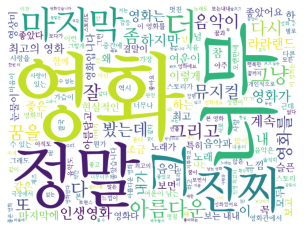

In [56]:
wd = WordCloud(
        font_path='C:/Windows/Fonts/KBIZ한마음명조 M.ttf',
        background_color='white',
        width=800,
        height=600
    ).generate(text)

plt.imshow(wd)
plt.axis('off')

## 추출한 명사로 워드클라우드 그리기

In [57]:
count

Counter({'우리': 330,
         '듯': 69,
         '마지막': 1926,
         '눈빛': 317,
         '교환': 65,
         '그냥': 583,
         '감탄': 83,
         '상미': 710,
         '음악': 3128,
         '조폭': 6,
         '건달': 2,
         '검사': 4,
         '신파': 24,
         '실험': 9,
         '한국': 64,
         '기성': 1,
         '영화': 13284,
         '반성': 14,
         '이제': 110,
         '겨우': 13,
         '편': 9,
         '신인': 9,
         '감독': 455,
         '정도': 337,
         '처음': 805,
         '이': 207,
         '거란': 3,
         '걸꿈': 1,
         '사랑': 1840,
         '항상': 62,
         '성공': 94,
         '실패': 29,
         '평가': 69,
         '라라': 787,
         '랜드': 800,
         '꿈': 414,
         '파도': 12,
         '얼마나': 71,
         '회상': 81,
         '달리': 15,
         '키스신': 11,
         '스토리': 1221,
         '시작': 242,
         '진짜': 870,
         '리지': 5,
         '내일': 37,
         '오늘': 115,
         '연인': 192,
         '관객': 92,
         '모든': 423,
         '위': 97,
         '인생':

In [60]:
# 불용어 처리

from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add('정말')
stopwords.add('다시')
stopwords.add('보고')
stopwords.add('부분')
stopwords.add('진짜')

(-0.5, 799.5, 599.5, -0.5)

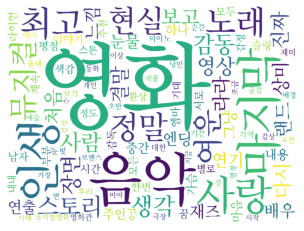

In [59]:
noun_list = count.most_common(100)

wd = WordCloud(
        font_path='C:/Windows/Fonts/KBIZ한마음명조 M.ttf',
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(dict(noun_list)) # 단어의 빈도수를 이용하여 워드클라우드 생성

# 워드클라우드 이미지로 저장
wd.to_file('라라랜드_워드클라우드.png')

plt.imshow(wd)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

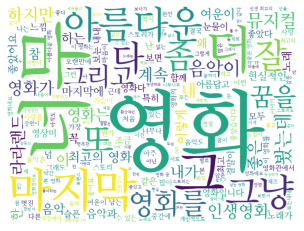

In [63]:
noun_list = count.most_common(100)

# 불용어 적용
wd = WordCloud(
        font_path='C:/Windows/Fonts/KBIZ한마음명조 M.ttf',
        background_color='white',
        width=800,
        height=600,
        stopwords=stopwords
    ).generate(text)

plt.imshow(wd)
plt.axis('off')

## 워드클라우드 마스크 이미지 적용

(-0.5, 499.5, 499.5, -0.5)

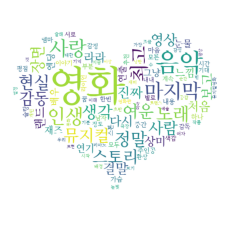

In [68]:
import numpy as np
from PIL import Image

heart_mask = np.array(Image.open('heart.jpg'))

noun_list = count.most_common(100)

wd = WordCloud(
        font_path='C:/Windows/Fonts/KBIZ한마음명조 M.ttf',
        background_color='white',
        width=800,
        height=600,
        mask=heart_mask
    ).generate_from_frequencies(dict(noun_list)) # 단어의 빈도수를 이용하여 워드클라우드 생성

plt.imshow(wd)
plt.axis('off')

# 워드클라우드 색 적용

In [69]:
# 팔레트 모듈 설치
!pip install palettable

In [70]:
from palettable.colorbrewer.qualitative import Dark2_8
import random

def color_func(**kwargs) :
    return tuple(Dark2_8.colors[random.randint(0,7)])

(-0.5, 499.5, 499.5, -0.5)

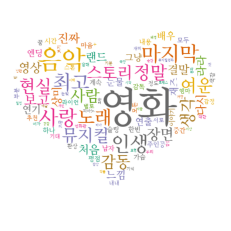

In [71]:
noun_list = count.most_common(100)

wd = WordCloud(
        font_path='C:/Windows/Fonts/KBIZ한마음명조 M.ttf',
        background_color='white',
        width=800,
        height=600,
        mask=heart_mask
    ).generate_from_frequencies(dict(noun_list)) # 단어의 빈도수를 이용하여 워드클라우드 생성

# 워드 클라우드 색깔 적용하기
wd.recolor(color_func = color_func)

plt.imshow(wd)
plt.axis('off')

In [74]:
color_list = [[236,64,122],[156,39,176],[239,83,80],[103,58,183],[224,64,251],[66,165,245],[41,182,246],[24,255,255]]
def color_func(**kwargs) :
    return tuple(color_list[random.randint(0,7)])

(-0.5, 499.5, 499.5, -0.5)

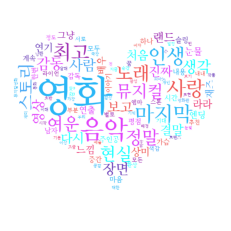

In [75]:
noun_list = count.most_common(100)

wd = WordCloud(
        font_path='C:/Windows/Fonts/KBIZ한마음명조 M.ttf',
        background_color='white',
        width=800,
        height=600,
        mask=heart_mask
    ).generate_from_frequencies(dict(noun_list)) # 단어의 빈도수를 이용하여 워드클라우드 생성

# 워드 클라우드 색깔 적용하기
wd.recolor(color_func = color_func)

plt.imshow(wd)
plt.axis('off')